In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/equity-post-HCT-survival-predictions/sample_submission.csv
/kaggle/input/equity-post-HCT-survival-predictions/data_dictionary.csv
/kaggle/input/equity-post-HCT-survival-predictions/train.csv
/kaggle/input/equity-post-HCT-survival-predictions/test.csv


In [2]:
### training data

In [3]:
train = pd.read_csv("/kaggle/input/equity-post-HCT-survival-predictions/train.csv")

In [4]:
train

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

ID                                          dri_score psych_disturb  \
0          0                     N/A - non-malignant indication            No   
1          1                                       Intermediate            No   
2          2                     N/A - non-malignant indication            No   
3          3                                               High            No   
4          4                                               High            No   
...      ...                                                ...           ...   
28795  28795  Intermediate - TED AML case <missing cytogenetics           NaN   
28796  28796                                               High            No   
28797  28797                                   TBD cytogenetics           NaN   
28798  28798                     N/A - non-malignant indication            No   
28799  28799                                    N/A - pediatric            No   

         cyto_score diabetes  hla_match_c_high  hla_high_res_8  \
0               NaN       No               NaN             NaN   
1      Intermediate       No               2.0             8.0   
2               NaN       No               2.0             8.0   
3      Intermediate       No               2.0             8.0   
4               NaN       No               2.0             8.0   
...             ...      ...               ...             ...   
28795     Favorable       No               2.0             8.0   
28796          Poor      Yes               1.0             4.0   
28797          Poor      NaN               2.0             8.0   
28798          Poor       No               1.0             4.0   
28799           NaN       No               2.0             8.0   

               tbi_status arrhythmia  hla_low_res_6  ...  \
0                  No TBI         No            6.0  ...   
1      TBI +- Other, >cGy         No            6.0  ...   
2                  No TBI         No            6.0  ...   
3                  No TBI         No            6.0  ...   
4                  No TBI         No            6.0  ...   
...                   ...        ...            ...  ...   
28795              No TBI         No            6.0  ...   
28796              No TBI         No            5.0  ...   
28797              No TBI        NaN            6.0  ...   
28798              No TBI         No            3.0  ...   
28799              No TBI         No            6.0  ...   

                       tce_div_match donor_related      melphalan_dose  \
0                                NaN     Unrelated  N/A, Mel not given   
1              Permissive mismatched       Related  N/A, Mel not given   
2              Permissive mismatched       Related  N/A, Mel not given   
3              Permissive mismatched     Unrelated  N/A, Mel not given   
4              Permissive mismatched       Related                 MEL   
...                              ...           ...                 ...   
28795  Bi-directional non-permissive           NaN  N/A, Mel not given   
28796             GvH non-permissive       Related  N/A, Mel not given   
28797             GvH non-permissive     Unrelated  N/A, Mel not given   
28798          Permissive mismatched       Related                 MEL   
28799          Permissive mismatched       Related                 MEL   

      hla_low_res_8 cardiac  hla_match_drb1_high pulm_moderate  \
0               8.0      No                  2.0            No   
1               8.0      No                  2.0           Yes   
2               8.0      No                  2.0            No   
3               8.0      No                  2.0            No   
4               8.0      No                  2.0            No   
...             ...     ...                  ...           ...   
28795           8.0     NaN                  2.0            No   
28796           6.0     Yes                  1.0           Yes   
28797           8.0     NaN             

In [5]:
test = pd.read_csv("/kaggle/input/equity-post-HCT-survival-predictions/test.csv")

In [6]:
test

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

ID                       dri_score psych_disturb    cyto_score diabetes  \
0  28800  N/A - non-malignant indication            No           NaN       No   
1  28801                    Intermediate            No  Intermediate       No   
2  28802  N/A - non-malignant indication            No           NaN       No   

   hla_match_c_high  hla_high_res_8          tbi_status arrhythmia  \
0               NaN             NaN              No TBI         No   
1               2.0             8.0  TBI +- Other, >cGy         No   
2               2.0             8.0              No TBI         No   

   hla_low_res_6  ... karnofsky_score hepatic_mild          tce_div_match  \
0            6.0  ...            90.0           No                    NaN   
1            6.0  ...            90.0           No  Permissive mismatched   
2            6.0  ...            90.0           No  Permissive mismatched   

  donor_related      melphalan_dose  hla_low_res_8 cardiac  \
0     Unrelated  N/A, Mel not given            8.0      No   
1       Related  N/A, Mel not given            8.0      No   
2       Related  N/A, Mel not given            8.0      No   

   hla_match_drb1_high  pulm_moderate hla_low_res_10  
0                  2.0             No           10.0  
1                  2.0            Yes           10.0  
2                  2.0             No           10.0  

[3 rows x 58 columns]

In [7]:
train.head(3)

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

ID                       dri_score psych_disturb    cyto_score diabetes  \
0   0  N/A - non-malignant indication            No           NaN       No   
1   1                    Intermediate            No  Intermediate       No   
2   2  N/A - non-malignant indication            No           NaN       No   

   hla_match_c_high  hla_high_res_8          tbi_status arrhythmia  \
0               NaN             NaN              No TBI         No   
1               2.0             8.0  TBI +- Other, >cGy         No   
2               2.0             8.0              No TBI         No   

   hla_low_res_6  ...          tce_div_match donor_related  \
0            6.0  ...                    NaN     Unrelated   
1            6.0  ...  Permissive mismatched       Related   
2            6.0  ...  Permissive mismatched       Related   

       melphalan_dose hla_low_res_8 cardiac  hla_match_drb1_high  \
0  N/A, Mel not given           8.0      No                  2.0   
1  N/A, Mel not given           8.0      No                  2.0   
2  N/A, Mel not given           8.0      No                  2.0   

  pulm_moderate  hla_low_res_10  efs efs_time  
0            No            10.0  0.0   42.356  
1           Yes            10.0  1.0    4.672  
2            No            10.0  0.0   19.793  

[3 rows x 60 columns]

In [8]:
data_dictionary = pd.read_csv('/kaggle/input/equity-post-HCT-survival-predictions/data_dictionary.csv')

In [9]:
data_dictionary

variable                                        description  \
0                dri_score                         Refined disease risk index   
1            psych_disturb                            Psychiatric disturbance   
2               cyto_score                                  Cytogenetic score   
3                 diabetes                                           Diabetes   
4         hla_match_c_high  Recipient / 1st donor allele level (high resol...   
5           hla_high_res_8  Recipient / 1st donor allele-level (high resol...   
6               tbi_status                                                TBI   
7               arrhythmia                                         Arrhythmia   
8            hla_low_res_6  Recipient / 1st donor antigen-level (low resol...   
9               graft_type                                         Graft type   
10               vent_hist                  History of mechanical ventilation   
11             renal_issue                           Renal, moderate / severe   
12             pulm_severe                                  Pulmonary, severe   
13        prim_disease_hct                            Primary disease for HCT   
14          hla_high_res_6  Recipient / 1st donor allele-level (high resol...   
15              cmv_status                     Donor/recipient CMV serostatus   
16         hla_high_res_10  Recipient / 1st donor allele-level (high resol...   
17     hla_match_dqb1_high  Recipient / 1st donor allele level (high resol...   
18           tce_imm_match      T-cell epitope immunogenicity/diversity match   
19              hla_nmdp_6  Recipient / 1st donor matching at HLA-A(lo),-B...   
20         hla_match_c_low  Recipient / 1st donor antigen level (low resol...   
21               rituximab                    Rituximab given in conditioning   
22      hla_match_drb1_low  Recipient / 1st donor antigen level (low resol...   
23      hla_match_dqb1_low  Recipient / 1st donor antigen level (low resol...   
24               prod_type                                       Product type   
25       cyto_score_detail                     Cytogenetics for DRI (AML/MDS)   
26  conditioning_intensity            Computed planned conditioning intensity   
27               ethnicity                                          Ethnicity   
28                year_hct                                        Year of HCT   
29                 obesity                                            Obesity   
30                 mrd_hct                       MRD at time of HCT (AML/ALL)   
31             in_vivo_tcd         In-vivo T-cell depletion (ATG/alemtuzumab)   
32               tce_match                            T-cell epitope matching   
33        hla_match_a_high  Recipient / 1st donor allele level (high resol...   
34          hepatic_severe                         Hepatic, moderate / severe   
35               donor_age                                          Donor age   
36             prior_tumor                                 Solid tumor, prior   
37         hla_match_b_low  Recipient / 1st donor antigen level (low resol...   
38            peptic_ulcer                                       Peptic ulcer   
39              age_at_hct                                         Age at HCT   
40         hla_match_a_low  Recipient / 1st donor antigen level (low resol...   
41              gvhd_proph                           Planned GVHD prophylaxis   
42             rheum_issue                                      Rheumatologic   
43               sex_match                          Donor/recipient sex match   
44        hla_match_b_high  Recipient / 1st donor allele level (high resol...   
45              race_group                                               Race   
46       comorbidity_score                           Sorror comorbidity score   
47         karnofsky_score                                         KPS at HCT   
48            hepatic_mild                       

In [10]:
sample_submission = pd.read_csv('/kaggle/input/equity-post-HCT-survival-predictions/sample_submission.csv')

In [11]:
sample_submission

ID  prediction
0  28800         0.5
1  28801         0.5
2  28802         0.5

## EDA

In [12]:
### train data -->

In [13]:
train.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

ID                       dri_score psych_disturb    cyto_score diabetes  \
0   0  N/A - non-malignant indication            No           NaN       No   
1   1                    Intermediate            No  Intermediate       No   
2   2  N/A - non-malignant indication            No           NaN       No   
3   3                            High            No  Intermediate       No   
4   4                            High            No           NaN       No   

   hla_match_c_high  hla_high_res_8          tbi_status arrhythmia  \
0               NaN             NaN              No TBI         No   
1               2.0             8.0  TBI +- Other, >cGy         No   
2               2.0             8.0              No TBI         No   
3               2.0             8.0              No TBI         No   
4               2.0             8.0              No TBI         No   

   hla_low_res_6  ...          tce_div_match donor_related  \
0            6.0  ...                    NaN     Unrelated   
1            6.0  ...  Permissive mismatched       Related   
2            6.0  ...  Permissive mismatched       Related   
3            6.0  ...  Permissive mismatched     Unrelated   
4            6.0  ...  Permissive mismatched       Related   

       melphalan_dose hla_low_res_8 cardiac  hla_match_drb1_high  \
0  N/A, Mel not given           8.0      No                  2.0   
1  N/A, Mel not given           8.0      No                  2.0   
2  N/A, Mel not given           8.0      No                  2.0   
3  N/A, Mel not given           8.0      No                  2.0   
4                 MEL           8.0      No                  2.0   

  pulm_moderate  hla_low_res_10  efs efs_time  
0            No            10.0  0.0   42.356  
1           Yes            10.0  1.0    4.672  
2            No            10.0  0.0   19.793  
3            No            10.0  0.0  102.349  
4            No            10.0  0.0   16.223  

[5 rows x 60 columns]

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28800 entries, 0 to 28799
Data columns (total 60 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      28800 non-null  int64  
 1   dri_score               28646 non-null  object 
 2   psych_disturb           26738 non-null  object 
 3   cyto_score              20732 non-null  object 
 4   diabetes                26681 non-null  object 
 5   hla_match_c_high        24180 non-null  float64
 6   hla_high_res_8          22971 non-null  float64
 7   tbi_status              28800 non-null  object 
 8   arrhythmia              26598 non-null  object 
 9   hla_low_res_6           25530 non-null  float64
 10  graft_type              28800 non-null  object 
 11  vent_hist               28541 non-null  object 
 12  renal_issue             26885 non-null  object 
 13  pulm_severe             26665 non-null  object 
 14  prim_disease_hct        28800 non-null

In [15]:
train.shape

(28800, 60)

In [16]:
## checking is there any null value
train.isnull().sum()

ID                            0
dri_score                   154
psych_disturb              2062
cyto_score                 8068
diabetes                   2119
hla_match_c_high           4620
hla_high_res_8             5829
tbi_status                    0
arrhythmia                 2202
hla_low_res_6              3270
graft_type                    0
vent_hist                   259
renal_issue                1915
pulm_severe                2135
prim_disease_hct              0
hla_high_res_6             5284
cmv_status                  634
hla_high_res_10            7163
hla_match_dqb1_high        5199
tce_imm_match             11133
hla_nmdp_6                 4197
hla_match_c_low            2800
rituximab                  2148
hla_match_drb1_low         2643
hla_match_dqb1_low         4194
prod_type                     0
cyto_score_detail         11923
conditioning_intensity     4789
ethnicity                   587
year_hct                      0
obesity                    1760
mrd_hct 

In [17]:
train.describe()

ID  hla_match_c_high  hla_high_res_8  hla_low_res_6  \
count  28800.000000      24180.000000    22971.000000   25530.000000   
mean   14399.500000          1.764516        6.876801       5.143322   
std     8313.988213          0.431941        1.564313       1.207757   
min        0.000000          0.000000        2.000000       2.000000   
25%     7199.750000          2.000000        6.000000       4.000000   
50%    14399.500000          2.000000        8.000000       6.000000   
75%    21599.250000          2.000000        8.000000       6.000000   
max    28799.000000          2.000000        8.000000       6.000000   

       hla_high_res_6  hla_high_res_10  hla_match_dqb1_high    hla_nmdp_6  \
count    23516.000000     21637.000000         23601.000000  24603.000000   
mean         5.109202         8.617230             1.736876      5.160346   
std          1.214162         1.905125             0.447687      1.203240   
min          0.000000         3.000000             0.000000      2.000000   
25%          4.000000         7.000000             1.000000      4.000000   
50%          6.000000        10.000000             2.000000      6.000000   
75%          6.000000        10.000000             2.000000      6.000000   
max          6.000000        10.000000             2.000000      6.000000   

       hla_match_c_low  hla_match_drb1_low  ...    age_at_hct  \
count     26000.000000        26157.000000  ...  28800.000000   
mean          1.757808            1.715296  ...     38.663162   
std           0.435453            0.451282  ...     21.147581   
min           0.000000            1.000000  ...      0.044000   
25%           2.000000            1.000000  ...     19.539000   
50%           2.000000            2.000000  ...     41.006000   
75%           2.000000            2.000000  ...     55.965250   
max           2.000000            2.000000  ...     73.726000   

       hla_match_a_low  hla_match_b_high  comorbidity_score  karnofsky_score  \
count     26410.000000       24712.00000       28323.000000      27930.00000   
mean          1.709087           1.69962           1.702327         83.83208   
std           0.458259           0.46518           1.994443         11.02884   
min           0.000000           0.00000           0.000000         40.00000   
25%           1.000000           1.00000           0.000000         70.00000   
50%           2.000000           2.00000           1.000000         90.00000   
75%           2.000000           2.00000           2.000000         90.00000   
max           2.000000           2.00000          10.000000        100.00000   

       hla_low_res_8  hla_match_drb1_high  hla_low_res_10           efs  \
count   25147.000000         25448.000000    23736.000000  28800.000000   
mean        6.903448             1.707128        8.664687      0.539306   
std         1.565017             0.461179        1.882746      0.498461   
min         2.000000             0.000000        4.000000      0.000000   
25%         6.000000             1.000000        7.000000      0.000000   
50%         8.000000             2.000000       10.000000      1.000000   
75%         8.000000             2.000000       10.000000      1.000000   
max         8.000000             2.000000       10.000000      1.000000   

           efs_time  
count  28800.000000  
mean      23.237678  
std       24.799748  
min        0.333000  
25%        5.619750  
50%        9.796500  
75%       35.100000  
max      156.819000  

[8 rows x 25 columns]

In [18]:
train.columns

Index(['ID', 'dri_score', 'psych_disturb', 'cyto_score', 'diabetes',
       'hla_match_c_high', 'hla_high_res_8', 'tbi_status', 'arrhythmia',
       'hla_low_res_6', 'graft_type', 'vent_hist', 'renal_issue',
       'pulm_severe', 'prim_disease_hct', 'hla_high_res_6', 'cmv_status',
       'hla_high_res_10', 'hla_match_dqb1_high', 'tce_imm_match', 'hla_nmdp_6',
       'hla_match_c_low', 'rituximab', 'hla_match_drb1_low',
       'hla_match_dqb1_low', 'prod_type', 'cyto_score_detail',
       'conditioning_intensity', 'ethnicity', 'year_hct', 'obesity', 'mrd_hct',
       'in_vivo_tcd', 'tce_match', 'hla_match_a_high', 'hepatic_severe',
       'donor_age', 'prior_tumor', 'hla_match_b_low', 'peptic_ulcer',
       'age_at_hct', 'hla_match_a_low', 'gvhd_proph', 'rheum_issue',
       'sex_match', 'hla_match_b_high', 'race_group', 'comorbidity_score',
       'karnofsky_score', 'hepatic_mild', 'tce_div_match', 'donor_related',
       'melphalan_dose', 'hla_low_res_8', 'cardiac', 'hla_match_drb1_hi

In [19]:
test.columns

Index(['ID', 'dri_score', 'psych_disturb', 'cyto_score', 'diabetes',
       'hla_match_c_high', 'hla_high_res_8', 'tbi_status', 'arrhythmia',
       'hla_low_res_6', 'graft_type', 'vent_hist', 'renal_issue',
       'pulm_severe', 'prim_disease_hct', 'hla_high_res_6', 'cmv_status',
       'hla_high_res_10', 'hla_match_dqb1_high', 'tce_imm_match', 'hla_nmdp_6',
       'hla_match_c_low', 'rituximab', 'hla_match_drb1_low',
       'hla_match_dqb1_low', 'prod_type', 'cyto_score_detail',
       'conditioning_intensity', 'ethnicity', 'year_hct', 'obesity', 'mrd_hct',
       'in_vivo_tcd', 'tce_match', 'hla_match_a_high', 'hepatic_severe',
       'donor_age', 'prior_tumor', 'hla_match_b_low', 'peptic_ulcer',
       'age_at_hct', 'hla_match_a_low', 'gvhd_proph', 'rheum_issue',
       'sex_match', 'hla_match_b_high', 'race_group', 'comorbidity_score',
       'karnofsky_score', 'hepatic_mild', 'tce_div_match', 'donor_related',
       'melphalan_dose', 'hla_low_res_8', 'cardiac', 'hla_match_drb1_hi

In [20]:
train.shape

(28800, 60)

In [21]:
###### 'efs_time' is our target feature

In [22]:
## columns in train

In [23]:
train.columns

Index(['ID', 'dri_score', 'psych_disturb', 'cyto_score', 'diabetes',
       'hla_match_c_high', 'hla_high_res_8', 'tbi_status', 'arrhythmia',
       'hla_low_res_6', 'graft_type', 'vent_hist', 'renal_issue',
       'pulm_severe', 'prim_disease_hct', 'hla_high_res_6', 'cmv_status',
       'hla_high_res_10', 'hla_match_dqb1_high', 'tce_imm_match', 'hla_nmdp_6',
       'hla_match_c_low', 'rituximab', 'hla_match_drb1_low',
       'hla_match_dqb1_low', 'prod_type', 'cyto_score_detail',
       'conditioning_intensity', 'ethnicity', 'year_hct', 'obesity', 'mrd_hct',
       'in_vivo_tcd', 'tce_match', 'hla_match_a_high', 'hepatic_severe',
       'donor_age', 'prior_tumor', 'hla_match_b_low', 'peptic_ulcer',
       'age_at_hct', 'hla_match_a_low', 'gvhd_proph', 'rheum_issue',
       'sex_match', 'hla_match_b_high', 'race_group', 'comorbidity_score',
       'karnofsky_score', 'hepatic_mild', 'tce_div_match', 'donor_related',
       'melphalan_dose', 'hla_low_res_8', 'cardiac', 'hla_match_drb1_hi

In [24]:
## ID

In [25]:
train['ID']

0            0
1            1
2            2
3            3
4            4
         ...  
28795    28795
28796    28796
28797    28797
28798    28798
28799    28799
Name: ID, Length: 28800, dtype: int64

In [26]:
## here ID is unique for every row and every data and this is not important in prediction
train.drop('ID',axis=1,inplace=True)

In [27]:
## list of column we are dropping
col_to_drop = []
col_to_drop.append('ID')

In [28]:
col_to_drop

['ID']

In [29]:
cat_col_list = [feature for feature in train.columns if train[feature].dtype=='O']
num_col_list = [feature for feature in train.columns if train[feature].dtype!='O']

In [30]:
num_col_list

['hla_match_c_high',
 'hla_high_res_8',
 'hla_low_res_6',
 'hla_high_res_6',
 'hla_high_res_10',
 'hla_match_dqb1_high',
 'hla_nmdp_6',
 'hla_match_c_low',
 'hla_match_drb1_low',
 'hla_match_dqb1_low',
 'year_hct',
 'hla_match_a_high',
 'donor_age',
 'hla_match_b_low',
 'age_at_hct',
 'hla_match_a_low',
 'hla_match_b_high',
 'comorbidity_score',
 'karnofsky_score',
 'hla_low_res_8',
 'hla_match_drb1_high',
 'hla_low_res_10',
 'efs',
 'efs_time']

In [31]:
cat_col_list

['dri_score',
 'psych_disturb',
 'cyto_score',
 'diabetes',
 'tbi_status',
 'arrhythmia',
 'graft_type',
 'vent_hist',
 'renal_issue',
 'pulm_severe',
 'prim_disease_hct',
 'cmv_status',
 'tce_imm_match',
 'rituximab',
 'prod_type',
 'cyto_score_detail',
 'conditioning_intensity',
 'ethnicity',
 'obesity',
 'mrd_hct',
 'in_vivo_tcd',
 'tce_match',
 'hepatic_severe',
 'prior_tumor',
 'peptic_ulcer',
 'gvhd_proph',
 'rheum_issue',
 'sex_match',
 'race_group',
 'hepatic_mild',
 'tce_div_match',
 'donor_related',
 'melphalan_dose',
 'cardiac',
 'pulm_moderate']

In [32]:
train[num_col_list]

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

hla_match_c_high  hla_high_res_8  hla_low_res_6  hla_high_res_6  \
0                   NaN             NaN            6.0             6.0   
1                   2.0             8.0            6.0             6.0   
2                   2.0             8.0            6.0             6.0   
3                   2.0             8.0            6.0             6.0   
4                   2.0             8.0            6.0             6.0   
...                 ...             ...            ...             ...   
28795               2.0             8.0            6.0             6.0   
28796               1.0             4.0            5.0             3.0   
28797               2.0             8.0            6.0             6.0   
28798               1.0             4.0            3.0             3.0   
28799               2.0             8.0            6.0             6.0   

       hla_high_res_10  hla_match_dqb1_high  hla_nmdp_6  hla_match_c_low  \
0                  NaN                  2.0         6.0              2.0   
1                 10.0                  2.0         6.0              2.0   
2                 10.0                  2.0         6.0              2.0   
3                 10.0                  2.0         6.0              2.0   
4                 10.0                  2.0         5.0              2.0   
...                ...                  ...         ...              ...   
28795             10.0                  2.0         6.0              2.0   
28796              6.0                  2.0         4.0              1.0   
28797             10.0                  2.0         6.0              2.0   
28798              5.0                  1.0         3.0              1.0   
28799             10.0                  2.0         6.0              2.0   

       hla_match_drb1_low  hla_match_dqb1_low  ...  age_at_hct  \
0                     2.0                 2.0  ...       9.942   
1                     2.0                 2.0  ...      43.705   
2                     2.0                 2.0  ...      33.997   
3                     2.0                 2.0  ...      43.245   
4                     2.0                 2.0  ...      29.740   
...                   ...                 ...  ...         ...   
28795                 2.0                 2.0  ...      51.136   
28796                 2.0                 2.0  ...      18.075   
28797                 2.0                 2.0  ...      51.005   
28798                 1.0                 1.0  ...       0.044   
28799                 2.0                 2.0  ...       1.035   

       hla_match_a_low  hla_match_b_high  comorbidity_score  karnofsky_score  \
0                  2.0               2.0                0.0             90.0   
1                  2.0               2.0                3.0             90.0   
2                  2.0               2.0                0.0             90.0   
3                  2.0               2.0                0.0             90.0   
4                  2.0               2.0                1.0             90.0   
...                ...               ...                ...              ...   
28795              2.0               2.0                0.0              NaN   
28796              2.0               1.0                3.0             90.0   
28797              2.0               2.0                5.0             90.0   
28798              1.0               1.0                1.0             90.0   
28799              2.0               2.0                2.0             90.0   

       hla_low_res_8  hla_match_drb1_high  hla_low_res_10  efs  efs_time  
0                8.0                  2.0            10.0  0.0    42.356  
1                8.0                  2.0            10.0  1.0     4.672  
2                8.0                  2.0            10.0  0.0    19.793  
3                8.0                  2.0            10.0  0.0   102.349  
4                8.0                  2.0            10.0  0.0    16.223  
.

In [33]:
## correlation

train[num_col_list].corr()

hla_match_c_high  hla_high_res_8  hla_low_res_6  \
hla_match_c_high             1.000000        0.858282       0.754627   
hla_high_res_8               0.858282        1.000000       0.909537   
hla_low_res_6                0.754627        0.909537       1.000000   
hla_high_res_6               0.750739        0.983351       0.899229   
hla_high_res_10              0.853098        0.986125       0.912479   
hla_match_dqb1_high          0.613023        0.699397       0.684575   
hla_nmdp_6                   0.747162        0.883250       0.882176   
hla_match_c_low              0.742873        0.800855       0.763247   
hla_match_drb1_low           0.687148        0.813857       0.893837   
hla_match_dqb1_low           0.593530        0.665181       0.639613   
year_hct                    -0.150124       -0.165231      -0.162176   
hla_match_a_high             0.567845        0.822836       0.759426   
donor_age                   -0.080608       -0.058954      -0.046267   
hla_match_b_low              0.728296        0.842374       0.897411   
age_at_hct                  -0.021295        0.011972       0.025693   
hla_match_a_low              0.588746        0.773468       0.867108   
hla_match_b_high             0.702993        0.883800       0.772630   
comorbidity_score           -0.034718       -0.014173      -0.008468   
karnofsky_score             -0.022375       -0.038712      -0.046744   
hla_low_res_8                0.789160        0.922293       0.983812   
hla_match_drb1_high          0.681908        0.879812       0.806428   
hla_low_res_10               0.798376        0.922255       0.968904   
efs                          0.031850        0.044224       0.047007   
efs_time                     0.033179        0.038312       0.031964   

                     hla_high_res_6  hla_high_res_10  hla_match_dqb1_high  \
hla_match_c_high           0.750739         0.853098             0.613023   
hla_high_res_8             0.983351         0.986125             0.699397   
hla_low_res_6              0.899229         0.912479             0.684575   
hla_high_res_6             1.000000         0.968703             0.679518   
hla_high_res_10            0.968703         1.000000             0.808341   
hla_match_dqb1_high        0.679518         0.808341             1.000000   
hla_nmdp_6                 0.870521         0.886625             0.669252   
hla_match_c_low            0.759922         0.811577             0.608257   
hla_match_drb1_low         0.798041         0.829971             0.656886   
hla_match_dqb1_low         0.639689         0.695175             0.590400   
year_hct                  -0.157125        -0.159467            -0.105586   
hla_match_a_high           0.854499         0.804656             0.529021   
donor_age                 -0.045224        -0.065806            -0.050081   
hla_match_b_low            0.819254         0.846500             0.627079   
age_at_hct                 0.022085         0.018006             0.023520   
hla_match_a_low            0.782468         0.767826             0.538623   
hla_match_b_high           0.884266         0.872777             0.599843   
comorbidity_score         -0.006176        -0.018356            -0.034074   
karnofsky_score           -0.042139        -0.045402            -0.038852   
hla_low_res_8              0.903878         0.926091             0.697815   
hla_match_drb1_high        0.886769         0.879950             0.640079   
hla_low_res_10             0.902408         0.929522             0.719347   
efs                        0.045261         0.048431             0.039736   
efs_time                   0.035943         0.034113             0.018179   

                     hla_nmdp_6  hla_match_c_low  hla_match_drb1_low  \
hla_match_c_high       0.747162         0.742873            0.687148   
hla_high_res_8         0.883250         0.800855            0.813857   
hla_low_res_6          0.882176         0.763247            0.893837   
hla_hi

In [34]:
## importing required libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

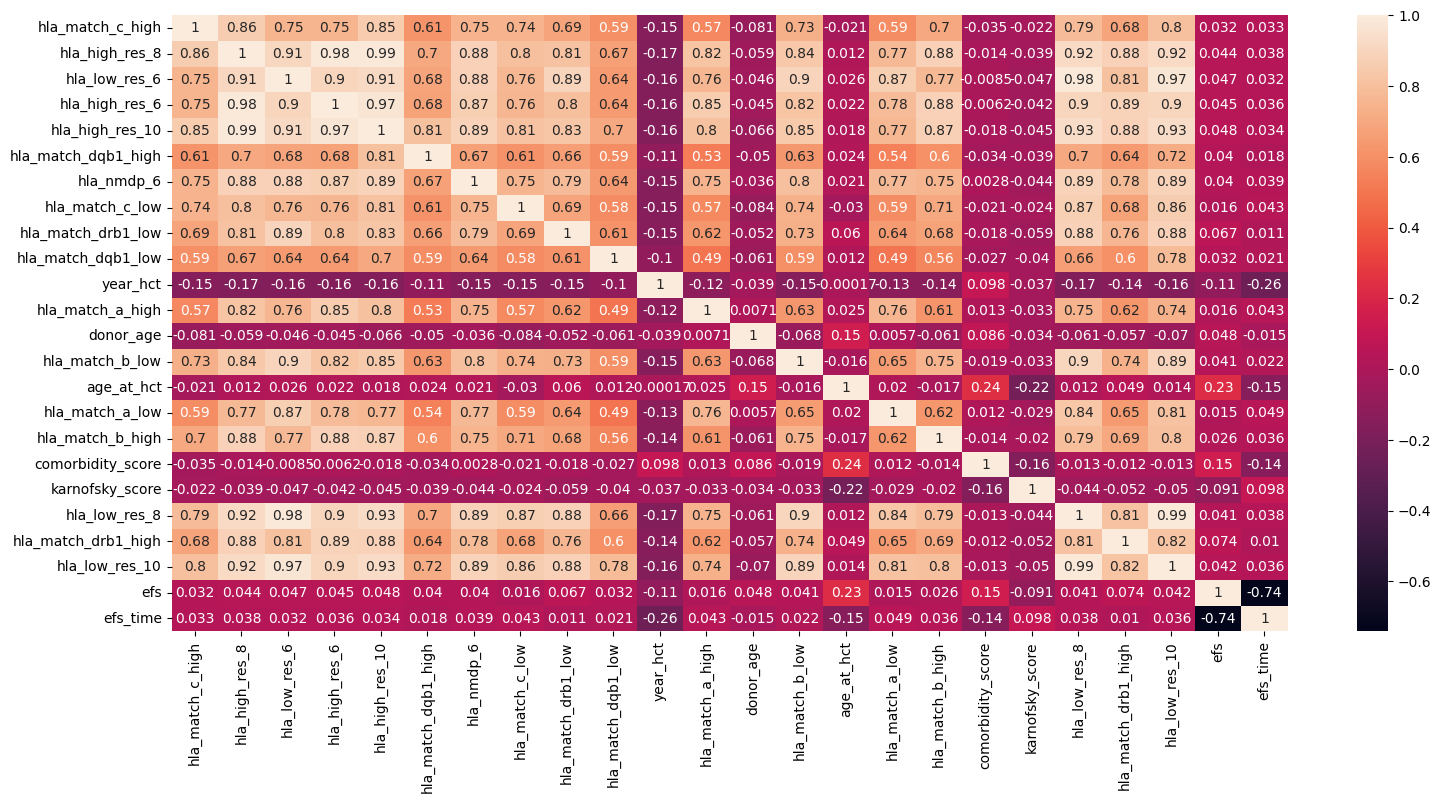

In [35]:
plt.figure(figsize=(18,8))
sns.heatmap(train[num_col_list].corr(),annot=True)
plt.show()

In [36]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i, j] > threshold: # we are interested only in correlation positively high becuase -ve correlation is important
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [37]:
correlation(train[num_col_list], 0.7) ## taking threshold as 0.7

{'hla_high_res_10',
 'hla_high_res_6',
 'hla_high_res_8',
 'hla_low_res_10',
 'hla_low_res_6',
 'hla_low_res_8',
 'hla_match_a_high',
 'hla_match_a_low',
 'hla_match_b_high',
 'hla_match_b_low',
 'hla_match_c_low',
 'hla_match_dqb1_high',
 'hla_match_drb1_high',
 'hla_match_drb1_low',
 'hla_nmdp_6'}

In [38]:
corr_features_list = correlation(train[num_col_list], 0.7)

In [39]:
corr_features_list

{'hla_high_res_10',
 'hla_high_res_6',
 'hla_high_res_8',
 'hla_low_res_10',
 'hla_low_res_6',
 'hla_low_res_8',
 'hla_match_a_high',
 'hla_match_a_low',
 'hla_match_b_high',
 'hla_match_b_low',
 'hla_match_c_low',
 'hla_match_dqb1_high',
 'hla_match_drb1_high',
 'hla_match_drb1_low',
 'hla_nmdp_6'}

In [40]:
type(corr_features_list)

set

In [41]:
len(corr_features_list)

15

In [42]:
## so these are highly correlated features

In [43]:
## dropping these highly correlated features
train.drop(corr_features_list,axis=1,inplace=True)

In [44]:
col_to_drop = col_to_drop + list(corr_features_list)

In [45]:
col_to_drop

['ID',
 'hla_match_dqb1_high',
 'hla_match_b_high',
 'hla_match_a_low',
 'hla_nmdp_6',
 'hla_high_res_6',
 'hla_match_a_high',
 'hla_low_res_8',
 'hla_match_c_low',
 'hla_match_drb1_high',
 'hla_low_res_6',
 'hla_low_res_10',
 'hla_match_b_low',
 'hla_high_res_8',
 'hla_match_drb1_low',
 'hla_high_res_10']

In [46]:
train.shape

(28800, 44)

In [47]:
## unique values in every categorical colum
for col in cat_col_list:
    print("Unique values in {}  ====>".format(col))
    print("There are total {} unique values in {}".format(train[col].nunique(), col))
    print(train[col].unique())
    print()

Unique values in dri_score  ====>
There are total 11 unique values in dri_score
['N/A - non-malignant indication' 'Intermediate' 'High' 'Low'
 'N/A - disease not classifiable' 'N/A - pediatric' 'TBD cytogenetics'
 'Intermediate - TED AML case <missing cytogenetics' nan
 'High - TED AML case <missing cytogenetics' 'Very high'
 'Missing disease status']

Unique values in psych_disturb  ====>
There are total 3 unique values in psych_disturb
['No' 'Not done' 'Yes' nan]

Unique values in cyto_score  ====>
There are total 7 unique values in cyto_score
[nan 'Intermediate' 'Poor' 'Other' 'Favorable' 'TBD' 'Normal' 'Not tested']

Unique values in diabetes  ====>
There are total 3 unique values in diabetes
['No' 'Yes' 'Not done' nan]

Unique values in tbi_status  ====>
There are total 8 unique values in tbi_status
['No TBI' 'TBI +- Other, >cGy' 'TBI + Cy +- Other' 'TBI +- Other, <=cGy'
 'TBI +- Other, unknown dose' 'TBI +- Other, -cGy, fractionated'
 'TBI +- Other, -cGy, single' 'TBI +- Other, -

In [48]:
train.columns

Index(['dri_score', 'psych_disturb', 'cyto_score', 'diabetes',
       'hla_match_c_high', 'tbi_status', 'arrhythmia', 'graft_type',
       'vent_hist', 'renal_issue', 'pulm_severe', 'prim_disease_hct',
       'cmv_status', 'tce_imm_match', 'rituximab', 'hla_match_dqb1_low',
       'prod_type', 'cyto_score_detail', 'conditioning_intensity', 'ethnicity',
       'year_hct', 'obesity', 'mrd_hct', 'in_vivo_tcd', 'tce_match',
       'hepatic_severe', 'donor_age', 'prior_tumor', 'peptic_ulcer',
       'age_at_hct', 'gvhd_proph', 'rheum_issue', 'sex_match', 'race_group',
       'comorbidity_score', 'karnofsky_score', 'hepatic_mild', 'tce_div_match',
       'donor_related', 'melphalan_dose', 'cardiac', 'pulm_moderate', 'efs',
       'efs_time'],
      dtype='object')

In [49]:
## function to plot some graphs and print the dtype of feature
def show_details_and_graphs(df_col):
    col_dtype=train[df_col].dtype
    print("Data type:",col_dtype)
    print("Total null values:",train[df_col].isnull().sum())

    print()
    if(col_dtype=='O'):
        plt.figure(figsize=(15,6))

        plt.subplot(1,2,1)
        plt.title("Bar Plot for '{}'".format(df_col))
        plt.ylabel("Count")
        train['{}'.format(df_col)].value_counts().plot(kind='bar')

        plt.subplot(1,2,2)
        plt.title("Pie Chart for '{}'".format(df_col))
        train['{}'.format(df_col)].value_counts().plot(kind='pie', autopct='%.2f%%')
        plt.show()


    elif(col_dtype!='O'):
        plt.figure(figsize=(18,15))

        plt.subplot(2,2,1)
        plt.title("Histogram for '{}'".format(df_col))
        train['{}'.format(df_col)].plot(kind='hist')

        plt.subplot(2,2,2)
        plt.title("KDE plot for '{}'".format(df_col))
        train['{}'.format(df_col)].plot(kind='kde')

        plt.subplot(2,2,3)
        plt.title("Box Plot for '{}'".format(df_col))
        train['{}'.format(df_col)].plot(kind='box')

        plt.subplot(2,2,4)
        plt.title("Distplot for '{}'".format(df_col))
        sns.distplot(train['{}'.format(df_col)])

        plt.show()


    else:
        print("Datatype of feature is neither numeric not categorical...")

In [50]:
## function to find and print all the rows where outlier is present
def check_outlier(df_col):
    if train[df_col].dtype!='O':
        print("Feature Name : {}".format(df_col))
        df_col_mean = train[df_col].mean()
        df_col_std = train[df_col].std()

        df_col_lower_limit = df_col_mean - 3*df_col_std 
        df_col_upper_limit = df_col_mean + 3*df_col_std 

        print("Based on Z-Score test :")
        print()
        return train[(train[df_col]<df_col_lower_limit) | (train[df_col]>df_col_upper_limit)]
    else:
        print("This is a categorical Feature...")
    

In [51]:
train.head(4)

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

dri_score psych_disturb    cyto_score diabetes  \
0  N/A - non-malignant indication            No           NaN       No   
1                    Intermediate            No  Intermediate       No   
2  N/A - non-malignant indication            No           NaN       No   
3                            High            No  Intermediate       No   

   hla_match_c_high          tbi_status arrhythmia        graft_type  \
0               NaN              No TBI         No       Bone marrow   
1               2.0  TBI +- Other, >cGy         No  Peripheral blood   
2               2.0              No TBI         No       Bone marrow   
3               2.0              No TBI         No       Bone marrow   

  vent_hist renal_issue  ... comorbidity_score karnofsky_score hepatic_mild  \
0        No          No  ...               0.0            90.0           No   
1        No          No  ...               3.0            90.0           No   
2        No          No  ...               0.0            90.0           No   
3        No          No  ...               0.0            90.0          Yes   

           tce_div_match donor_related      melphalan_dose cardiac  \
0                    NaN     Unrelated  N/A, Mel not given      No   
1  Permissive mismatched       Related  N/A, Mel not given      No   
2  Permissive mismatched       Related  N/A, Mel not given      No   
3  Permissive mismatched     Unrelated  N/A, Mel not given      No   

  pulm_moderate  efs efs_time  
0            No  0.0   42.356  
1           Yes  1.0    4.672  
2            No  0.0   19.793  
3            No  0.0  102.349  

[4 rows x 44 columns]

In [52]:
cat_ohe_cols = [] ## list of categorical columns which require ohe
cat_label_cols = [] ## list of categorical columns which require label encoding
cat_ordinal_cols = [] ## list of categorical columns which require ordinal encoding
num_cols = [] ## list of numerical columns

In [53]:
### dri_score

Data type: object
Total null values: 154



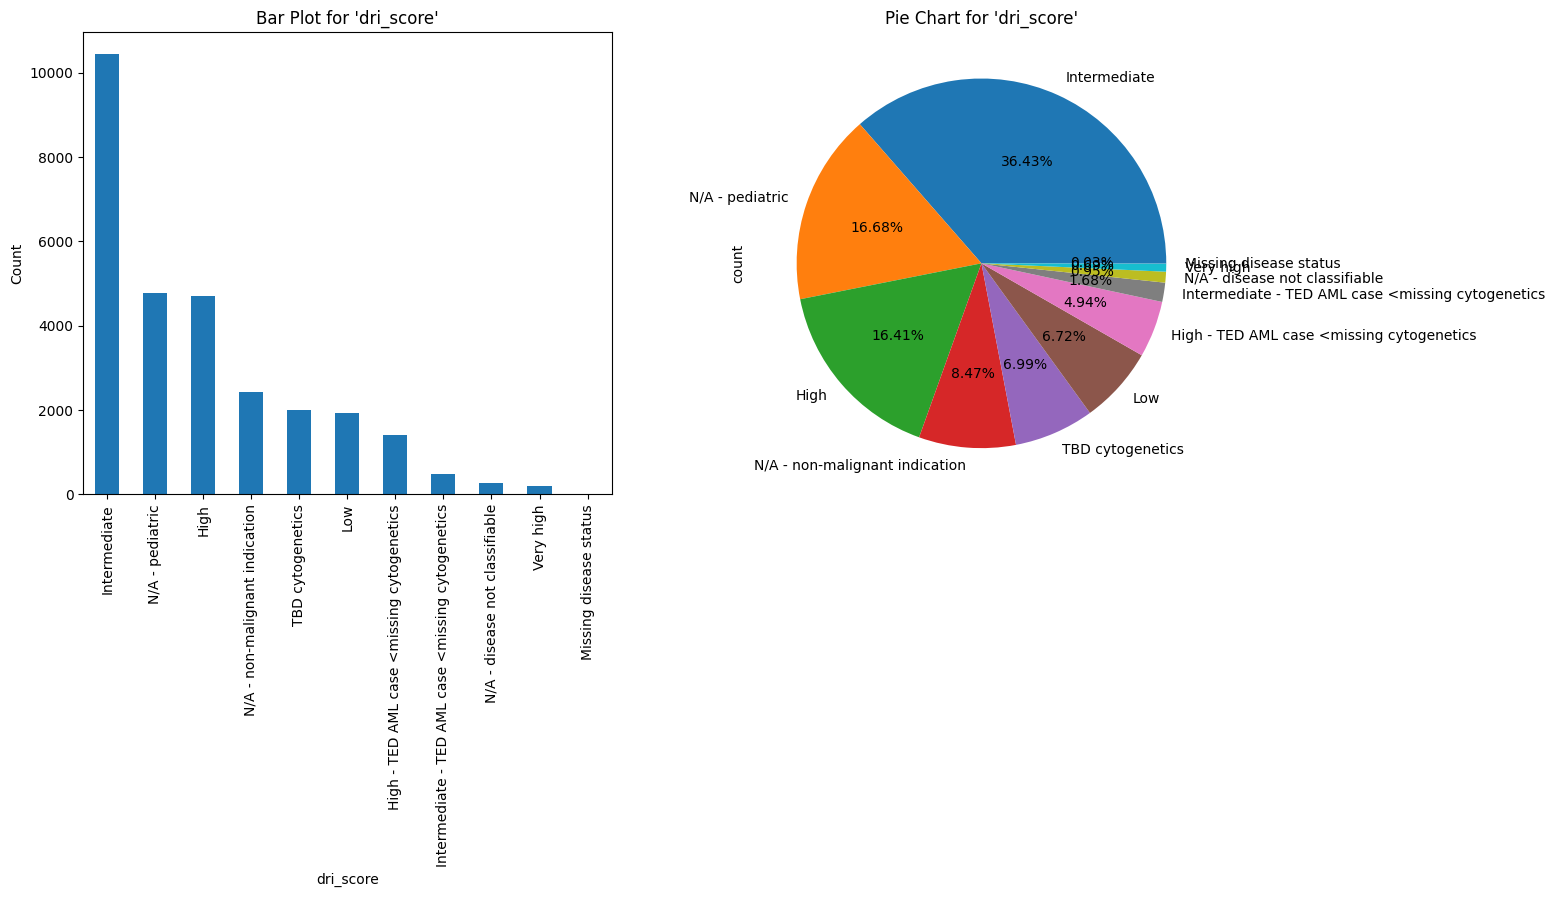

In [54]:
show_details_and_graphs('dri_score')

In [55]:
# plt.figure(figsize=(15,6))

# plt.subplot(1,2,1)
# plt.title("Bar Plot for 'dri_score'")
# plt.ylabel("Count")
# train['dri_score'].value_counts().plot(kind='bar')

# plt.subplot(1,2,2)
# plt.title("Pie Chart for 'dri_score'")
# train['dri_score'].value_counts().plot(kind='pie', autopct='%.2f%%')

# plt.show()

**Observation**
- Here the most occuring value for 'dri_score' is 'Intermediate'

In [56]:
train['dri_score'].value_counts().sort_values(ascending=False)[:5]

## Top 5 occuring dri_score with highest frequency

dri_score
Intermediate                      10436
N/A - pediatric                    4779
High                               4701
N/A - non-malignant indication     2427
TBD cytogenetics                   2003
Name: count, dtype: int64

In [57]:
dri_group = train.groupby('dri_score')

In [58]:
len(dri_group)

11

In [59]:
dri_group.size()

dri_score
High                                                  4701
High - TED AML case <missing cytogenetics             1414
Intermediate                                         10436
Intermediate - TED AML case <missing cytogenetics      481
Low                                                   1926
Missing disease status                                   9
N/A - disease not classifiable                         272
N/A - non-malignant indication                        2427
N/A - pediatric                                       4779
TBD cytogenetics                                      2003
Very high                                              198
dtype: int64

In [60]:
dri_group.size().sort_values(ascending=False)

dri_score
Intermediate                                         10436
N/A - pediatric                                       4779
High                                                  4701
N/A - non-malignant indication                        2427
TBD cytogenetics                                      2003
Low                                                   1926
High - TED AML case <missing cytogenetics             1414
Intermediate - TED AML case <missing cytogenetics      481
N/A - disease not classifiable                         272
Very high                                              198
Missing disease status                                   9
dtype: int64

In [61]:
dri_group.first()

psych_disturb    cyto_score  \
dri_score                                                                       
High                                                         No  Intermediate   
High - TED AML case <missing cytogenetics                    No     Favorable   
Intermediate                                                 No  Intermediate   
Intermediate - TED AML case <missing cytogenetics            No           TBD   
Low                                                          No          Poor   
Missing disease status                                      Yes     Favorable   
N/A - disease not classifiable                         Not done        Normal   
N/A - non-malignant indication                               No          Poor   
N/A - pediatric                                              No          Poor   
TBD cytogenetics                                             No          Poor   
Very high                                                   Yes          Poor   

                                                  diabetes  hla_match_c_high  \
dri_score                                                                      
High                                                    No               2.0   
High - TED AML case <missing cytogenetics               No               1.0   
Intermediate                                            No               2.0   
Intermediate - TED AML case <missing cytogenetics       No               1.0   
Low                                                     No               2.0   
Missing disease status                                 Yes               2.0   
N/A - disease not classifiable                         Yes               2.0   
N/A - non-malignant indication                          No               2.0   
N/A - pediatric                                         No               2.0   
TBD cytogenetics                                        No               1.0   
Very high                                               No               1.0   

                                                           tbi_status  \
dri_score                                                               
High                                                           No TBI   
High - TED AML case <missing cytogenetics           TBI + Cy +- Other   
Intermediate                                       TBI +- Other, >cGy   
Intermediate - TED AML case <missing cytogenetics              No TBI   
Low                                                            No TBI   
Missing disease status                              TBI + Cy +- Other   
N/A - disease not classifiable                     TBI +- Other, >cGy   
N/A - non-malignant indication                                 No TBI   
N/A - pediatric                                                No TBI   
TBD cytogenetics                                    TBI + Cy +- Other   
Very high                                                      No TBI   

                                                  arrhythmia  \
dri_score                                                      
High                                                      No   
High - TED AML case <missing cytogenetics                 No   
Intermediate                                              No   
Intermediate - TED AML case <missing cytogenetics         No   
Low                                                       No   
Missing disease status                                    No   
N/A - disease not classifiable                            No   
N/A - non-malignant indication                            No   
N/A - pediatric                                           No   
TBD cytogenetics                                          No   
Very high                                                 No   

                                                         graft_type vent_hist  \
dri_score                                                                       
High      

In [62]:
dri_group[['efs_time']].mean().sort_values('efs_time',ascending=False) 

## Average time duration patient remains free of disease progression or recurrence after treatment based on 'dri_score' value

efs_time
dri_score                                                   
N/A - disease not classifiable                     28.268945
N/A - non-malignant indication                     27.304484
N/A - pediatric                                    26.806018
TBD cytogenetics                                   26.433116
Low                                                24.333374
Intermediate - TED AML case <missing cytogenetics  24.303353
Very high                                          23.410646
High - TED AML case <missing cytogenetics          22.659573
Intermediate                                       22.339081
High                                               17.339421
Missing disease status                             16.639444

In [63]:
dri_group[['efs_time']].mean().sort_values('efs_time',ascending=False).index

Index(['N/A - disease not classifiable', 'N/A - non-malignant indication',
       'N/A - pediatric', 'TBD cytogenetics', 'Low',
       'Intermediate - TED AML case <missing cytogenetics', 'Very high',
       'High - TED AML case <missing cytogenetics', 'Intermediate', 'High',
       'Missing disease status'],
      dtype='object', name='dri_score')

**Observation**
- On this feature *Ordinal Encoding* can be applied because there is a ranking

In [64]:
# # Define the ordered categories
# categories = [[
#     'N/A - disease not classifiable', 
#     'N/A - non-malignant indication', 
#     'N/A - pediatric', 
#     'Missing disease status',
#     'TBD cytogenetics', 
#     'Low', 
#     'Intermediate - TED AML case <missing cytogenetics',
#     'Intermediate', 
#     'High - TED AML case <missing cytogenetics', 
#     'High', 
#     'Very high'
# ]]

In [65]:
cat_ordinal_cols.append('dri_score')

In [66]:
cat_ordinal_cols

['dri_score']

In [67]:
pd.crosstab(train.dri_score,train.efs_time.mean())

col_0                                              23.237678
dri_score                                                   
High                                                    4701
High - TED AML case <missing cytogenetics               1414
Intermediate                                           10436
Intermediate - TED AML case <missing cytogenetics        481
Low                                                     1926
Missing disease status                                     9
N/A - disease not classifiable                           272
N/A - non-malignant indication                          2427
N/A - pediatric                                         4779
TBD cytogenetics                                        2003
Very high                                                198

In [68]:
##### psych_disturb

Data type: object
Total null values: 2062



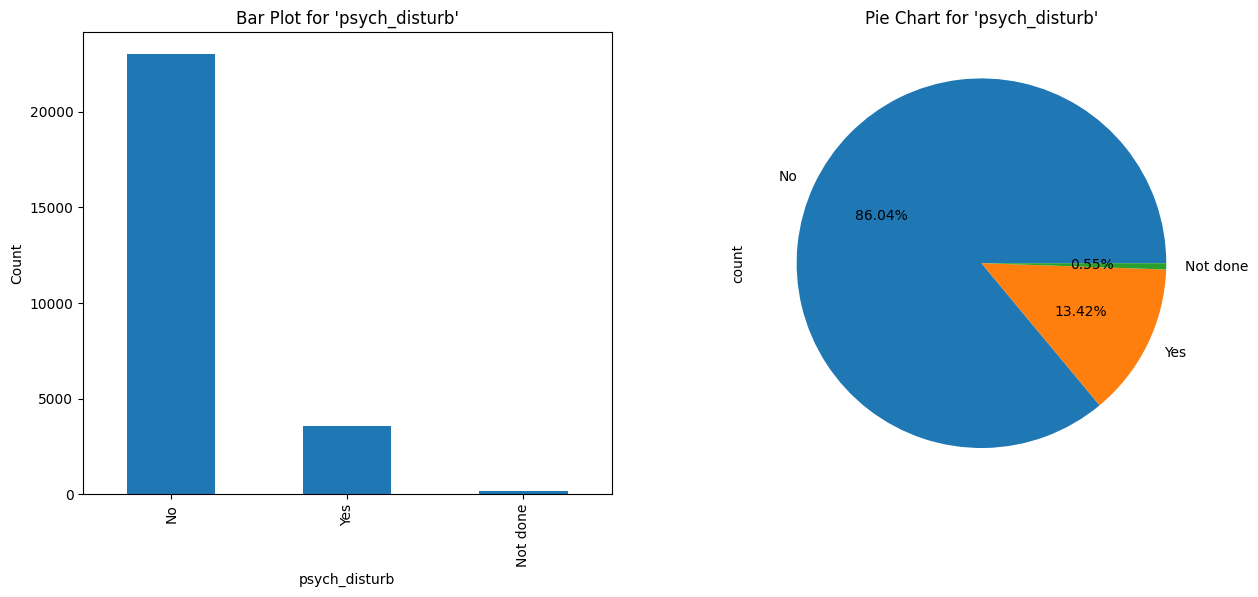

In [69]:
show_details_and_graphs('psych_disturb')

In [70]:
train.groupby('psych_disturb')[['efs_time']].mean().sort_values('efs_time',ascending=False) 

efs_time
psych_disturb           
No             24.212160
Not done       21.871911
Yes            20.150543

**Observation**
- Here also Ordinal Encoding can be applied due to the presence of ranking

In [71]:
cat_ordinal_cols.append('psych_disturb')

In [72]:
# # Define the ordered categories based on efs_time
# categories = [['No', 'Not done', 'Yes']]  

In [73]:
train['psych_disturb'].isnull().sum()

2062

In [74]:
## There are 2062 null values in 'psych_disturb' feature

**Observation**
- 86% of total is Not psych_disturb and 13% are psuch_disturb and 0.55% are not done 

In [75]:
#### cyto_score

Data type: object
Total null values: 8068



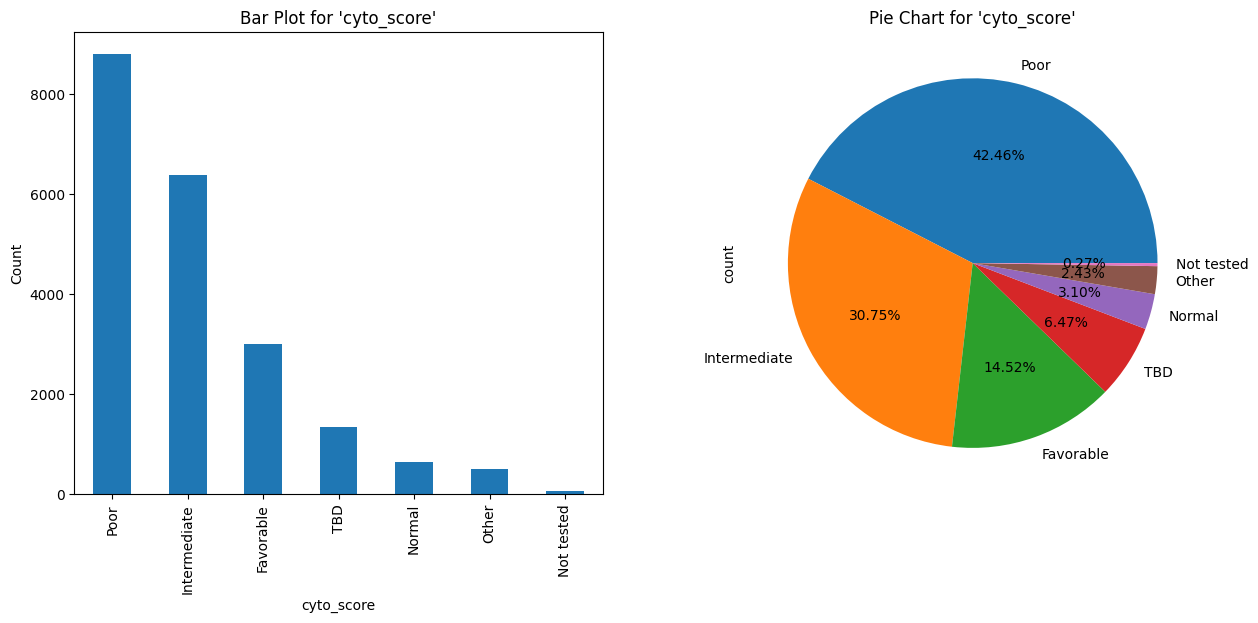

In [76]:
show_details_and_graphs('cyto_score')

In [77]:
train['cyto_score'].unique()

array([nan, 'Intermediate', 'Poor', 'Other', 'Favorable', 'TBD', 'Normal',
       'Not tested'], dtype=object)

**Observation**
- Most of the values are "Poor" and very less are "Not Tested"
- There is also the presenc of ranking so encoding will be ordinal

In [78]:
# # Define the order of categories
# categories = [['Not tested', 'TBD', 'Other', 'Normal', 'Favorable', 'Intermediate', 'Poor']]

In [79]:
cat_ordinal_cols.append('cyto_score')

In [80]:
train.columns

Index(['dri_score', 'psych_disturb', 'cyto_score', 'diabetes',
       'hla_match_c_high', 'tbi_status', 'arrhythmia', 'graft_type',
       'vent_hist', 'renal_issue', 'pulm_severe', 'prim_disease_hct',
       'cmv_status', 'tce_imm_match', 'rituximab', 'hla_match_dqb1_low',
       'prod_type', 'cyto_score_detail', 'conditioning_intensity', 'ethnicity',
       'year_hct', 'obesity', 'mrd_hct', 'in_vivo_tcd', 'tce_match',
       'hepatic_severe', 'donor_age', 'prior_tumor', 'peptic_ulcer',
       'age_at_hct', 'gvhd_proph', 'rheum_issue', 'sex_match', 'race_group',
       'comorbidity_score', 'karnofsky_score', 'hepatic_mild', 'tce_div_match',
       'donor_related', 'melphalan_dose', 'cardiac', 'pulm_moderate', 'efs',
       'efs_time'],
      dtype='object')

In [81]:
#### diabetes

Data type: object
Total null values: 2119



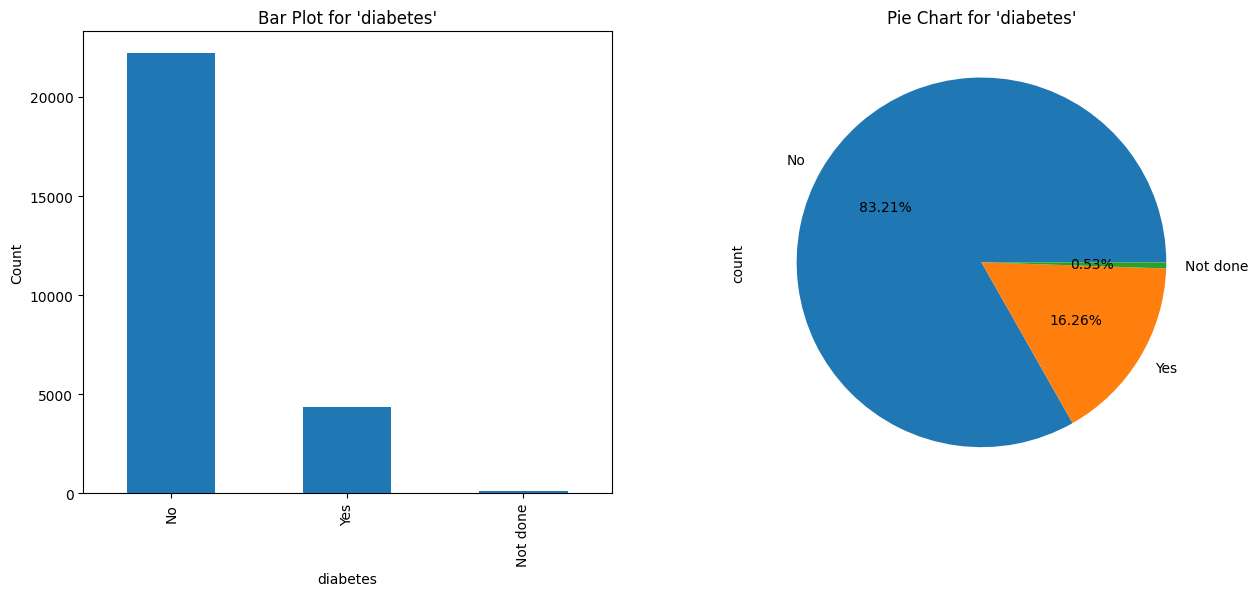

In [82]:
show_details_and_graphs('diabetes')

In [83]:
train.groupby('diabetes')[['efs_time']].mean().sort_values('efs_time',ascending=False) 
## Average efs_time is highest is Not done and lowest if Yes

efs_time
diabetes           
Not done  29.057184
No        24.371947
Yes       19.506372

In [84]:
# # Define the ordered categories based on decreasing efs_time
# categories = [['Not done', 'No', 'Yes']]

In [85]:
cat_ordinal_cols.append('diabetes')

**Observation**
- 83% has Diabetes and 16% are not having Diabetes.

In [86]:
### hla_match_c_high

Data type: float64
Total null values: 4620



<ipython-input-49-2b9663e6bea9>:39: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['{}'.format(df_col)])
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


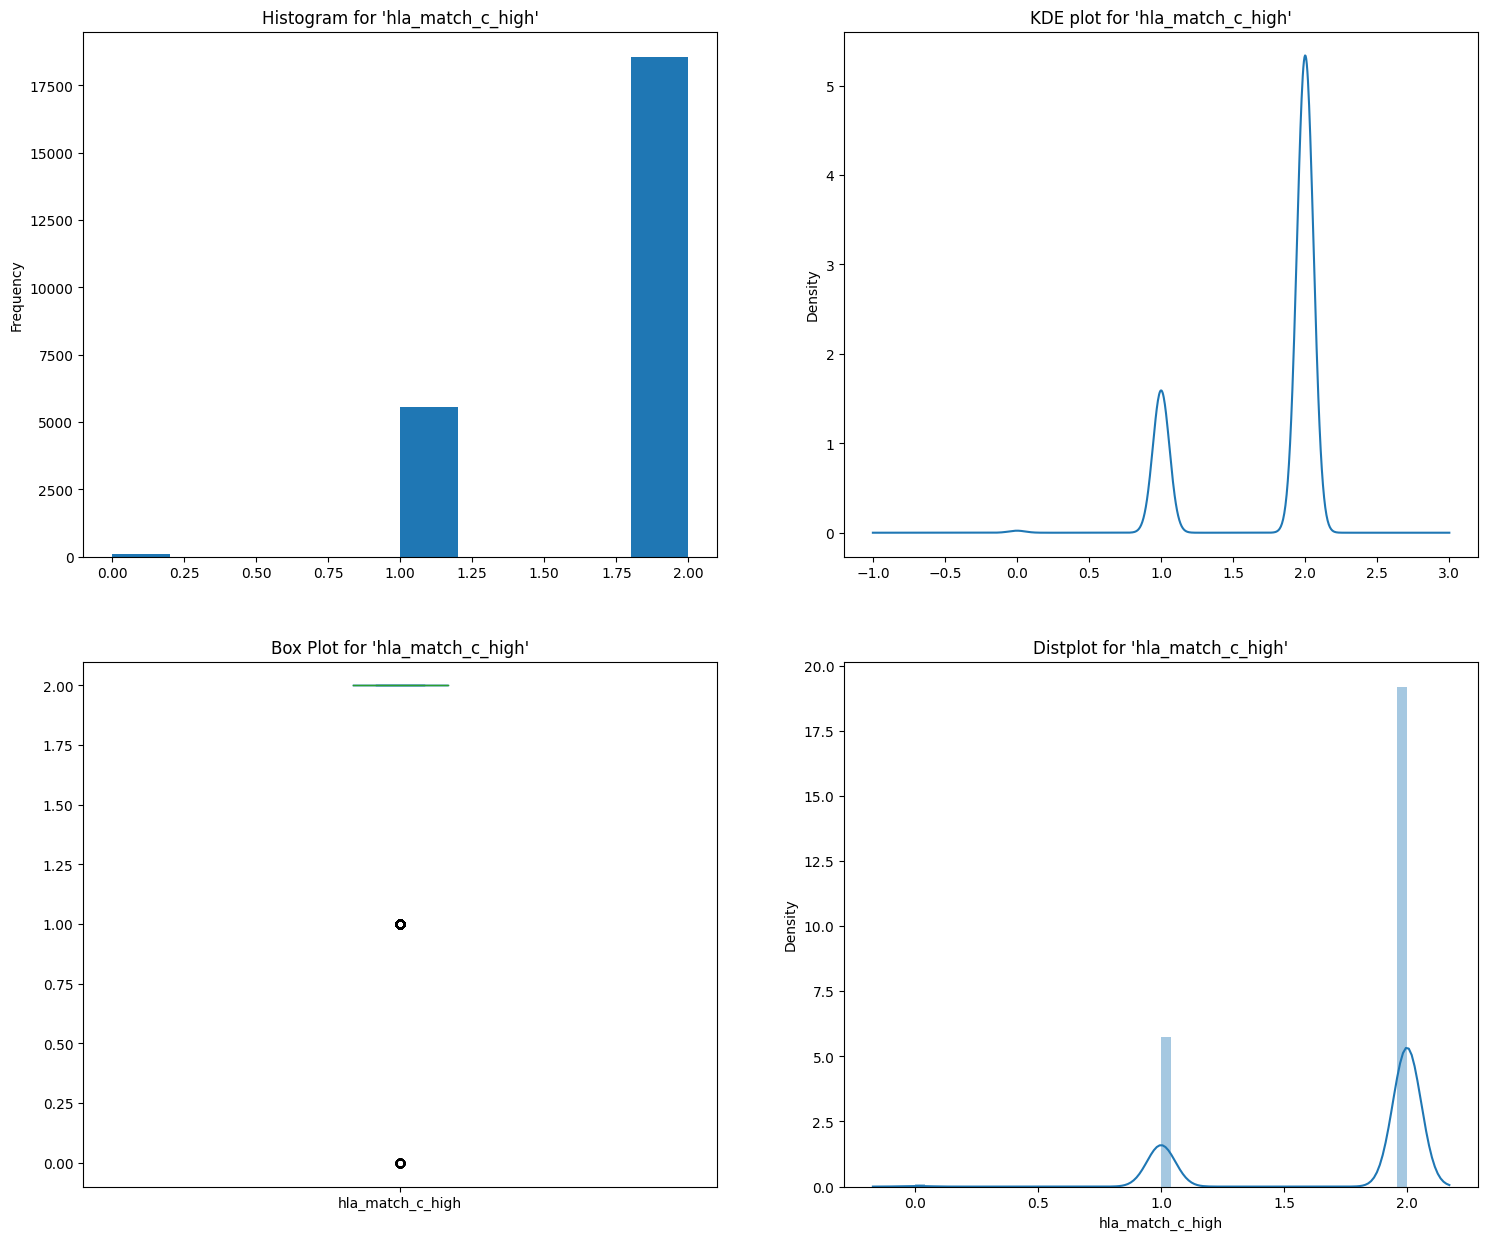

In [87]:
show_details_and_graphs('hla_match_c_high')

In [88]:
check_outlier('hla_match_c_high')

Feature Name : hla_match_c_high
Based on Z-Score test :



/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encounter

dri_score psych_disturb    cyto_score diabetes  \
1674                             High            No          Poor      Yes   
1792                             High           NaN           TBD      NaN   
2028                             High           NaN          Poor       No   
2117                     Intermediate            No  Intermediate      Yes   
2480                             High            No     Favorable       No   
...                               ...           ...           ...      ...   
27969  N/A - non-malignant indication            No           NaN       No   
28146                 N/A - pediatric            No           TBD       No   
28164  N/A - non-malignant indication           NaN     Favorable       No   
28489                            High            No          Poor       No   
28550                    Intermediate            No          Poor      NaN   

       hla_match_c_high           tbi_status arrhythmia        graft_type  \
1674                0.0               No TBI         No       Bone marrow   
1792                0.0               No TBI        NaN  Peripheral blood   
2028                0.0    TBI + Cy +- Other         No  Peripheral blood   
2117                0.0  TBI +- Other, <=cGy         No  Peripheral blood   
2480                0.0  TBI +- Other, <=cGy         No  Peripheral blood   
...                 ...                  ...        ...               ...   
27969               0.0    TBI + Cy +- Other         No       Bone marrow   
28146               0.0    TBI + Cy +- Other         No  Peripheral blood   
28164               0.0               No TBI         No       Bone marrow   
28489               0.0  TBI +- Other, <=cGy         No  Peripheral blood   
28550               0.0   TBI +- Other, >cGy         No  Peripheral blood   

      vent_hist renal_issue  ... comorbidity_score karnofsky_score  \
1674         No          No  ...               9.0            90.0   
1792         No         NaN  ...               2.0            80.0   
2028         No          No  ...               5.0            70.0   
2117         No          No  ...               2.0            70.0   
2480         No          No  ...               8.0            70.0   
...         ...         ...  ...               ...             ...   
27969        No          No  ...               0.0           100.0   
28146        No          No  ...               0.0             NaN   
28164        No          No  ...               3.0           100.0   
28489        No          No  ...               0.0           100.0   
28550        No         Yes  ...               2.0            70.0   

      hepatic_mild          tce_div_match donor_related      melphalan_dose  \
1674            No                    NaN       Related  N/A, Mel not given   
1792           NaN                    NaN       Related  N/A, Mel not given   
2028            No  Permissive mismatched       Related                 MEL   
2117            No  Permissive mismatched     Unrelated                 MEL   
2480            No     HvG non-permissive     Unrelated  N/A, Mel not given   
...            ...                    ...           ...                 ...   
27969           No                    NaN       Related  N/A, Mel not given   
28146           No                    NaN       Related                 MEL   
28164           No                    NaN     Unrelated  N/A, Mel not given   
28489           No     HvG non-permissive     Unrelated  N/A, Mel not given   
28550           No  Permissive mismatched       Related                 NaN   

      cardiac pulm_moderate  efs efs_time  
1674       No            No  1.0    1.332  
1792      NaN           NaN  1.0    4.939  
2028       No            No  1.0    2.756  
2117       No           Yes  1.0    6.576  
2480      Yes           Yes  1.0    4.481  
...       ...           ...  ...      ...  
27969      No            No  1.0    8.538  
28146      No           

In [89]:
## These rows seems to contain outliers based on Z-Score upper_limit and lower_limit (mean + 3*std) and (mean - 3*std)

In [90]:
print("Minimum value ",(train['hla_match_c_high']).min())
print("Maximum value ",(train['hla_match_c_high']).max())
print("Mean value ",(train['hla_match_c_high']).mean())
print("Standard Deviation ",(train['hla_match_c_high']).std())

Minimum value  0.0
Maximum value  2.0
Mean value  1.764516129032258
Standard Deviation  0.43194126844594855


In [91]:
train['hla_match_c_high'].describe()

count    24180.000000
mean         1.764516
std          0.431941
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: hla_match_c_high, dtype: float64

In [92]:
hla_match_c_high_upper_limit = train['hla_match_c_high'].mean() + 3*train['hla_match_c_high'].std()
hla_match_c_high_lower_limit = train['hla_match_c_high'].mean() - 3*train['hla_match_c_high'].std()

In [93]:
hla_match_c_high_lower_limit,hla_match_c_high_upper_limit

(0.46869232369441227, 3.060339934370104)

In [94]:
train[train['hla_match_c_high']>hla_match_c_high_upper_limit]

/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


Empty DataFrame
Columns: [dri_score, psych_disturb, cyto_score, diabetes, hla_match_c_high, tbi_status, arrhythmia, graft_type, vent_hist, renal_issue, pulm_severe, prim_disease_hct, cmv_status, tce_imm_match, rituximab, hla_match_dqb1_low, prod_type, cyto_score_detail, conditioning_intensity, ethnicity, year_hct, obesity, mrd_hct, in_vivo_tcd, tce_match, hepatic_severe, donor_age, prior_tumor, peptic_ulcer, age_at_hct, gvhd_proph, rheum_issue, sex_match, race_group, comorbidity_score, karnofsky_score, hepatic_mild, tce_div_match, donor_related, melphalan_dose, cardiac, pulm_moderate, efs, efs_time]
Index: []

[0 rows x 44 columns]

In [95]:
train[train['hla_match_c_high']<hla_match_c_high_lower_limit]

/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invali

dri_score psych_disturb    cyto_score diabetes  \
1674                             High            No          Poor      Yes   
1792                             High           NaN           TBD      NaN   
2028                             High           NaN          Poor       No   
2117                     Intermediate            No  Intermediate      Yes   
2480                             High            No     Favorable       No   
...                               ...           ...           ...      ...   
27969  N/A - non-malignant indication            No           NaN       No   
28146                 N/A - pediatric            No           TBD       No   
28164  N/A - non-malignant indication           NaN     Favorable       No   
28489                            High            No          Poor       No   
28550                    Intermediate            No          Poor      NaN   

       hla_match_c_high           tbi_status arrhythmia        graft_type  \
1674                0.0               No TBI         No       Bone marrow   
1792                0.0               No TBI        NaN  Peripheral blood   
2028                0.0    TBI + Cy +- Other         No  Peripheral blood   
2117                0.0  TBI +- Other, <=cGy         No  Peripheral blood   
2480                0.0  TBI +- Other, <=cGy         No  Peripheral blood   
...                 ...                  ...        ...               ...   
27969               0.0    TBI + Cy +- Other         No       Bone marrow   
28146               0.0    TBI + Cy +- Other         No  Peripheral blood   
28164               0.0               No TBI         No       Bone marrow   
28489               0.0  TBI +- Other, <=cGy         No  Peripheral blood   
28550               0.0   TBI +- Other, >cGy         No  Peripheral blood   

      vent_hist renal_issue  ... comorbidity_score karnofsky_score  \
1674         No          No  ...               9.0            90.0   
1792         No         NaN  ...               2.0            80.0   
2028         No          No  ...               5.0            70.0   
2117         No          No  ...               2.0            70.0   
2480         No          No  ...               8.0            70.0   
...         ...         ...  ...               ...             ...   
27969        No          No  ...               0.0           100.0   
28146        No          No  ...               0.0             NaN   
28164        No          No  ...               3.0           100.0   
28489        No          No  ...               0.0           100.0   
28550        No         Yes  ...               2.0            70.0   

      hepatic_mild          tce_div_match donor_related      melphalan_dose  \
1674            No                    NaN       Related  N/A, Mel not given   
1792           NaN                    NaN       Related  N/A, Mel not given   
2028            No  Permissive mismatched       Related                 MEL   
2117            No  Permissive mismatched     Unrelated                 MEL   
2480            No     HvG non-permissive     Unrelated  N/A, Mel not given   
...            ...                    ...           ...                 ...   
27969           No                    NaN       Related  N/A, Mel not given   
28146           No                    NaN       Related                 MEL   
28164           No                    NaN     Unrelated  N/A, Mel not given   
28489           No     HvG non-permissive     Unrelated  N/A, Mel not given   
28550           No  Permissive mismatched       Related                 NaN   

      cardiac pulm_moderate  efs efs_time  
1674       No            No  1.0    1.332  
1792      NaN           NaN  1.0    4.939  
2028       No            No  1.0    2.756  
2117       No           Yes  1.0    6.576  
2480      Yes           Yes  1.0    4.481  
...       ...           ...  ...      ...  
27969      No            No  1.0    8.538  
28146      No           

In [96]:
### Here these 79 rows contains 'hla_match_c_high' value less than its lower limit

**Observation**
- This is a numeric feature and standard scaler can be used

In [97]:
num_cols.append('hla_match_c_high')

In [98]:
train.columns

Index(['dri_score', 'psych_disturb', 'cyto_score', 'diabetes',
       'hla_match_c_high', 'tbi_status', 'arrhythmia', 'graft_type',
       'vent_hist', 'renal_issue', 'pulm_severe', 'prim_disease_hct',
       'cmv_status', 'tce_imm_match', 'rituximab', 'hla_match_dqb1_low',
       'prod_type', 'cyto_score_detail', 'conditioning_intensity', 'ethnicity',
       'year_hct', 'obesity', 'mrd_hct', 'in_vivo_tcd', 'tce_match',
       'hepatic_severe', 'donor_age', 'prior_tumor', 'peptic_ulcer',
       'age_at_hct', 'gvhd_proph', 'rheum_issue', 'sex_match', 'race_group',
       'comorbidity_score', 'karnofsky_score', 'hepatic_mild', 'tce_div_match',
       'donor_related', 'melphalan_dose', 'cardiac', 'pulm_moderate', 'efs',
       'efs_time'],
      dtype='object')

In [99]:
#### tbi_status

Data type: object
Total null values: 0



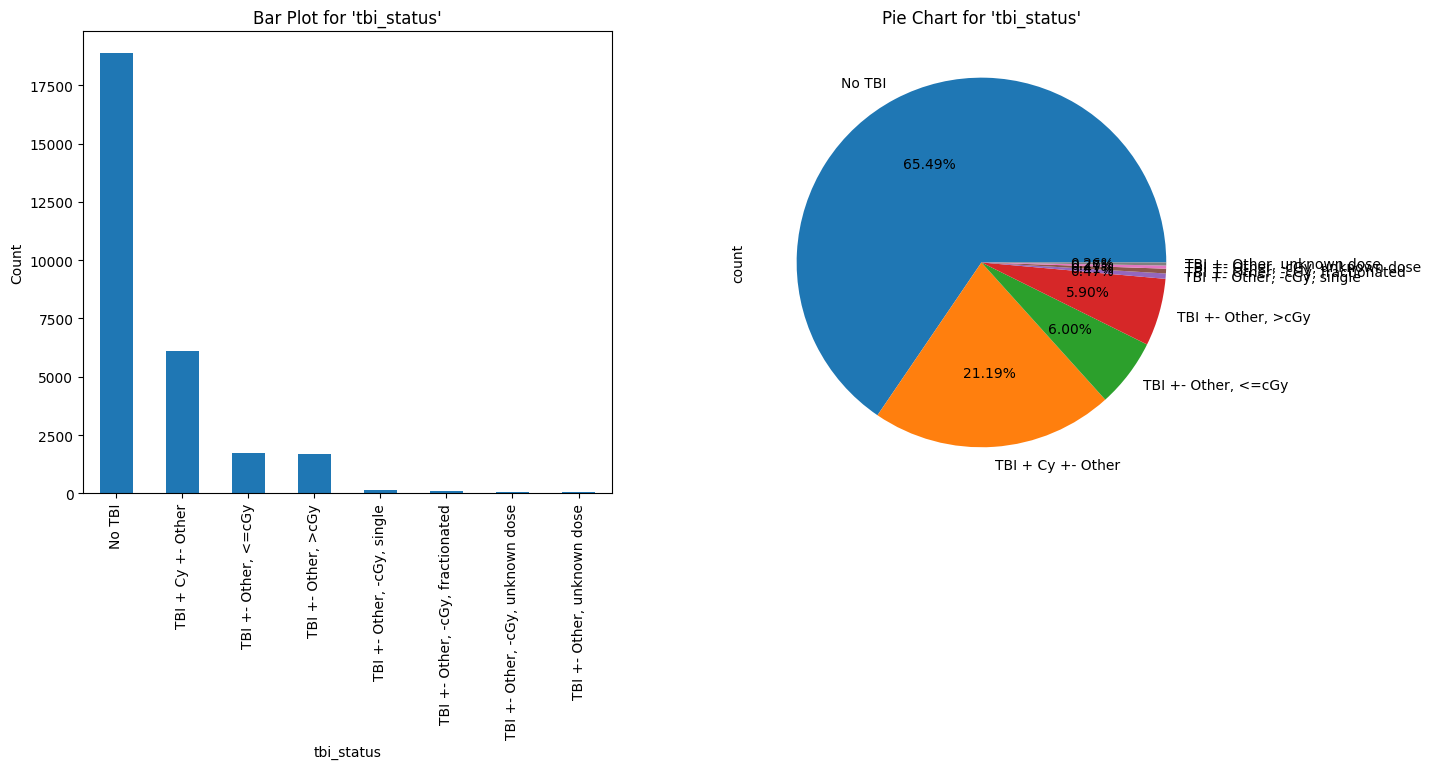

In [100]:
show_details_and_graphs('tbi_status')

In [101]:
## There is no any null values in this column

In [102]:
train['tbi_status'].value_counts()

tbi_status
No TBI                              18861
TBI + Cy +- Other                    6104
TBI +- Other, <=cGy                  1727
TBI +- Other, >cGy                   1700
TBI +- Other, -cGy, single            134
TBI +- Other, -cGy, fractionated      119
TBI +- Other, -cGy, unknown dose       79
TBI +- Other, unknown dose             76
Name: count, dtype: int64

In [103]:
train.groupby('tbi_status')[['efs_time']].mean().sort_values('efs_time',ascending=False) 

efs_time
tbi_status                                 
TBI +- Other, -cGy, fractionated  24.662529
No TBI                            23.889855
TBI + Cy +- Other                 22.679175
TBI +- Other, -cGy, single        21.755410
TBI +- Other, >cGy                21.630912
TBI +- Other, unknown dose        21.399776
TBI +- Other, <=cGy               19.997420
TBI +- Other, -cGy, unknown dose  18.232139

In [104]:
# categories = [[
#     'TBI +- Other, -cGy, fractionated',  # Highest efs_time (24.66)
#     'No TBI',                            # 23.88
#     'TBI + Cy +- Other',                 # 22.67
#     'TBI +- Other, -cGy, single',        # 21.75
#     'TBI +- Other, >cGy',                # 21.63
#     'TBI +- Other, unknown dose',        # 21.39
#     'TBI +- Other, <=cGy',               # 19.99
#     'TBI +- Other, -cGy, unknown dose'   # Lowest efs_time (18.23)
# ]]

In [105]:
cat_ordinal_cols.append('tbi_status')

**Observation**
- Apply Ordinal Encoding here 

In [106]:
### arrhythmia

In [107]:
train['arrhythmia'].dtype

dtype('O')

Data type: object
Total null values: 2202



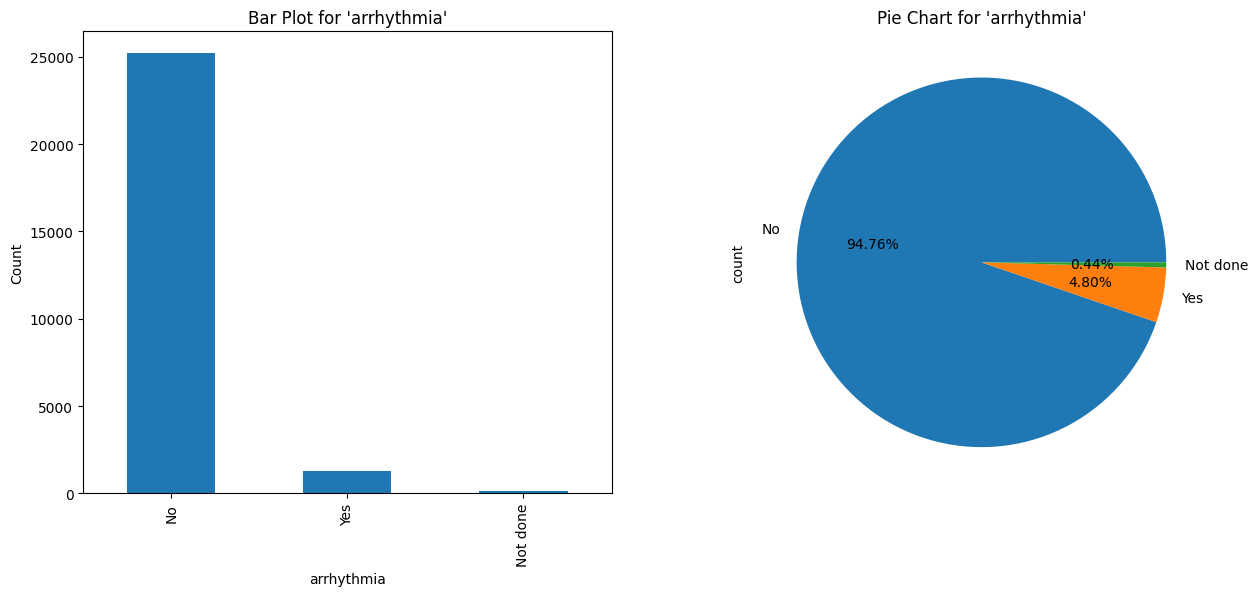

In [108]:
show_details_and_graphs('arrhythmia')

In [109]:
train.groupby('arrhythmia')[['efs_time']].mean().sort_values('efs_time',ascending=False) 

efs_time
arrhythmia           
No          23.940631
Yes         19.326466
Not done    15.919475

In [110]:
# categories = [['Not done', 'No', 'Yes']]

In [111]:
cat_ordinal_cols.append('arrhythmia')

In [112]:
train['arrhythmia'].value_counts()

arrhythmia
No          25203
Yes          1277
Not done      118
Name: count, dtype: int64

**Observation**
- Also the Ordinal Encoding

In [113]:
## function to check average efs_time with respect ro every category in every feature
def show_avg_efs_time(df_col):
    return train.groupby(df_col)[['efs_time']].mean().sort_values('efs_time',ascending=False) 

In [114]:
### graft_type

Data type: object
Total null values: 0



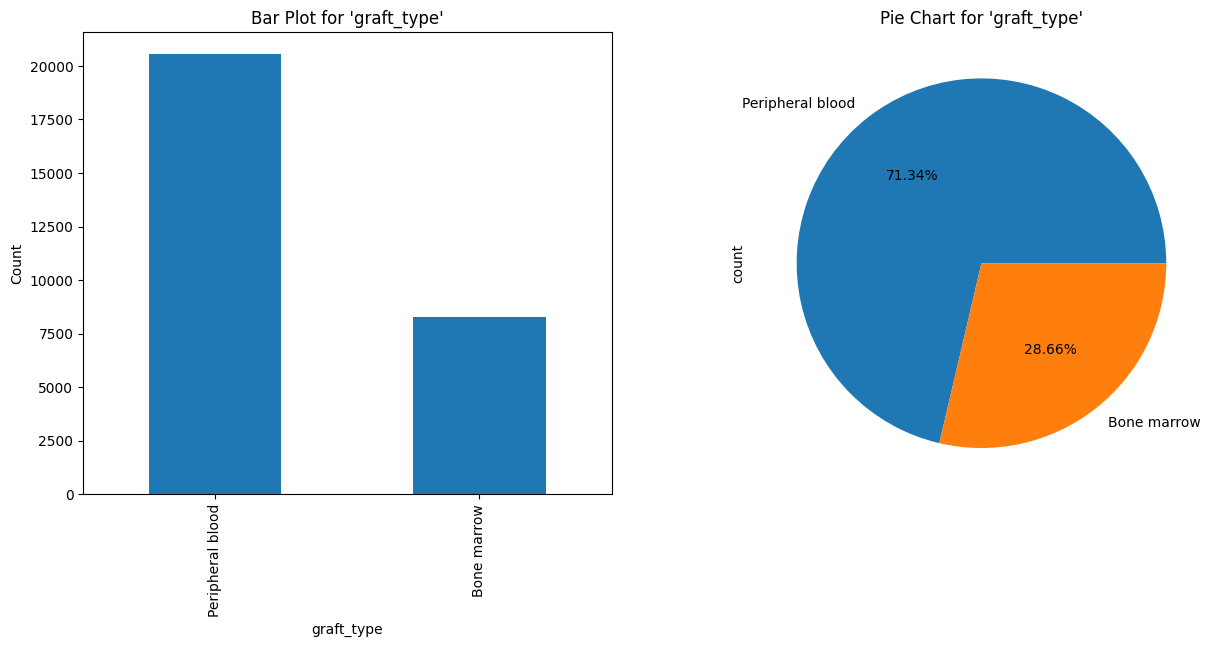

In [115]:
show_details_and_graphs('graft_type')

**Observation**
- This is categorical feature and 71% is of 'Peripheral blood' and 28% is of 'Bone marrow'
- We can apply label/ordinal encoding

In [116]:
cat_label_cols.append('graft_type')

In [117]:
show_avg_efs_time('graft_type')

efs_time
graft_type                 
Bone marrow       29.093114
Peripheral blood  20.885358

In [118]:
### vent_hist

Data type: object
Total null values: 259



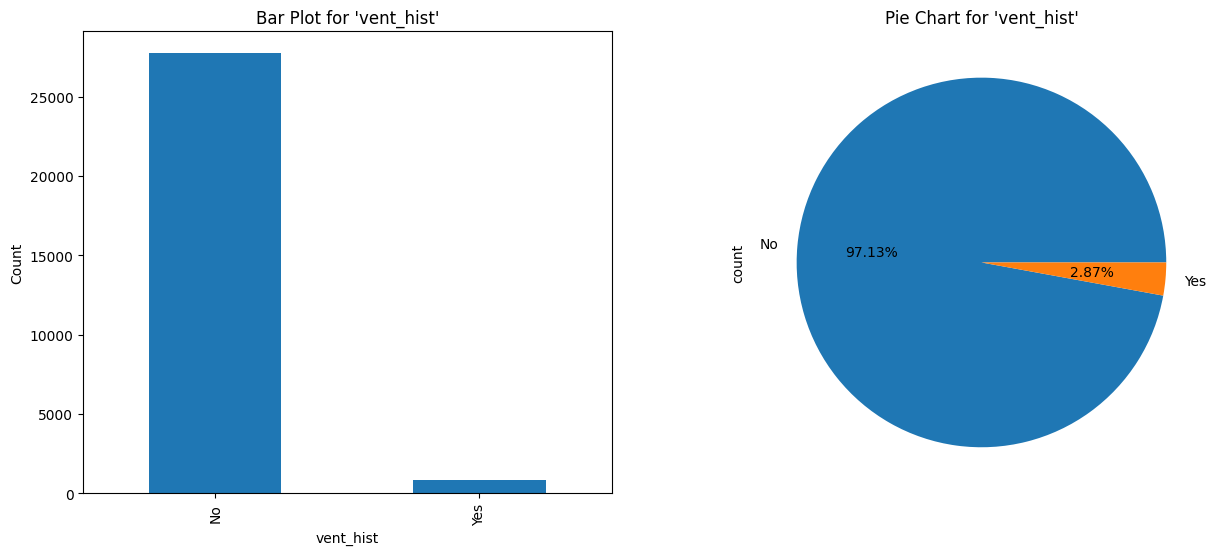

In [119]:
show_details_and_graphs('vent_hist')

In [120]:
show_avg_efs_time('vent_hist')

efs_time
vent_hist           
Yes        23.351444
No         23.211555

#### Observation ->
- Categorical Features most of the values are No and less are Yes.
- Label/Ordinal/Binary encoding can be applied

In [121]:
cat_label_cols.append('vent_hist')

In [122]:
### renal_issue

Data type: object
Total null values: 1915



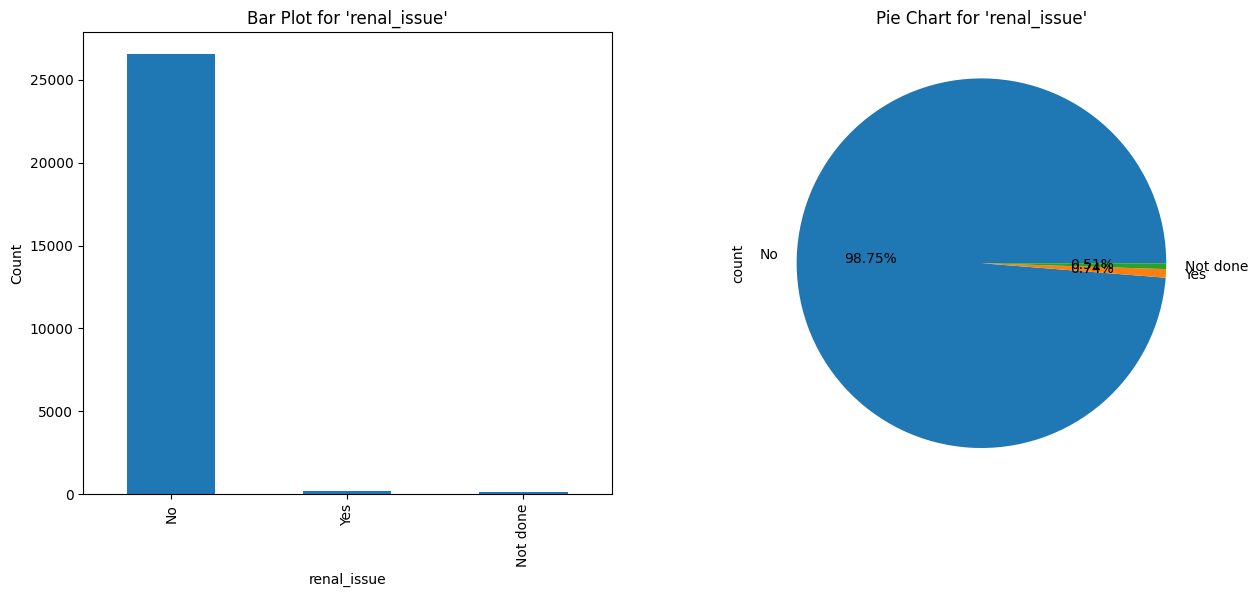

In [123]:
show_details_and_graphs('renal_issue')

#### Observation -->
- Ordinal or Label or Binary encoding can be used
- Most frequency is of 'No'

In [124]:
cat_ordinal_cols.append('renal_issue')

In [125]:
(train.isnull().mean()*100).sort_values(ascending=False)

tce_match                 65.958333
mrd_hct                   57.628472
cyto_score_detail         41.399306
tce_div_match             39.569444
tce_imm_match             38.656250
cyto_score                28.013889
conditioning_intensity    16.628472
hla_match_c_high          16.041667
hla_match_dqb1_low        14.562500
cardiac                    8.826389
peptic_ulcer               8.399306
arrhythmia                 7.645833
rheum_issue                7.579861
rituximab                  7.458333
pulm_severe                7.413194
diabetes                   7.357639
psych_disturb              7.159722
pulm_moderate              7.107639
hepatic_mild               6.656250
renal_issue                6.649306
hepatic_severe             6.496528
donor_age                  6.277778
obesity                    6.111111
prior_tumor                5.826389
melphalan_dose             4.878472
karnofsky_score            3.020833
cmv_status                 2.201389
ethnicity                  2

In [126]:
## These features contains more than 40% null 

# ['tce_match',              
# 'mrd_hct',                   
# 'cyto_score_detail' ,        
# 'tce_div_match',             
# 'tce_imm_match']

## so let's drop these

In [127]:
col_to_drop += ['tce_match','mrd_hct','cyto_score_detail' ,'tce_div_match','tce_imm_match']

In [128]:
train.drop(columns=['tce_match','mrd_hct','cyto_score_detail' ,'tce_div_match','tce_imm_match'], inplace=True)

In [129]:
train.shape

(28800, 39)

In [130]:
train.columns

Index(['dri_score', 'psych_disturb', 'cyto_score', 'diabetes',
       'hla_match_c_high', 'tbi_status', 'arrhythmia', 'graft_type',
       'vent_hist', 'renal_issue', 'pulm_severe', 'prim_disease_hct',
       'cmv_status', 'rituximab', 'hla_match_dqb1_low', 'prod_type',
       'conditioning_intensity', 'ethnicity', 'year_hct', 'obesity',
       'in_vivo_tcd', 'hepatic_severe', 'donor_age', 'prior_tumor',
       'peptic_ulcer', 'age_at_hct', 'gvhd_proph', 'rheum_issue', 'sex_match',
       'race_group', 'comorbidity_score', 'karnofsky_score', 'hepatic_mild',
       'donor_related', 'melphalan_dose', 'cardiac', 'pulm_moderate', 'efs',
       'efs_time'],
      dtype='object')

In [131]:
### pulm_severe

Data type: object
Total null values: 2135



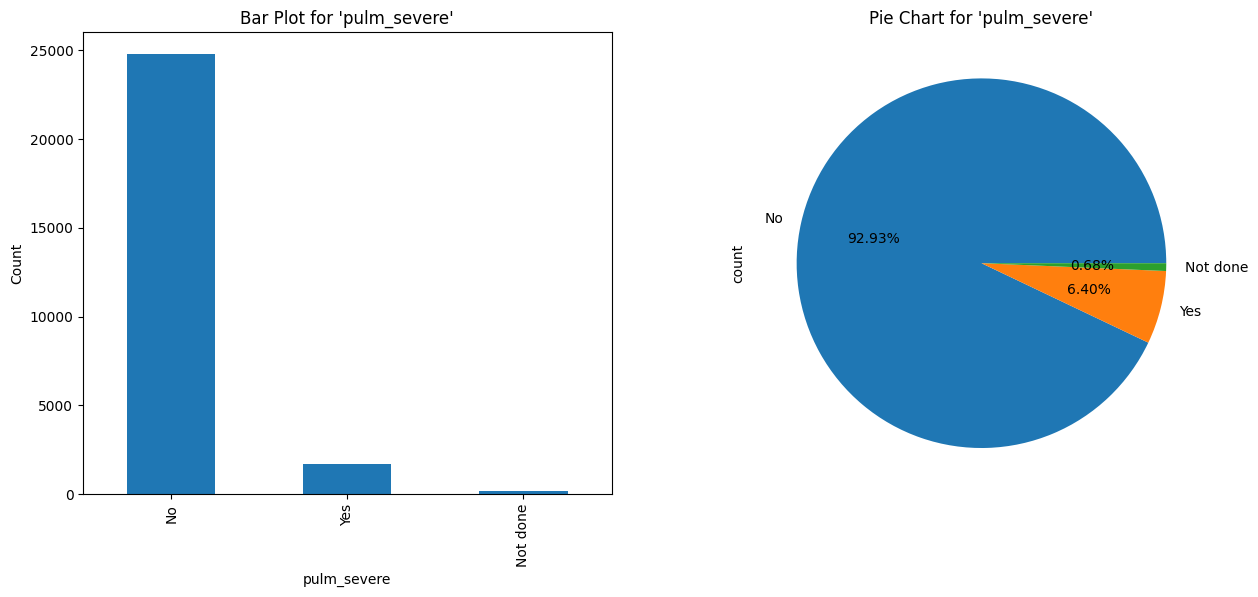

In [132]:
show_details_and_graphs('pulm_severe')

#### Observation ->
- Label/Ordinal Encoding

In [133]:
cat_ordinal_cols.append('pulm_severe')

In [134]:
# category = ['Not done','No','Yes']

In [135]:
## prim_disease_hct

Data type: object
Total null values: 0



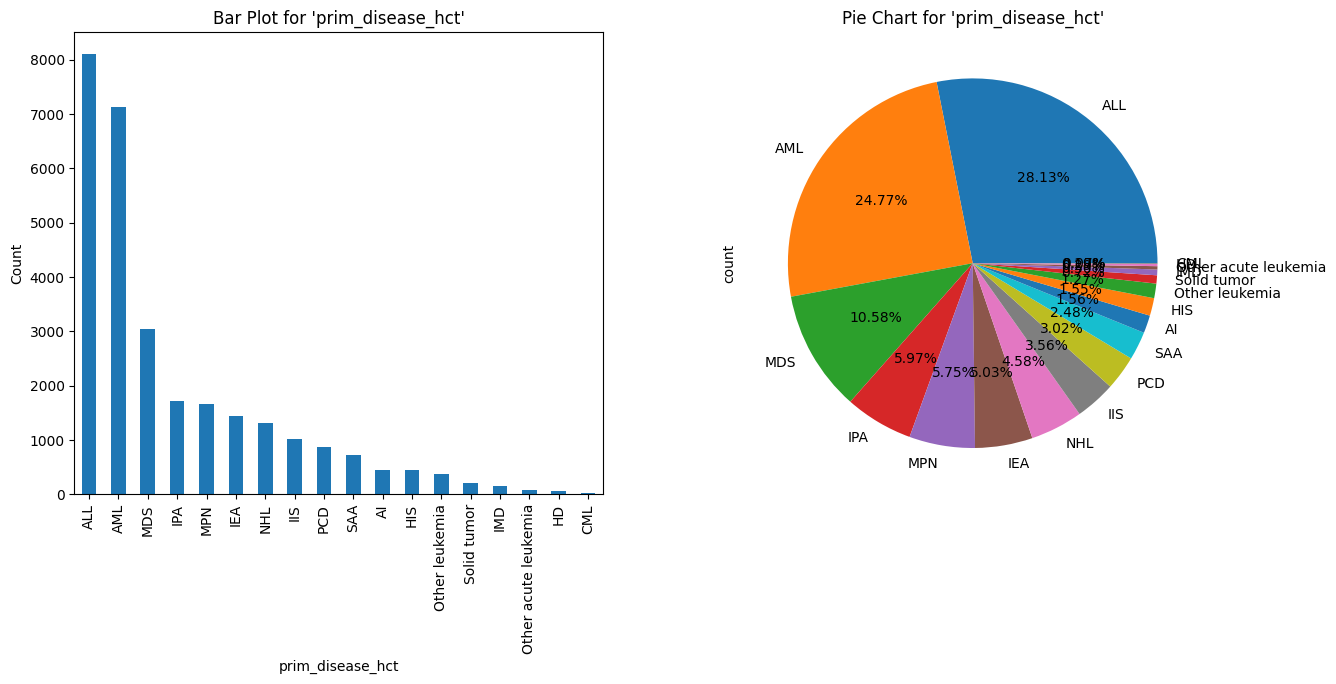

In [136]:
show_details_and_graphs('prim_disease_hct')

In [137]:
train['prim_disease_hct'].value_counts()

prim_disease_hct
ALL                     8102
AML                     7135
MDS                     3046
IPA                     1719
MPN                     1656
IEA                     1449
NHL                     1319
IIS                     1024
PCD                      869
SAA                      713
AI                       449
HIS                      445
Other leukemia           366
Solid tumor              207
IMD                      144
Other acute leukemia      83
HD                        54
CML                       20
Name: count, dtype: int64

#### Observation ->
- Here we can apply OHE

In [138]:
cat_ohe_cols.append('prim_disease_hct')

In [139]:
### cmv_status

Data type: object
Total null values: 634



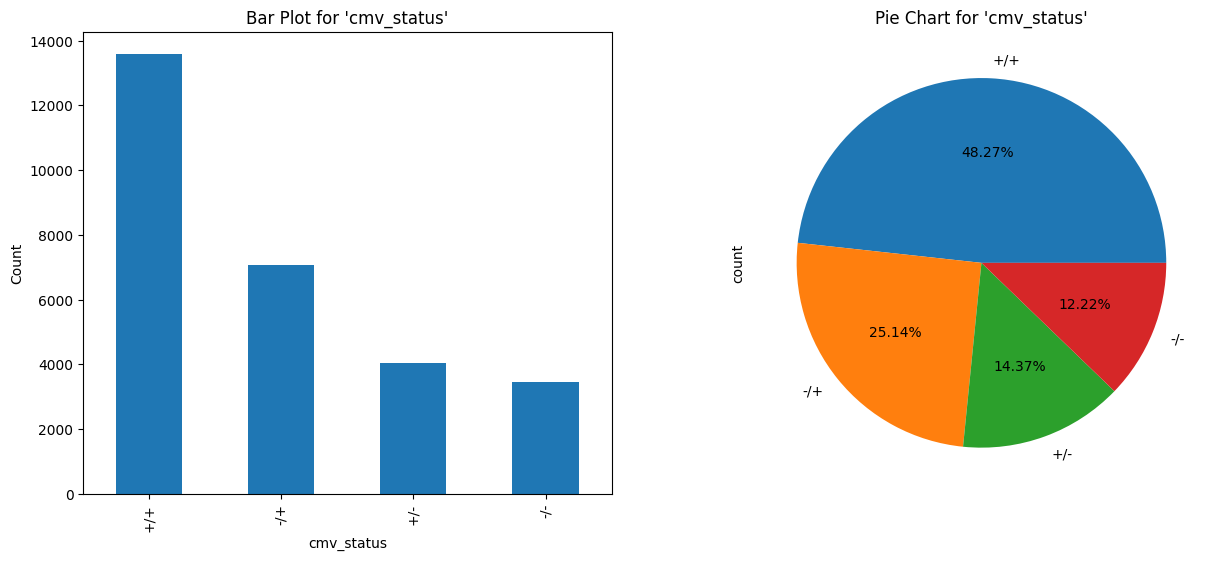

In [140]:
show_details_and_graphs('cmv_status')

In [141]:
train['cmv_status'].unique()

array(['+/+', '-/+', '-/-', nan, '+/-'], dtype=object)

In [142]:
# categories = [['-/-', '-/+', '+/+', '+/-']]

In [143]:
cat_ordinal_cols.append('cmv_status')

In [144]:
### rituximab

In [145]:
train.columns

Index(['dri_score', 'psych_disturb', 'cyto_score', 'diabetes',
       'hla_match_c_high', 'tbi_status', 'arrhythmia', 'graft_type',
       'vent_hist', 'renal_issue', 'pulm_severe', 'prim_disease_hct',
       'cmv_status', 'rituximab', 'hla_match_dqb1_low', 'prod_type',
       'conditioning_intensity', 'ethnicity', 'year_hct', 'obesity',
       'in_vivo_tcd', 'hepatic_severe', 'donor_age', 'prior_tumor',
       'peptic_ulcer', 'age_at_hct', 'gvhd_proph', 'rheum_issue', 'sex_match',
       'race_group', 'comorbidity_score', 'karnofsky_score', 'hepatic_mild',
       'donor_related', 'melphalan_dose', 'cardiac', 'pulm_moderate', 'efs',
       'efs_time'],
      dtype='object')

Data type: object
Total null values: 2148



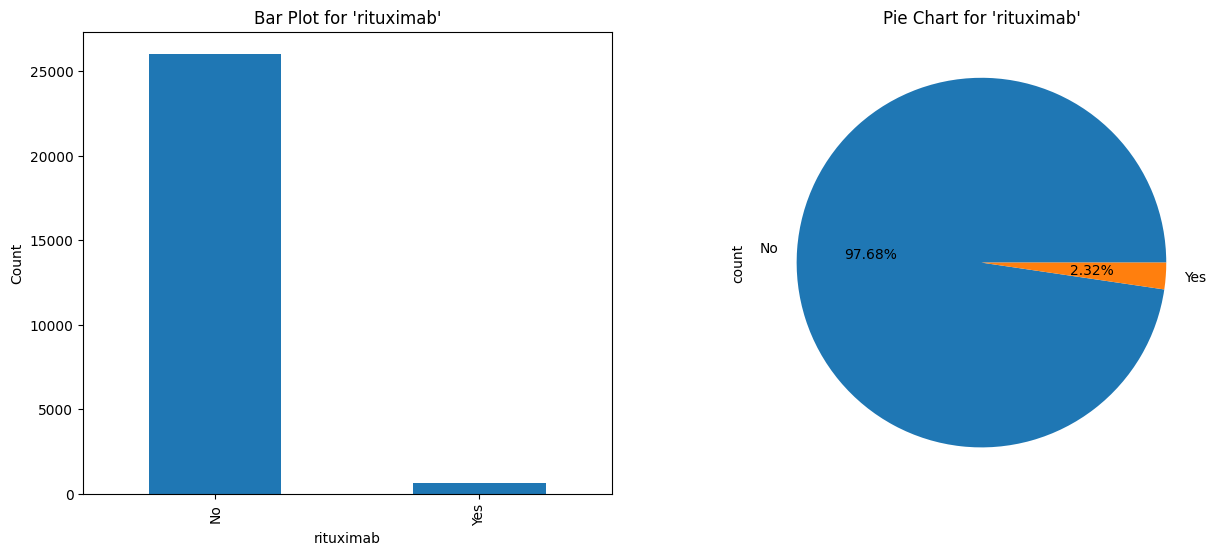

In [146]:
show_details_and_graphs('rituximab')

In [147]:
# category = ['No','Yes']

In [148]:
cat_label_cols.append('rituximab')

In [149]:
## hla_match_dqb1_low

Data type: float64
Total null values: 4194



<ipython-input-49-2b9663e6bea9>:39: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['{}'.format(df_col)])
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


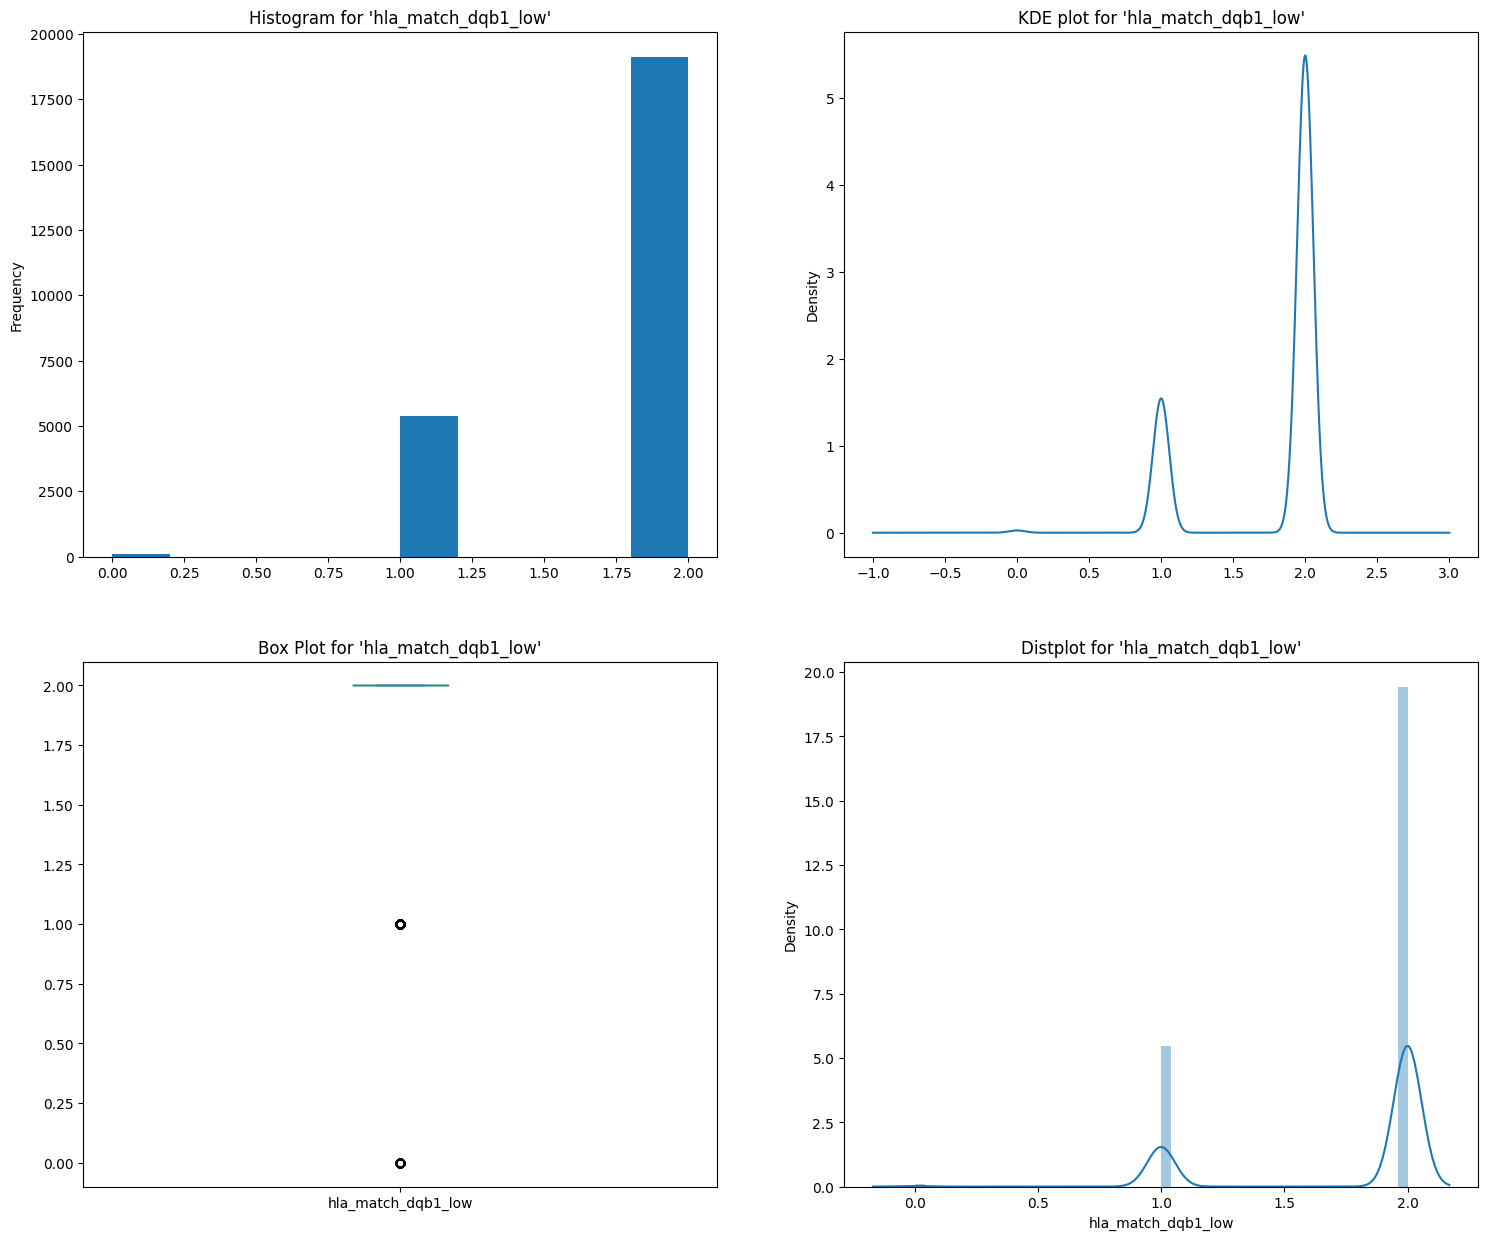

In [150]:
show_details_and_graphs('hla_match_dqb1_low')

In [151]:
check_outlier('hla_match_dqb1_low')

Feature Name : hla_match_dqb1_low
Based on Z-Score test :



/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encounter

dri_score psych_disturb    cyto_score  diabetes  \
349                              High            No         Other        No   
366                      Intermediate           NaN          Poor       NaN   
603                   N/A - pediatric            No           NaN        No   
674                              High            No  Intermediate        No   
882                      Intermediate            No          Poor  Not done   
...                               ...           ...           ...       ...   
26208                    Intermediate            No  Intermediate        No   
26317                    Intermediate           Yes  Intermediate        No   
26361                 N/A - pediatric            No          Poor       NaN   
26682                 N/A - pediatric      Not done          Poor        No   
28102  N/A - non-malignant indication           Yes        Normal        No   

       hla_match_c_high           tbi_status arrhythmia        graft_type  \
349                 2.0   TBI +- Other, >cGy         No       Bone marrow   
366                 2.0               No TBI        NaN  Peripheral blood   
603                 NaN               No TBI         No       Bone marrow   
674                 2.0               No TBI        Yes       Bone marrow   
882                 2.0               No TBI         No       Bone marrow   
...                 ...                  ...        ...               ...   
26208               1.0    TBI + Cy +- Other         No       Bone marrow   
26317               2.0               No TBI         No       Bone marrow   
26361               1.0    TBI + Cy +- Other        NaN       Bone marrow   
26682               1.0  TBI +- Other, <=cGy         No  Peripheral blood   
28102               NaN    TBI + Cy +- Other         No  Peripheral blood   

      vent_hist renal_issue  ...                                 race_group  \
349          No          No  ...           American Indian or Alaska Native   
366          No         NaN  ...                         More than one race   
603         Yes          No  ...           American Indian or Alaska Native   
674          No          No  ...  Native Hawaiian or other Pacific Islander   
882          No          No  ...  Native Hawaiian or other Pacific Islander   
...         ...         ...  ...                                        ...   
26208        No          No  ...  Native Hawaiian or other Pacific Islander   
26317        No          No  ...                         More than one race   
26361        No         NaN  ...  Native Hawaiian or other Pacific Islander   
26682        No          No  ...  Native Hawaiian or other Pacific Islander   
28102        No          No  ...  Native Hawaiian or other Pacific Islander   

      comorbidity_score karnofsky_score hepatic_mild  donor_related  \
349                 0.0            90.0           No      Unrelated   
366                 3.0            90.0          NaN      Unrelated   
603                 0.0           100.0           No        Related   
674                 3.0            80.0           No      Unrelated   
882                 2.0            70.0     Not done      Unrelated   
...                 ...             ...          ...            ...   
26208               0.0            90.0           No        Related   
26317               2.0            70.0          Yes            NaN   
26361               2.0            80.0          NaN        Related   
26682               2.0            70.0     Not done        Related   
28102               2.0            70.0           No        Related   

           melphalan_dose cardiac pulm_moderate  efs efs_time  
349                   NaN      No            No  1.0    2.469  
366    N/A, Mel not given     NaN           NaN  1.0    7.684  
603    N/A, Mel not given      No            No  0.0   48.601  
674    N/A, Mel not given     Yes           Yes  1.0    3.321  
882    N/A, Mel not given      N

In [152]:
num_cols.append('hla_match_dqb1_low')

#### Observation ->
- We can apply standard scaler

In [153]:
#### prod_type

Data type: object
Total null values: 0



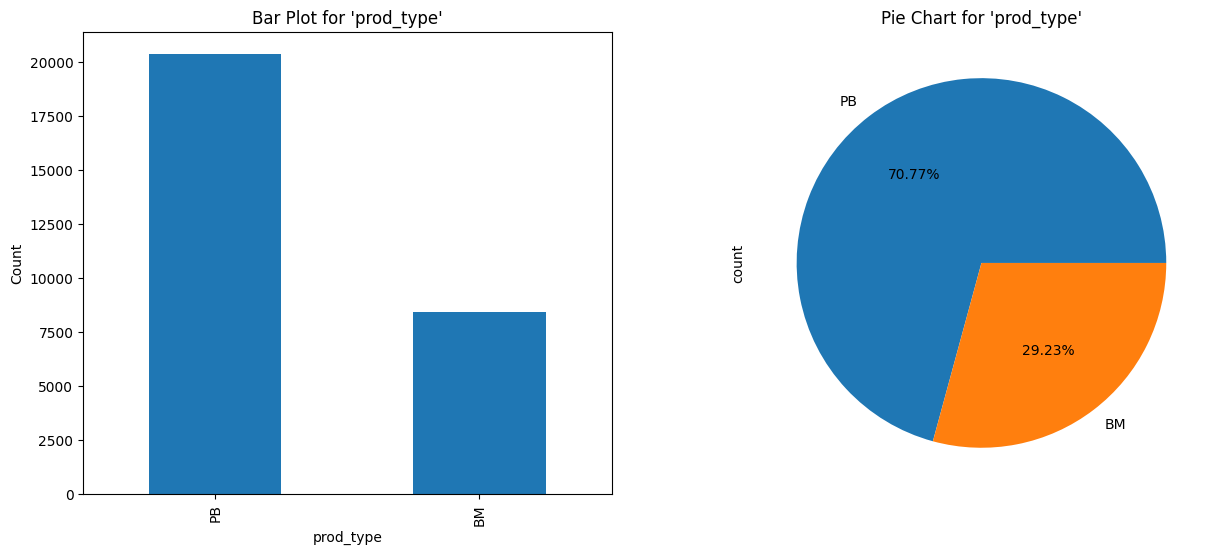

In [154]:
show_details_and_graphs('prod_type')

In [155]:
cat_label_cols.append('prod_type')

In [156]:
train.columns

Index(['dri_score', 'psych_disturb', 'cyto_score', 'diabetes',
       'hla_match_c_high', 'tbi_status', 'arrhythmia', 'graft_type',
       'vent_hist', 'renal_issue', 'pulm_severe', 'prim_disease_hct',
       'cmv_status', 'rituximab', 'hla_match_dqb1_low', 'prod_type',
       'conditioning_intensity', 'ethnicity', 'year_hct', 'obesity',
       'in_vivo_tcd', 'hepatic_severe', 'donor_age', 'prior_tumor',
       'peptic_ulcer', 'age_at_hct', 'gvhd_proph', 'rheum_issue', 'sex_match',
       'race_group', 'comorbidity_score', 'karnofsky_score', 'hepatic_mild',
       'donor_related', 'melphalan_dose', 'cardiac', 'pulm_moderate', 'efs',
       'efs_time'],
      dtype='object')

In [157]:
### conditioning_intensity

Data type: object
Total null values: 4789



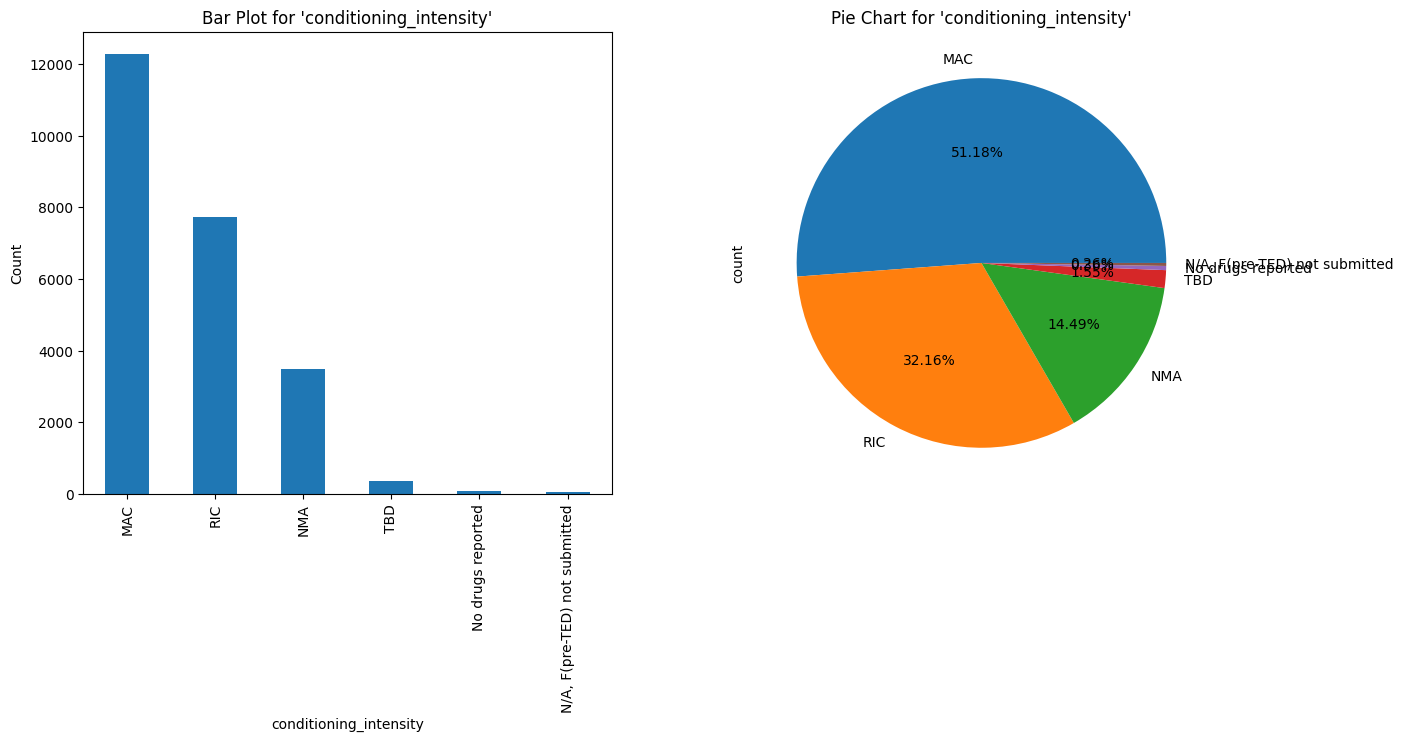

In [158]:
show_details_and_graphs('conditioning_intensity')

In [159]:
show_avg_efs_time('conditioning_intensity')

efs_time
conditioning_intensity                  
MAC                            22.951099
N/A, F(pre-TED) not submitted  22.699952
NMA                            22.662887
TBD                            21.135466
No drugs reported              20.240149
RIC                            17.521884

In [160]:
# categories = [[
#     'MAC', 'N/A, F(pre-TED) not submitted', 'NMA', 'TBD',
#     'No drugs reported', 'RIC'
# ]]

In [161]:
cat_ordinal_cols.append('conditioning_intensity')

In [162]:
### ethnicity

Data type: object
Total null values: 587



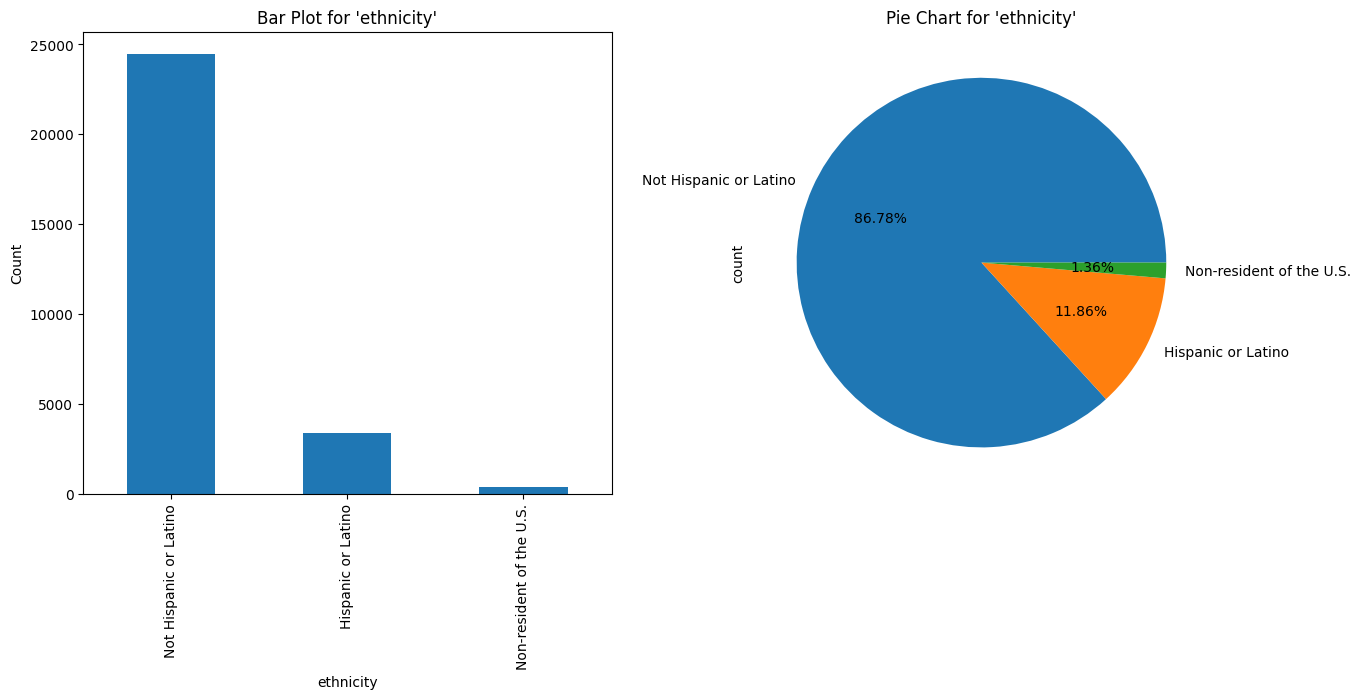

In [163]:
show_details_and_graphs('ethnicity')

In [164]:
show_avg_efs_time('ethnicity')

efs_time
ethnicity                          
Not Hispanic or Latino    23.464130
Hispanic or Latino        22.964329
Non-resident of the U.S.  16.092935

#### Observation -->
- Here Label encoding can be applied.

In [165]:
cat_label_cols.append('ethnicity')

In [166]:
#### year_hct

Data type: int64
Total null values: 0



<ipython-input-49-2b9663e6bea9>:39: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['{}'.format(df_col)])
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


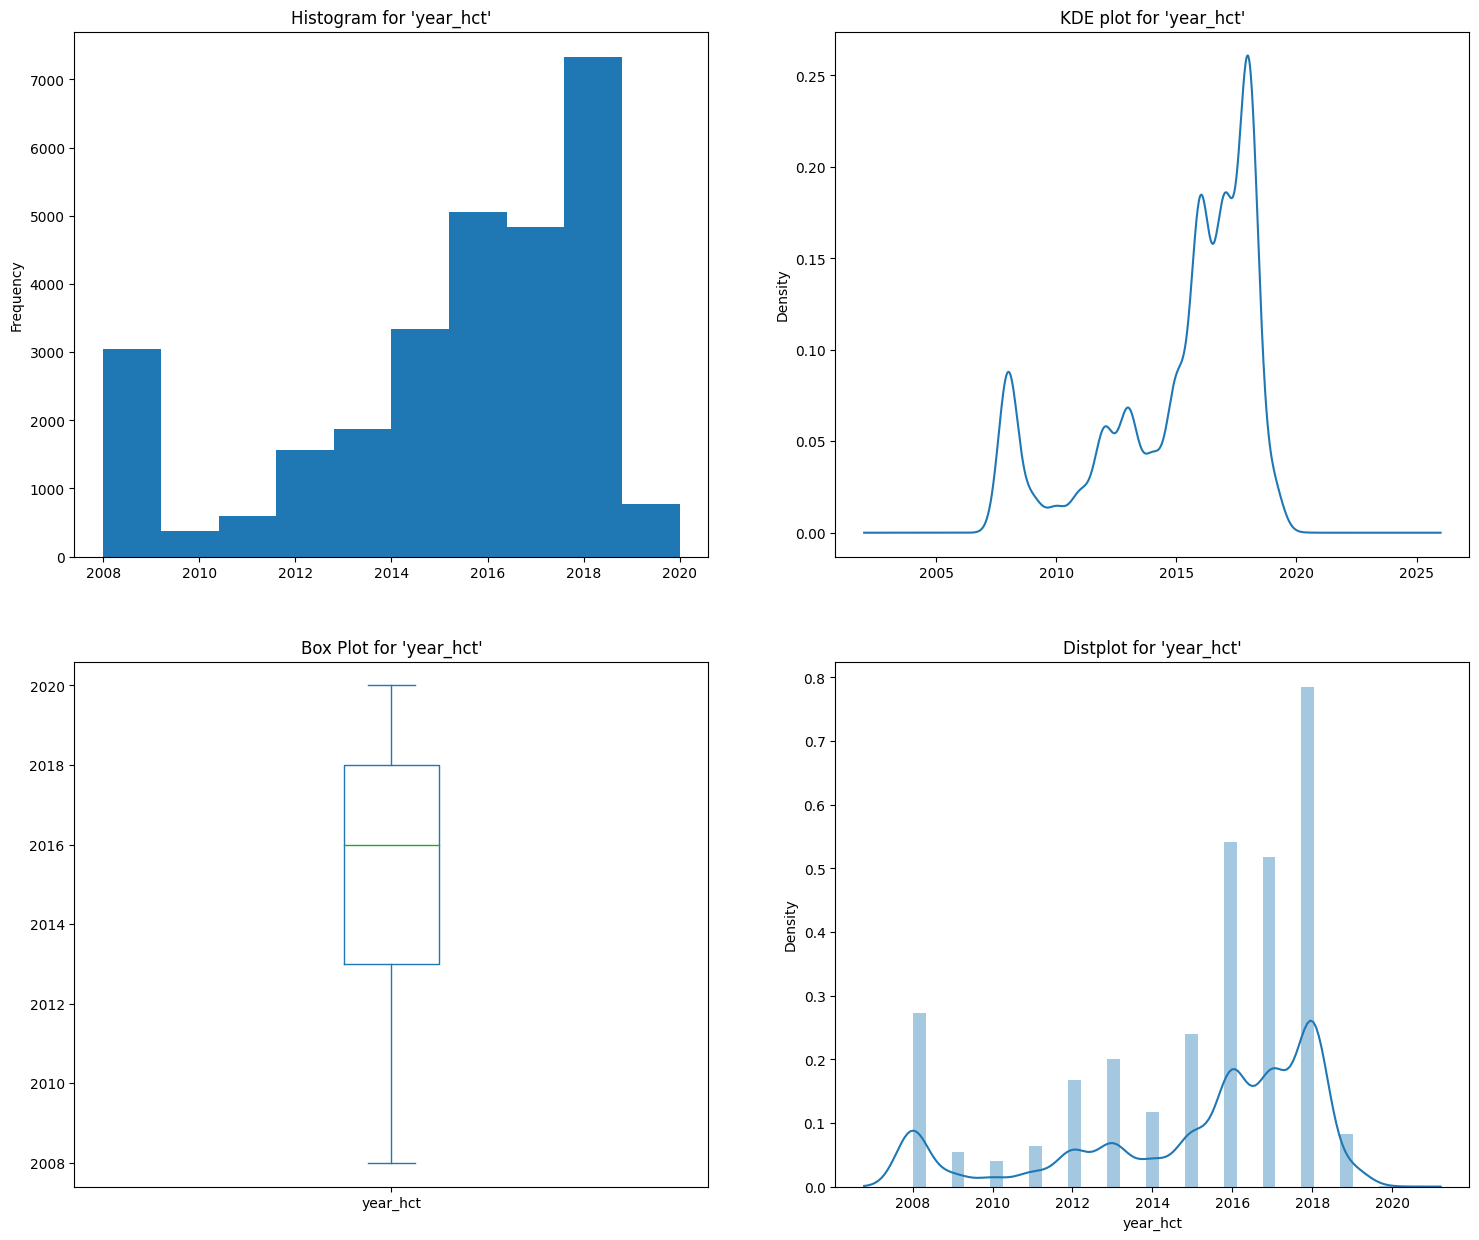

In [167]:
show_details_and_graphs('year_hct')

In [168]:
check_outlier('year_hct')

Feature Name : year_hct
Based on Z-Score test :



Empty DataFrame
Columns: [dri_score, psych_disturb, cyto_score, diabetes, hla_match_c_high, tbi_status, arrhythmia, graft_type, vent_hist, renal_issue, pulm_severe, prim_disease_hct, cmv_status, rituximab, hla_match_dqb1_low, prod_type, conditioning_intensity, ethnicity, year_hct, obesity, in_vivo_tcd, hepatic_severe, donor_age, prior_tumor, peptic_ulcer, age_at_hct, gvhd_proph, rheum_issue, sex_match, race_group, comorbidity_score, karnofsky_score, hepatic_mild, donor_related, melphalan_dose, cardiac, pulm_moderate, efs, efs_time]
Index: []

[0 rows x 39 columns]

In [169]:
num_cols.append('year_hct')

#### Observation ->
- There is no any outlier in this feature

In [170]:
#### obesity

Data type: object
Total null values: 1760



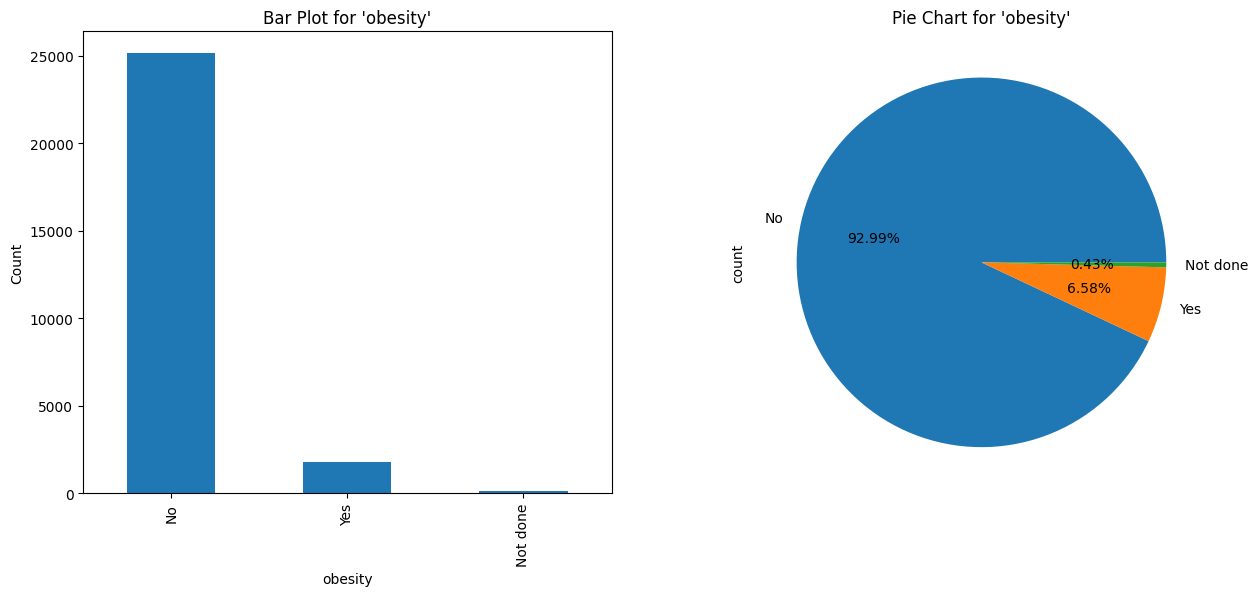

In [171]:
show_details_and_graphs('obesity')

In [172]:
# category = ['Not done','No','Yes']

In [173]:
cat_ordinal_cols.append('obesity')

In [174]:
#### in_vivo_tcd

Data type: object
Total null values: 225



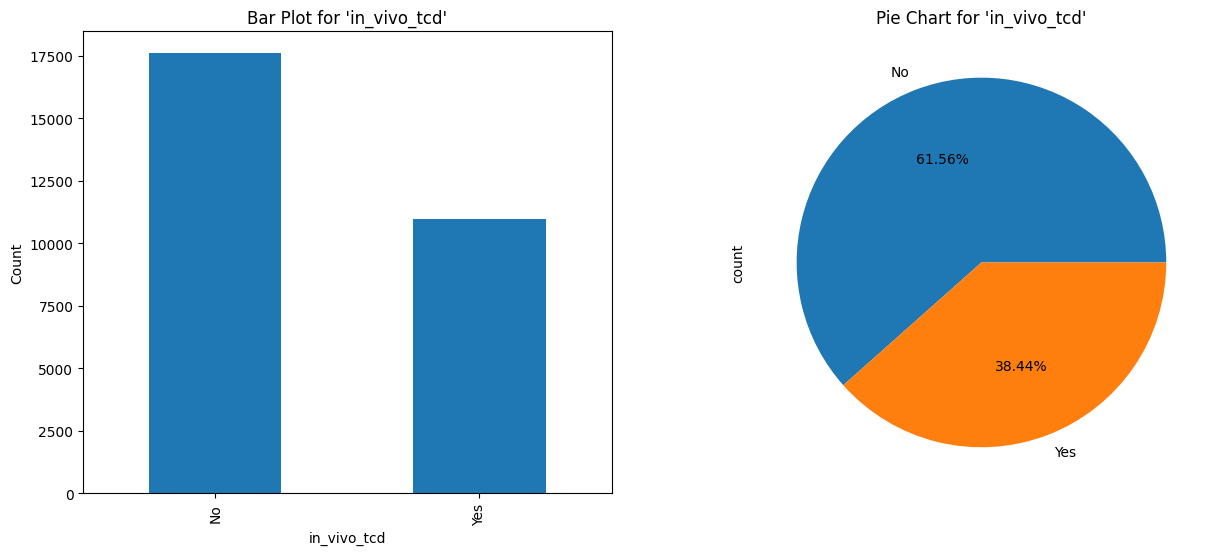

In [175]:
show_details_and_graphs('in_vivo_tcd')

In [176]:
# category = ['No','Yes']

In [177]:
cat_label_cols.append('in_vivo_tcd')

In [178]:
#### hepatic_severe

Data type: object
Total null values: 1871



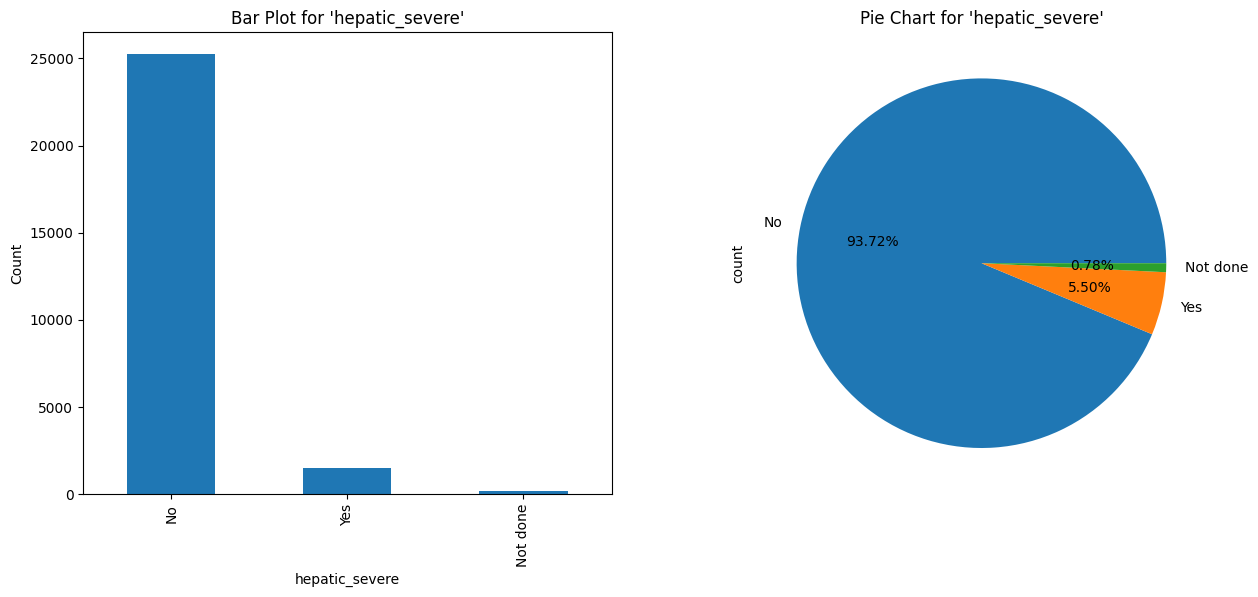

In [179]:
show_details_and_graphs('hepatic_severe')

In [180]:
# category = ['Not done','No','Yes']

In [181]:
cat_ordinal_cols.append('hepatic_severe')

In [182]:
train.columns

Index(['dri_score', 'psych_disturb', 'cyto_score', 'diabetes',
       'hla_match_c_high', 'tbi_status', 'arrhythmia', 'graft_type',
       'vent_hist', 'renal_issue', 'pulm_severe', 'prim_disease_hct',
       'cmv_status', 'rituximab', 'hla_match_dqb1_low', 'prod_type',
       'conditioning_intensity', 'ethnicity', 'year_hct', 'obesity',
       'in_vivo_tcd', 'hepatic_severe', 'donor_age', 'prior_tumor',
       'peptic_ulcer', 'age_at_hct', 'gvhd_proph', 'rheum_issue', 'sex_match',
       'race_group', 'comorbidity_score', 'karnofsky_score', 'hepatic_mild',
       'donor_related', 'melphalan_dose', 'cardiac', 'pulm_moderate', 'efs',
       'efs_time'],
      dtype='object')

In [183]:
### donor_age

Data type: float64
Total null values: 1808



<ipython-input-49-2b9663e6bea9>:39: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['{}'.format(df_col)])
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


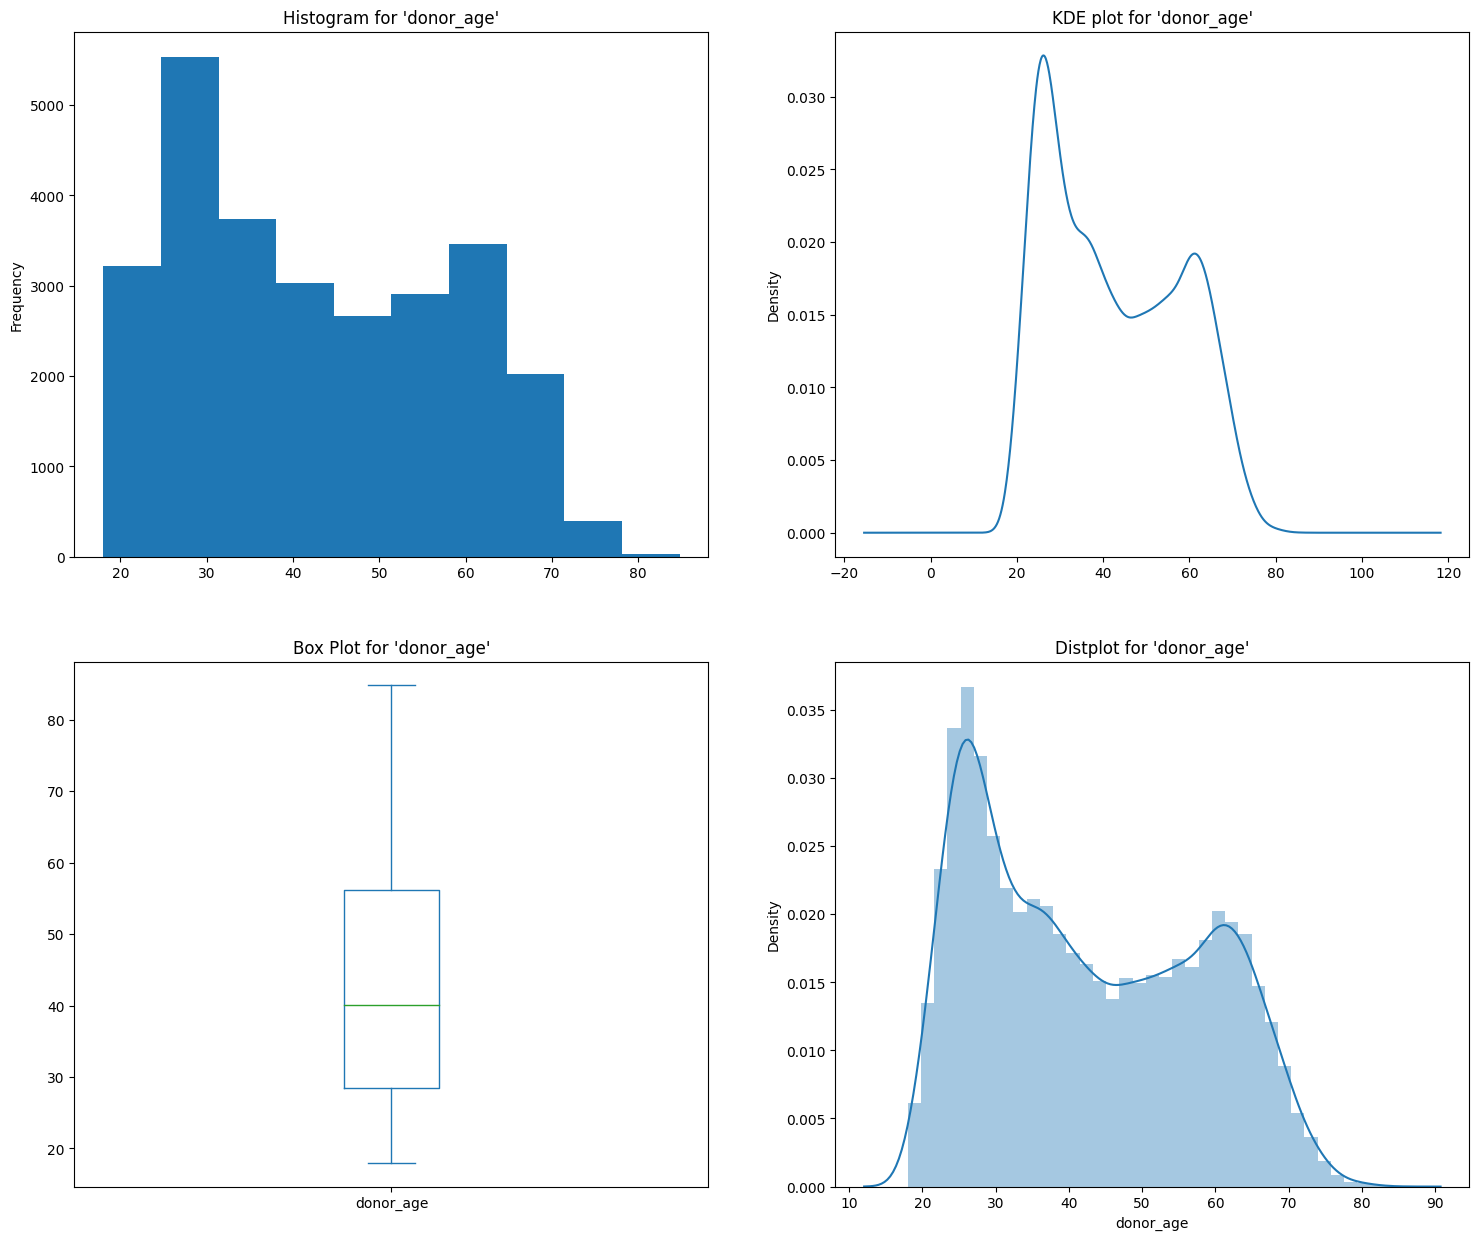

In [184]:
show_details_and_graphs('donor_age')

In [185]:
check_outlier('donor_age')

Feature Name : donor_age
Based on Z-Score test :



/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


Empty DataFrame
Columns: [dri_score, psych_disturb, cyto_score, diabetes, hla_match_c_high, tbi_status, arrhythmia, graft_type, vent_hist, renal_issue, pulm_severe, prim_disease_hct, cmv_status, rituximab, hla_match_dqb1_low, prod_type, conditioning_intensity, ethnicity, year_hct, obesity, in_vivo_tcd, hepatic_severe, donor_age, prior_tumor, peptic_ulcer, age_at_hct, gvhd_proph, rheum_issue, sex_match, race_group, comorbidity_score, karnofsky_score, hepatic_mild, donor_related, melphalan_dose, cardiac, pulm_moderate, efs, efs_time]
Index: []

[0 rows x 39 columns]

In [186]:
num_cols.append('donor_age')

#### Observation ->
- There is no any outlier
- Distribution is also close to normal
  

In [187]:
#### prior_tumor

Data type: object
Total null values: 1678



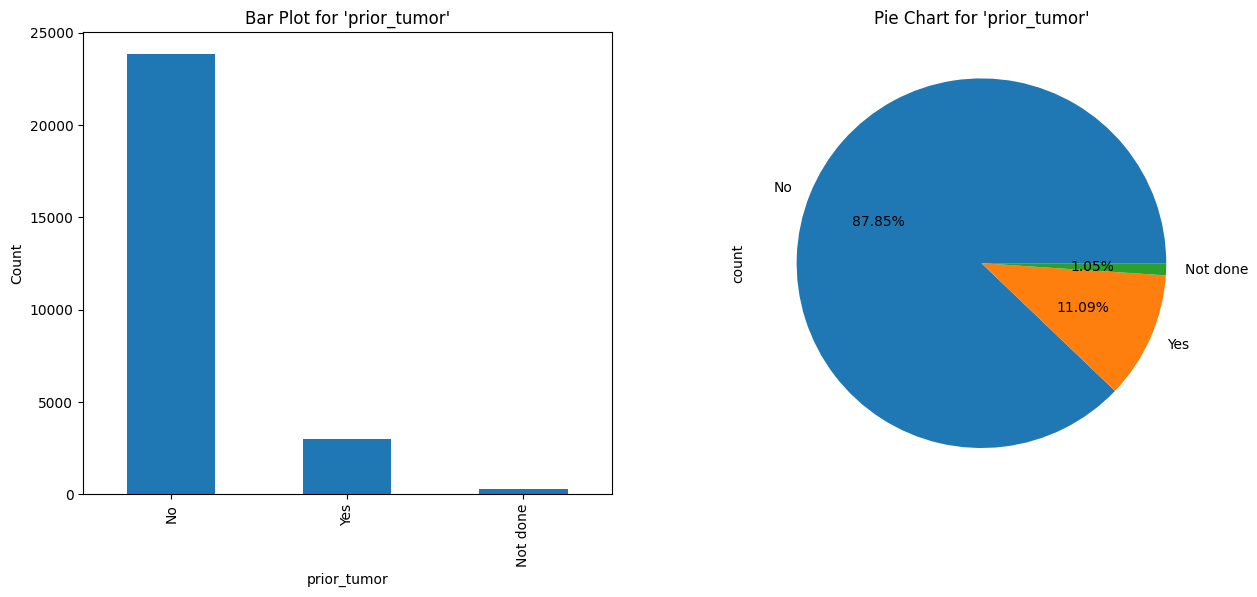

In [188]:
show_details_and_graphs('prior_tumor')

In [189]:
# category = ['Not done','No','Yes']

In [190]:
cat_ordinal_cols.append('prior_tumor')

In [191]:
show_avg_efs_time('prior_tumor')

efs_time
prior_tumor           
Not done     31.219509
No           23.976510
Yes          19.263772

**Observation**
- If there is prior_tumor then avg efs_time is minimum (19.26) and if Not done then (31.21) maximum.

In [192]:
#### peptic_ulcer

Data type: object
Total null values: 2419



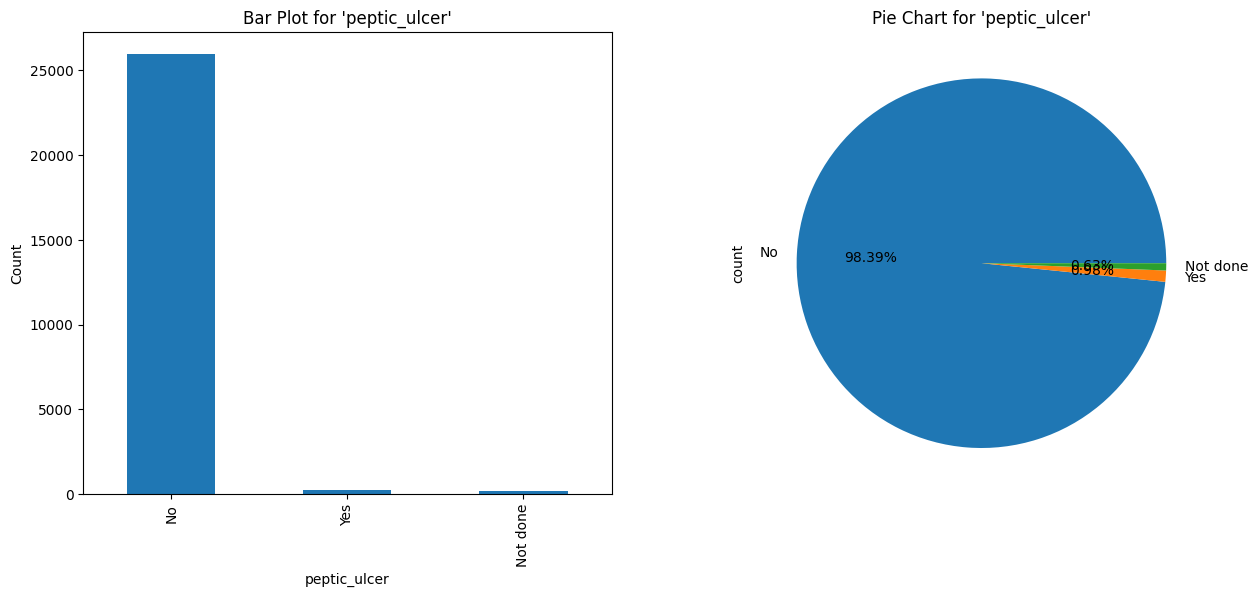

In [193]:
show_details_and_graphs('peptic_ulcer')

In [194]:
# category = ['Not done','No','Yes']

In [195]:
cat_ordinal_cols.append('peptic_ulcer')

In [196]:
#### age_at_hct

Data type: float64
Total null values: 0



<ipython-input-49-2b9663e6bea9>:39: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['{}'.format(df_col)])
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


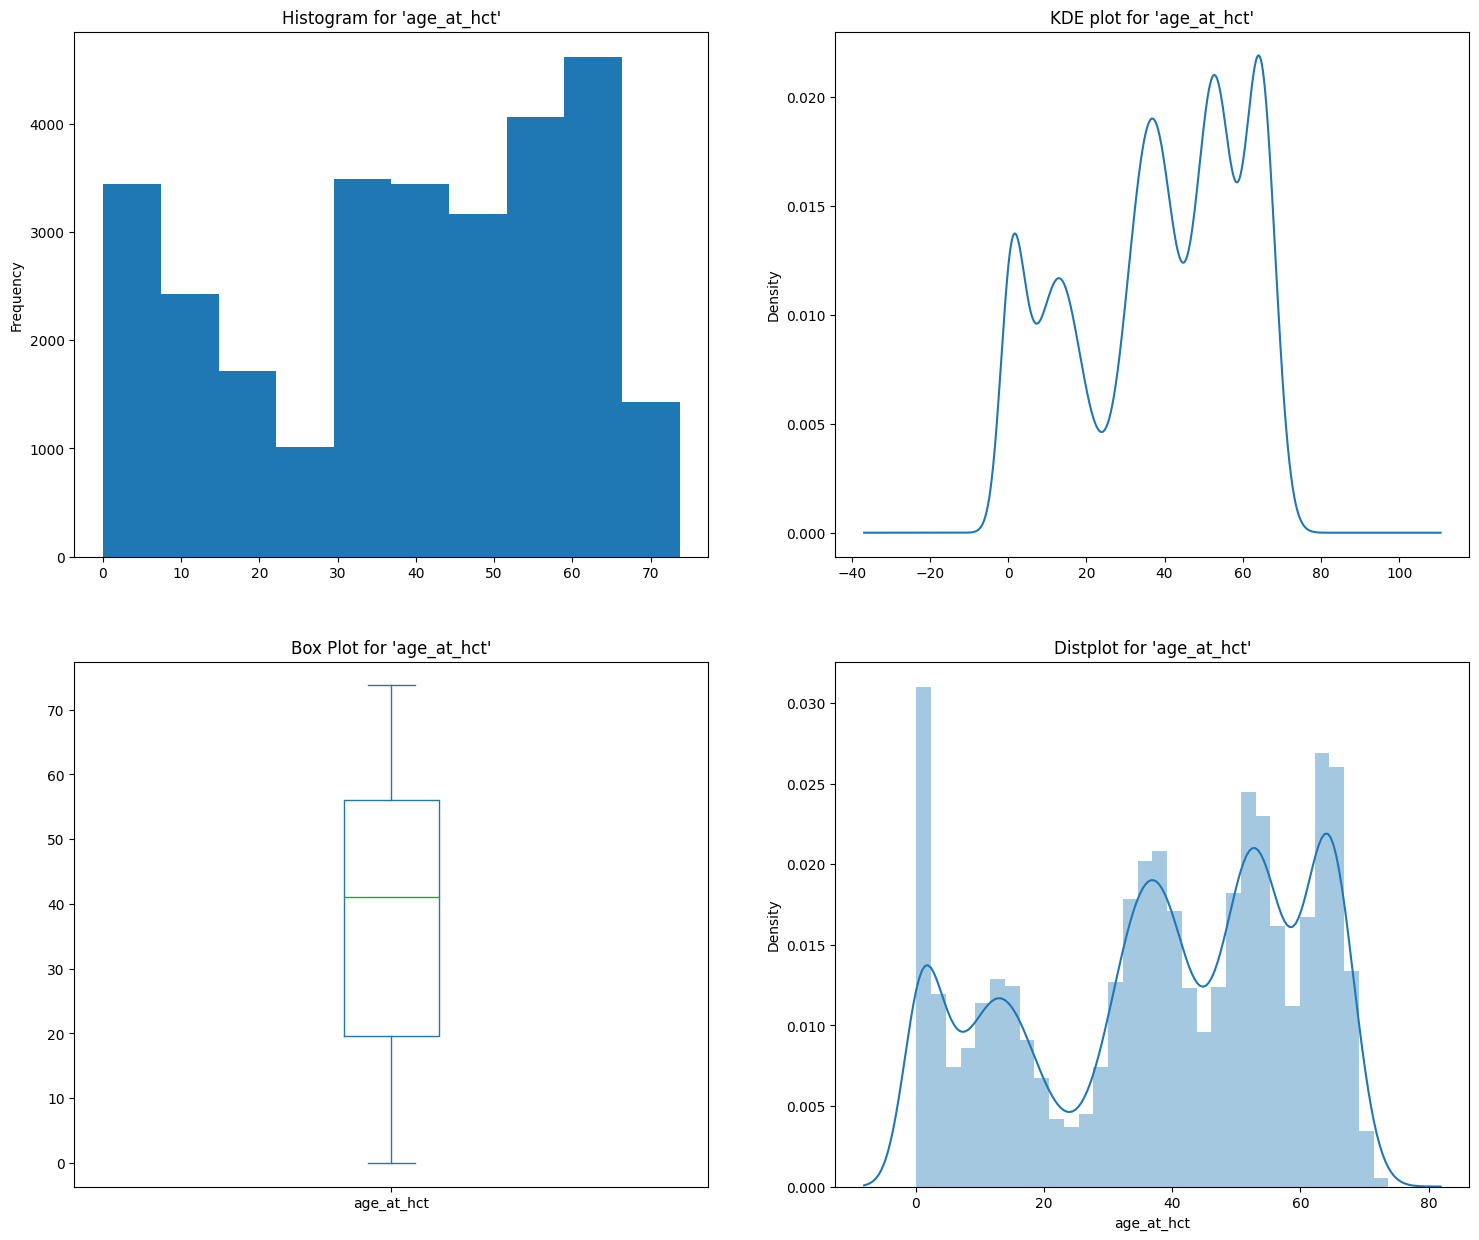

In [197]:
show_details_and_graphs('age_at_hct')

In [198]:
check_outlier('age_at_hct')

Feature Name : age_at_hct
Based on Z-Score test :



Empty DataFrame
Columns: [dri_score, psych_disturb, cyto_score, diabetes, hla_match_c_high, tbi_status, arrhythmia, graft_type, vent_hist, renal_issue, pulm_severe, prim_disease_hct, cmv_status, rituximab, hla_match_dqb1_low, prod_type, conditioning_intensity, ethnicity, year_hct, obesity, in_vivo_tcd, hepatic_severe, donor_age, prior_tumor, peptic_ulcer, age_at_hct, gvhd_proph, rheum_issue, sex_match, race_group, comorbidity_score, karnofsky_score, hepatic_mild, donor_related, melphalan_dose, cardiac, pulm_moderate, efs, efs_time]
Index: []

[0 rows x 39 columns]

In [199]:
num_cols.append('age_at_hct')

#### Observation ->
- There is no any outlier
- Distribution is also similar to normal

In [200]:
#### gvhd_proph

Data type: object
Total null values: 225



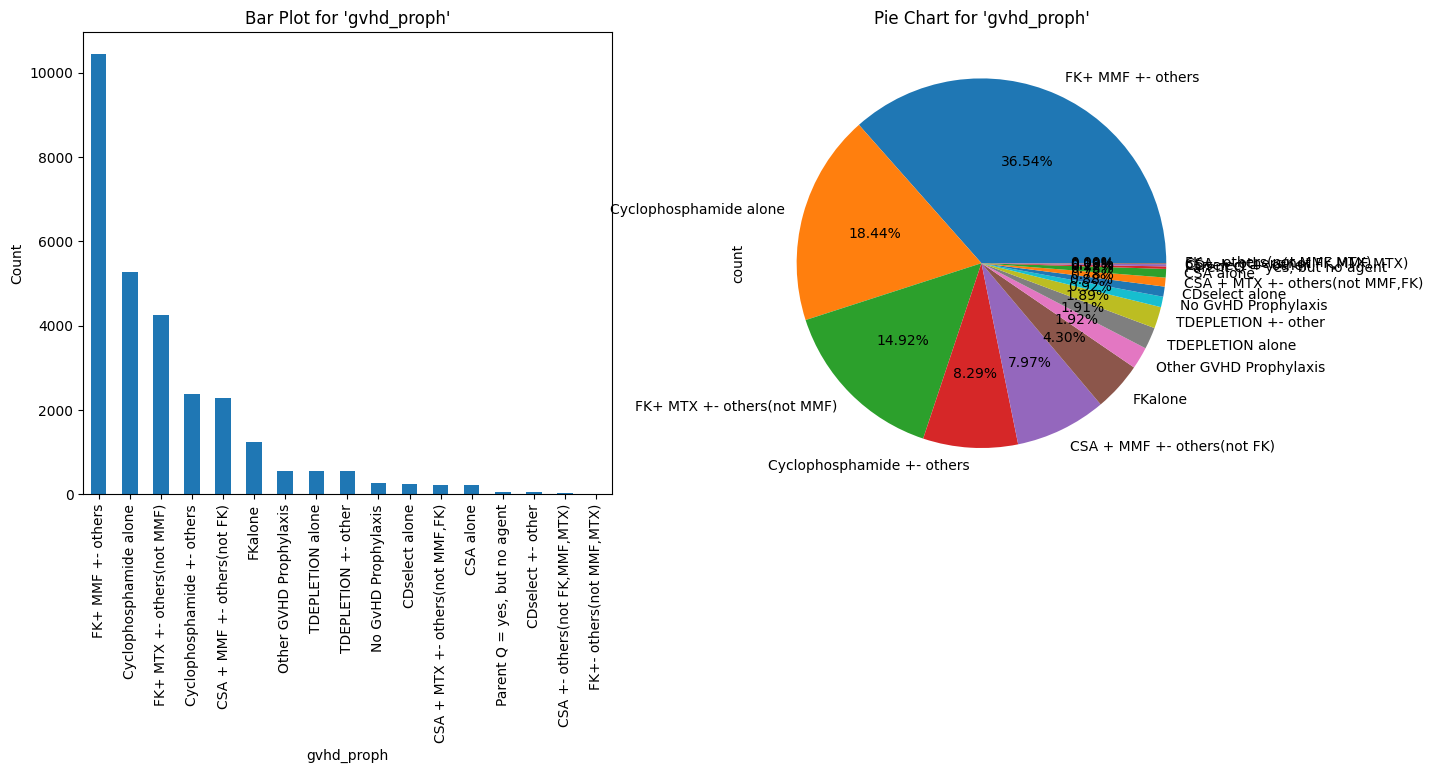

In [201]:
show_details_and_graphs('gvhd_proph')

In [202]:
train['gvhd_proph'].value_counts()

gvhd_proph
FK+ MMF +- others                  10440
Cyclophosphamide alone              5270
FK+ MTX +- others(not MMF)          4262
Cyclophosphamide +- others          2369
CSA + MMF +- others(not FK)         2278
FKalone                             1230
Other GVHD Prophylaxis               550
TDEPLETION alone                     545
TDEPLETION +- other                  539
No GvHD Prophylaxis                  262
CDselect alone                       251
CSA + MTX +- others(not MMF,FK)      224
CSA alone                            214
Parent Q = yes, but no agent          62
CDselect +- other                     55
CSA +- others(not FK,MMF,MTX)         23
FK+- others(not MMF,MTX)               1
Name: count, dtype: int64

In [203]:
len(train['gvhd_proph'].value_counts())

17

In [204]:
## Label Encoding can be applied.

In [205]:
cat_label_cols.append('gvhd_proph')

In [206]:
##### rheum_issue

Data type: object
Total null values: 2183



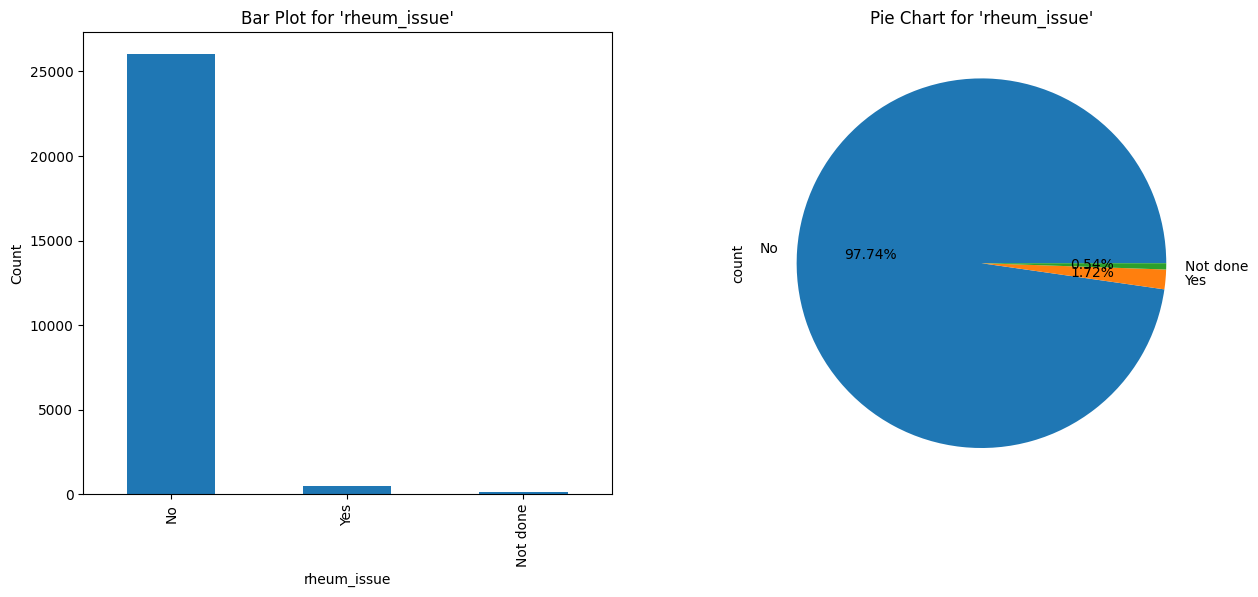

In [207]:
show_details_and_graphs('rheum_issue')

In [208]:
# category = ['Not done','No','Yes']

In [209]:
cat_ordinal_cols.append('rheum_issue')

In [210]:
##### sex_match

Data type: object
Total null values: 261



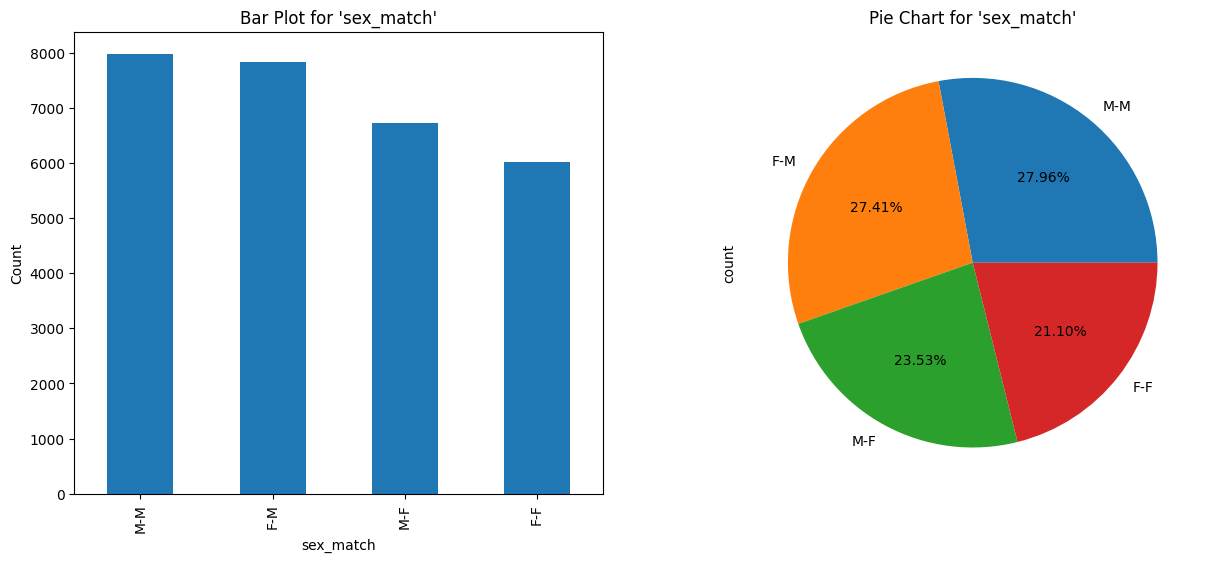

In [211]:
show_details_and_graphs('sex_match')

In [212]:
cat_ohe_cols.append('sex_match')

#### Observation -->
- Frequency is same for all possible values
- OneHotEncoding is suitable in this feature

In [213]:
train.columns

Index(['dri_score', 'psych_disturb', 'cyto_score', 'diabetes',
       'hla_match_c_high', 'tbi_status', 'arrhythmia', 'graft_type',
       'vent_hist', 'renal_issue', 'pulm_severe', 'prim_disease_hct',
       'cmv_status', 'rituximab', 'hla_match_dqb1_low', 'prod_type',
       'conditioning_intensity', 'ethnicity', 'year_hct', 'obesity',
       'in_vivo_tcd', 'hepatic_severe', 'donor_age', 'prior_tumor',
       'peptic_ulcer', 'age_at_hct', 'gvhd_proph', 'rheum_issue', 'sex_match',
       'race_group', 'comorbidity_score', 'karnofsky_score', 'hepatic_mild',
       'donor_related', 'melphalan_dose', 'cardiac', 'pulm_moderate', 'efs',
       'efs_time'],
      dtype='object')

In [214]:
#### race_group

Data type: object
Total null values: 0



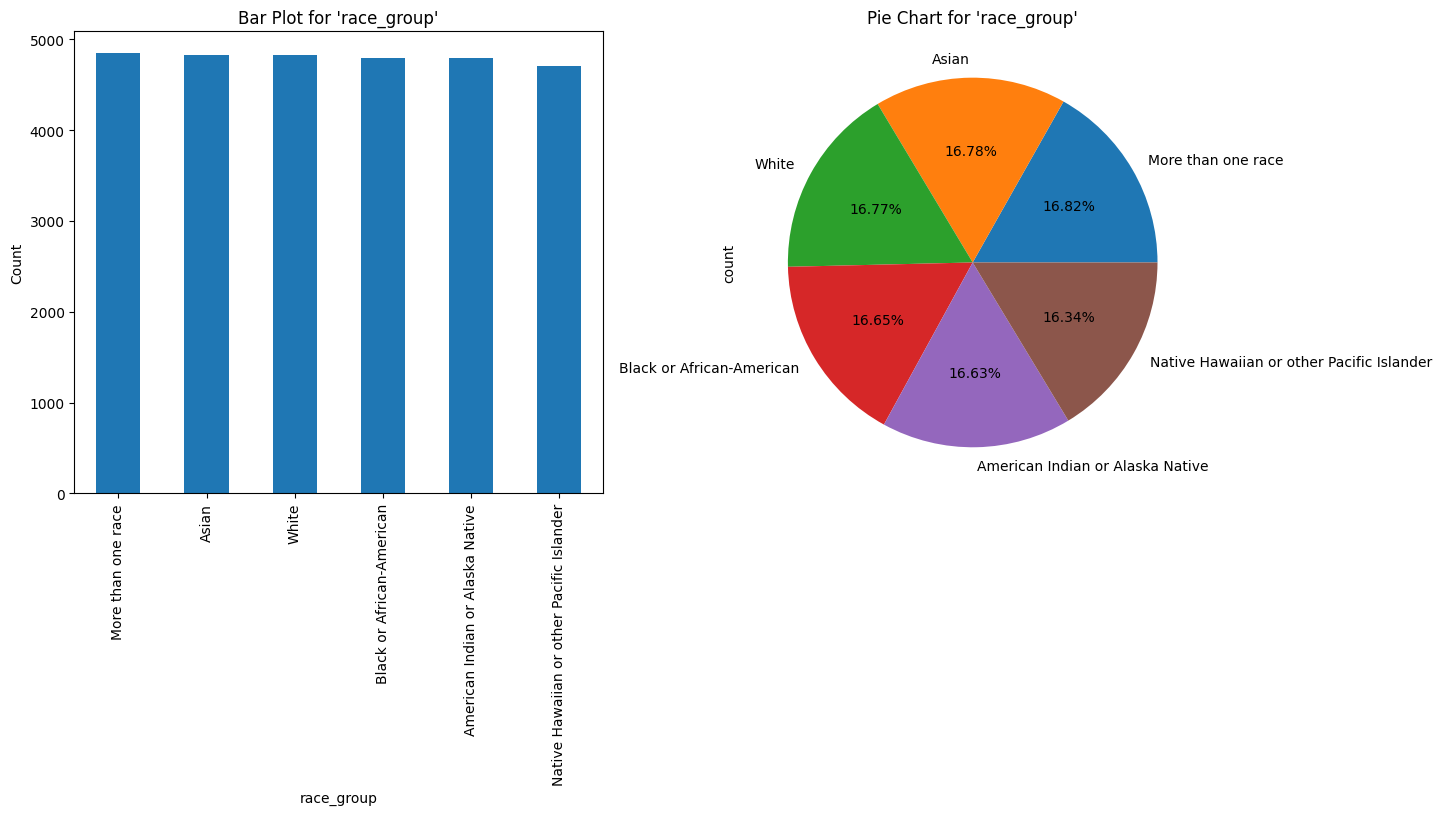

In [215]:
show_details_and_graphs('race_group')

#### Observation -->
- Frequency is similar of all possible categories
- OneHotEncoding is suitable

In [216]:
cat_ohe_cols.append('race_group')

In [217]:
#### comorbidity_score

Data type: float64
Total null values: 477



<ipython-input-49-2b9663e6bea9>:39: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['{}'.format(df_col)])
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


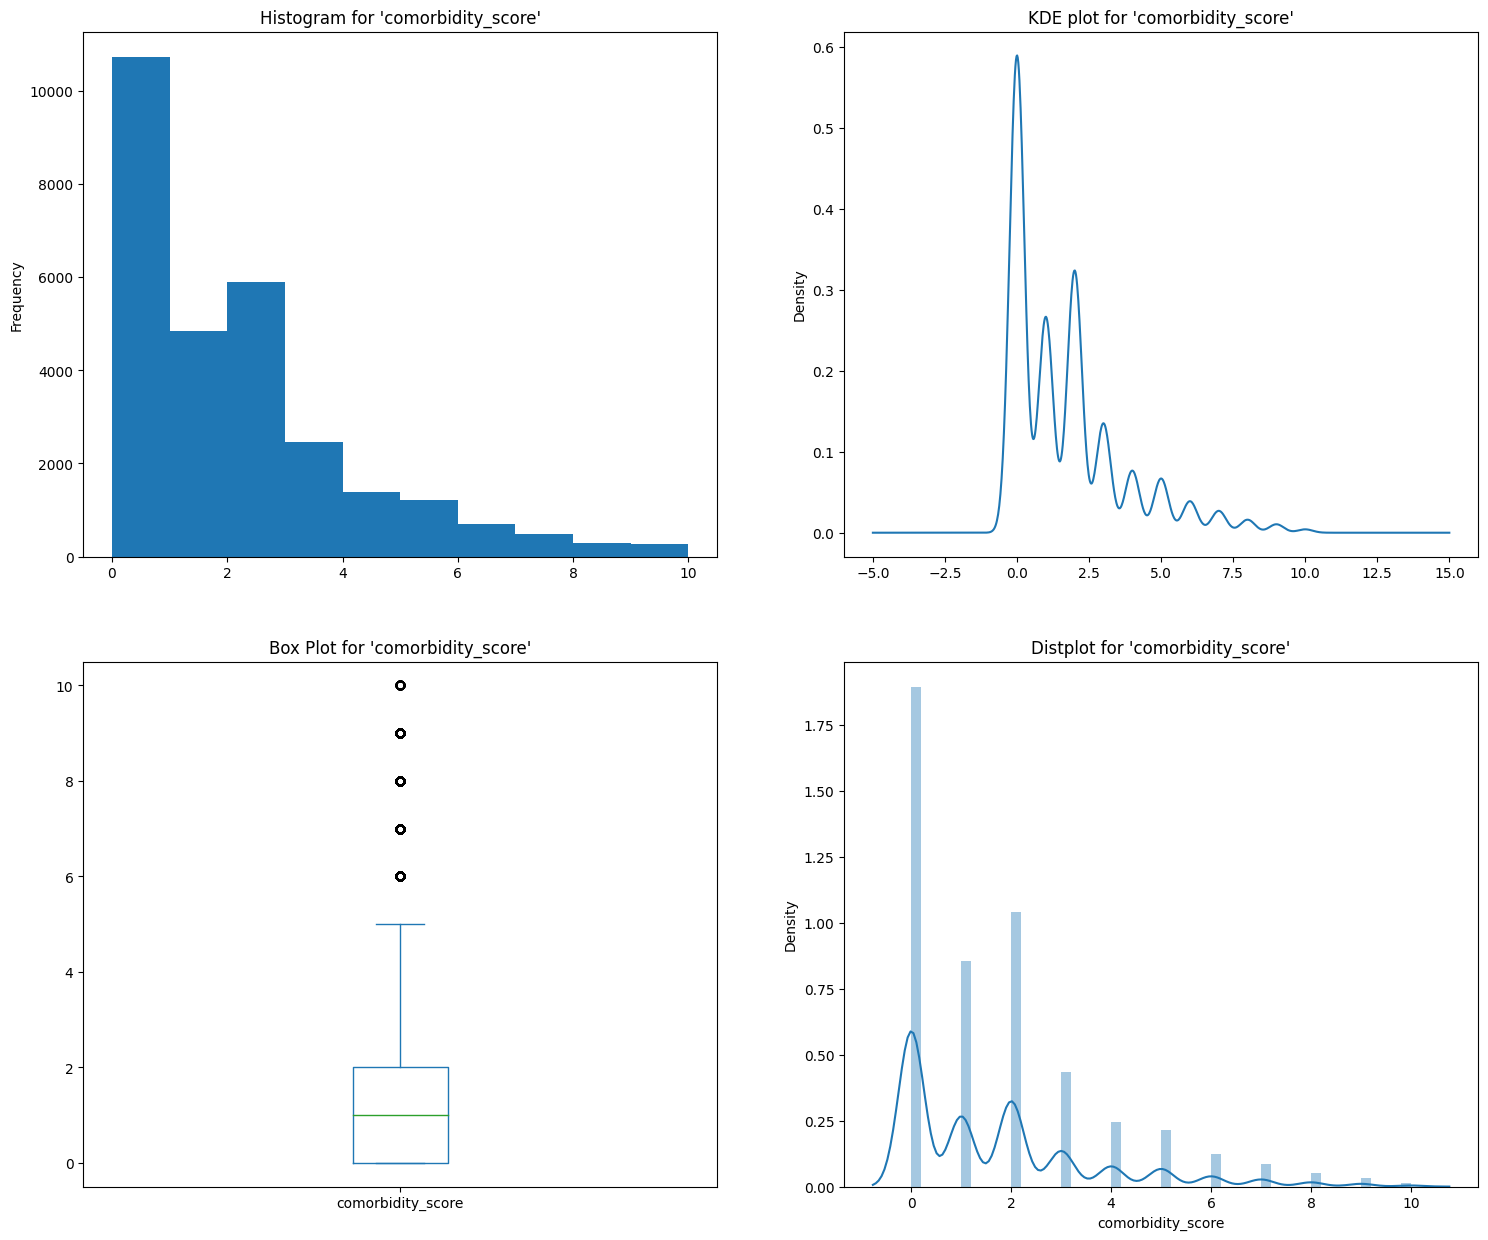

In [218]:
show_details_and_graphs('comorbidity_score')

In [219]:
check_outlier('comorbidity_score')

Feature Name : comorbidity_score
Based on Z-Score test :



/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encounter

dri_score psych_disturb  \
123                                         Intermediate            No   
140                                         Intermediate            No   
166                                                 High           NaN   
192                       N/A - disease not classifiable           Yes   
215            High - TED AML case <missing cytogenetics            No   
...                                                  ...           ...   
28499                                       Intermediate            No   
28507                                    N/A - pediatric           Yes   
28628                                               High            No   
28737                                    N/A - pediatric            No   
28757  Intermediate - TED AML case <missing cytogenetics            No   

         cyto_score diabetes  hla_match_c_high          tbi_status arrhythmia  \
123           Other       No               NaN              No TBI         No   
140    Intermediate      Yes               NaN   TBI + Cy +- Other         No   
166            Poor       No               1.0  TBI +- Other, >cGy        NaN   
192             NaN       No               2.0              No TBI         No   
215            Poor       No               2.0              No TBI         No   
...             ...      ...               ...                 ...        ...   
28499        Normal       No               NaN              No TBI         No   
28507          Poor      Yes               2.0              No TBI        Yes   
28628          Poor      Yes               2.0              No TBI        Yes   
28737           NaN      Yes               2.0              No TBI         No   
28757          Poor       No               2.0              No TBI        NaN   

             graft_type vent_hist renal_issue  ...  \
123    Peripheral blood        No          No  ...   
140    Peripheral blood        No          No  ...   
166    Peripheral blood        No          No  ...   
192    Peripheral blood        No          No  ...   
215    Peripheral blood        No          No  ...   
...                 ...       ...         ...  ...   
28499  Peripheral blood        No          No  ...   
28507       Bone marrow        No          No  ...   
28628       Bone marrow        No          No  ...   
28737       Bone marrow        No          No  ...   
28757  Peripheral blood        No          No  ...   

                                      race_group comorbidity_score  \
123             American Indian or Alaska Native               8.0   
140             American Indian or Alaska Native               8.0   
166                    Black or African-American               9.0   
192             American Indian or Alaska Native               9.0   
215                                        Asian               8.0   
...                                          ...               ...   
28499                                      Asian               8.0   
28507  Native Hawaiian or other Pacific Islander               9.0   
28628                         More than one race               8.0   
28737                         More than one race               8.0   
28757                                      Asian               8.0   

      karnofsky_score hepatic_mild             donor_related  \
123              90.0           No                 Unrelated   
140               NaN           No  Multiple donor (non-UCB)   
166              90.0           No                   Related   
192              70.0           No                 Unrelated   
215              60.0           No                   Related   
...               ...          ...                       ...   
28499            90.0           No                   Related   
28507            90.0           No                   Related   
28628            70.0          Yes                 Unrelated   
28737            90.0           No                 Unre

In [220]:
num_cols.append('comorbidity_score')

#### Observation -->
- There exist some outlier in this feature

In [221]:
##### karnofsky_score

Data type: float64
Total null values: 870



<ipython-input-49-2b9663e6bea9>:39: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['{}'.format(df_col)])
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


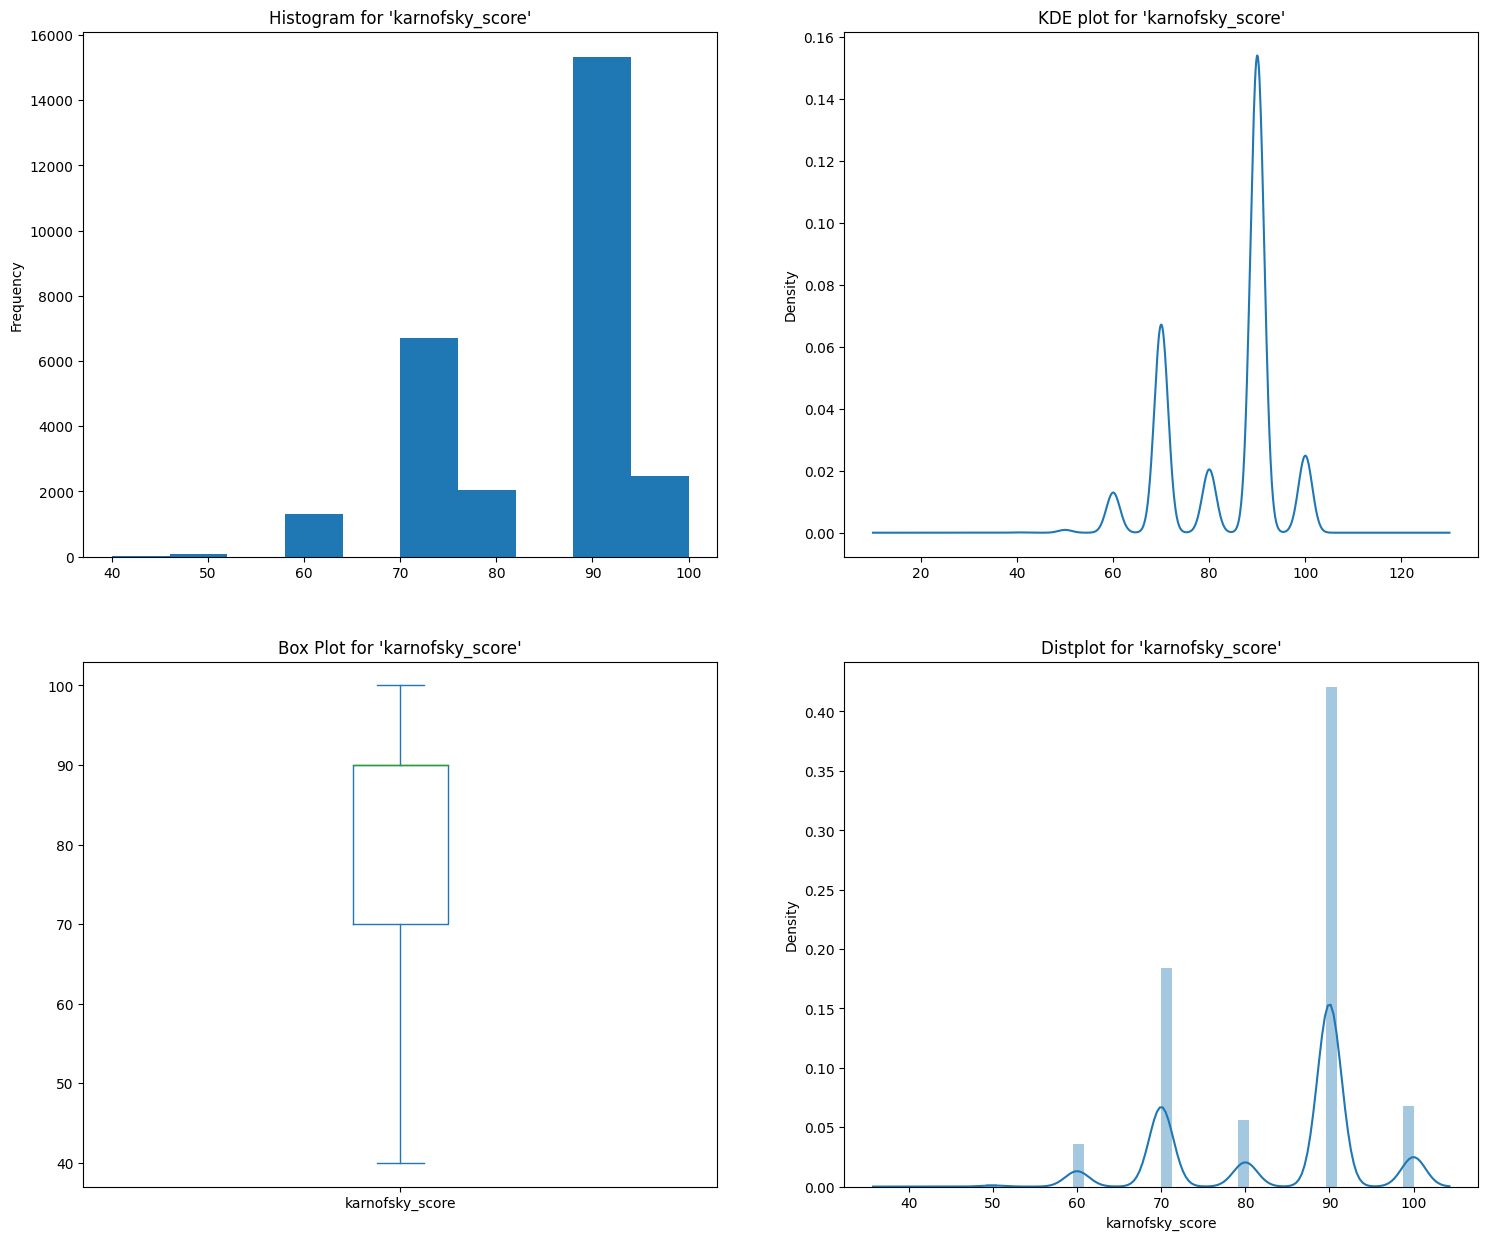

In [222]:
show_details_and_graphs('karnofsky_score')

In [223]:
check_outlier('karnofsky_score')

Feature Name : karnofsky_score
Based on Z-Score test :



/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encounter

dri_score psych_disturb    cyto_score  \
573                                 Intermediate            No           NaN   
633                                          Low            No           NaN   
788                                 Intermediate           NaN     Favorable   
902                              N/A - pediatric            No           NaN   
942                                 Intermediate           Yes        Normal   
...                                          ...           ...           ...   
27603                               Intermediate           Yes     Favorable   
27700                               Intermediate            No  Intermediate   
27750                            N/A - pediatric            No          Poor   
27843                            N/A - pediatric            No           NaN   
28344  High - TED AML case <missing cytogenetics            No  Intermediate   

      diabetes  hla_match_c_high           tbi_status arrhythmia  \
573         No               1.0    TBI + Cy +- Other         No   
633         No               2.0  TBI +- Other, <=cGy         No   
788        NaN               2.0               No TBI        NaN   
902         No               2.0   TBI +- Other, >cGy         No   
942         No               2.0               No TBI         No   
...        ...               ...                  ...        ...   
27603       No               NaN               No TBI         No   
27700       No               2.0               No TBI         No   
27750      Yes               1.0   TBI +- Other, >cGy         No   
27843       No               2.0               No TBI         No   
28344       No               2.0               No TBI         No   

             graft_type vent_hist renal_issue  ...  \
573    Peripheral blood        No          No  ...   
633    Peripheral blood        No          No  ...   
788    Peripheral blood        No         NaN  ...   
902         Bone marrow        No          No  ...   
942         Bone marrow        No          No  ...   
...                 ...       ...         ...  ...   
27603       Bone marrow        No          No  ...   
27700  Peripheral blood        No          No  ...   
27750  Peripheral blood        No          No  ...   
27843  Peripheral blood        No          No  ...   
28344  Peripheral blood        No          No  ...   

                                      race_group comorbidity_score  \
573    Native Hawaiian or other Pacific Islander               0.0   
633             American Indian or Alaska Native               0.0   
788                    Black or African-American               1.0   
902                           More than one race               0.0   
942                    Black or African-American               0.0   
...                                          ...               ...   
27603                         More than one race               0.0   
27700  Native Hawaiian or other Pacific Islander               2.0   
27750                                      Asian               7.0   
27843                                      Asian               0.0   
28344           American Indian or Alaska Native               2.0   

      karnofsky_score hepatic_mild  donor_related      melphalan_dose cardiac  \
573              50.0           No        Related  N/A, Mel not given      No   
633              50.0           No      Unrelated                 MEL      No   
788              40.0          NaN      Unrelated                 MEL     NaN   
902              50.0           No      Unrelated  N/A, Mel not given      No   
942              50.0          Yes        Related  N/A, Mel not given      No   
...               ...          ...            ...                 ...     ...   
27603            50.0           No            NaN                 MEL      No   
27700            50.0           No      Unrelated                 MEL      No   
27750            50.0           No        

In [224]:
num_cols.append('karnofsky_score')

#### Observation -->
- There are some outliers

In [225]:
#### hepatic_mild

Data type: object
Total null values: 1917



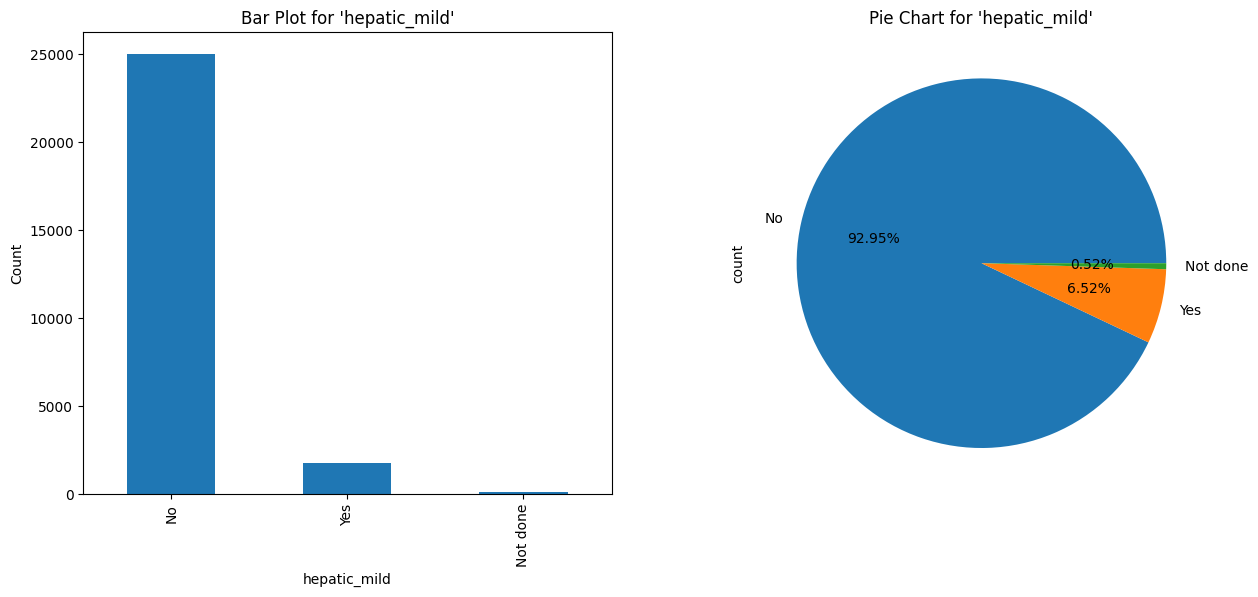

In [226]:
show_details_and_graphs('hepatic_mild')

In [227]:
# categroy = ['Not done','No','Yes']

In [228]:
cat_ordinal_cols.append('hepatic_mild')

In [229]:
##### donor_related

Data type: object
Total null values: 158



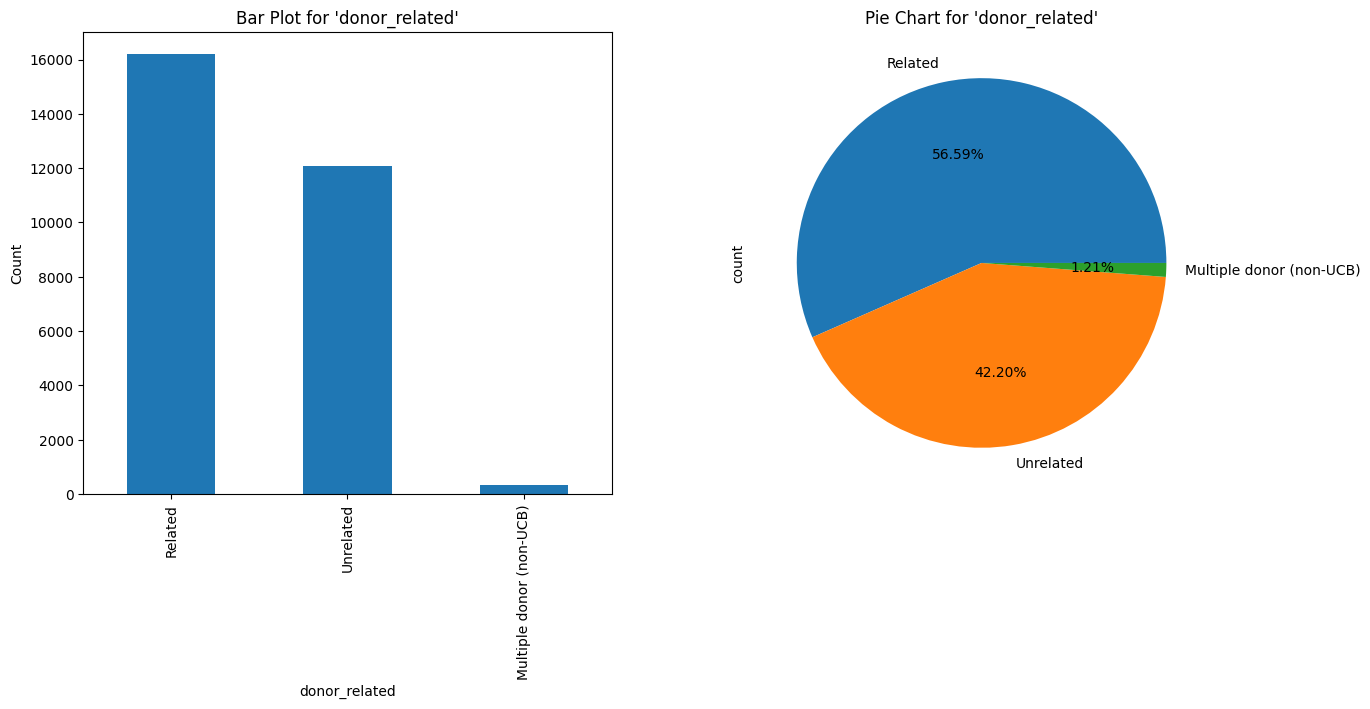

In [230]:
show_details_and_graphs('donor_related')

In [231]:
show_avg_efs_time('donor_related')

efs_time
donor_related                      
Related                   23.388663
Unrelated                 23.088945
Multiple donor (non-UCB)  20.825026

#### Observation -->
- Avg efs_time is highest (23.38) if donar is related and (23.08) if not related and less (20.82) if Multiple donor
- Here Label Encoding can be done

In [232]:
cat_label_cols.append('donor_related')

In [233]:
#### melphalan_dose

Data type: object
Total null values: 1405



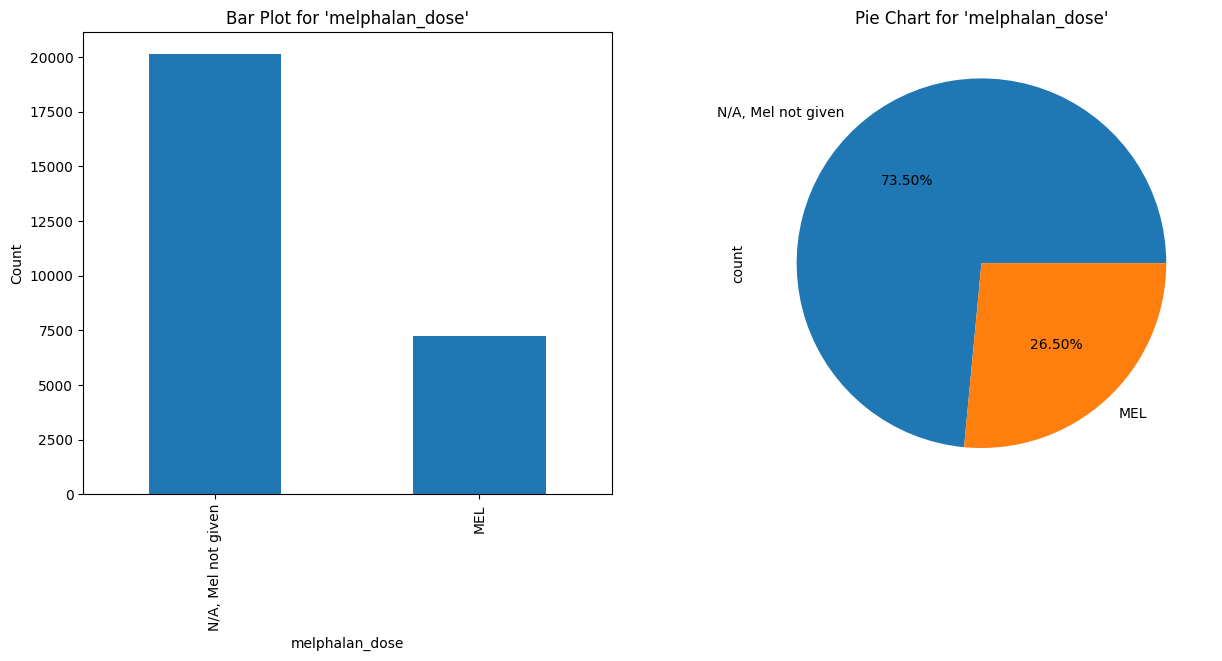

In [234]:
show_details_and_graphs('melphalan_dose')

In [235]:
show_avg_efs_time('melphalan_dose')

efs_time
melphalan_dose               
N/A, Mel not given  23.841019
MEL                 22.234406

#### Observation 
- OHE can be applied

In [236]:
cat_ohe_cols.append('melphalan_dose')

In [237]:
train.head(3)

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

dri_score psych_disturb    cyto_score diabetes  \
0  N/A - non-malignant indication            No           NaN       No   
1                    Intermediate            No  Intermediate       No   
2  N/A - non-malignant indication            No           NaN       No   

   hla_match_c_high          tbi_status arrhythmia        graft_type  \
0               NaN              No TBI         No       Bone marrow   
1               2.0  TBI +- Other, >cGy         No  Peripheral blood   
2               2.0              No TBI         No       Bone marrow   

  vent_hist renal_issue  ...          race_group comorbidity_score  \
0        No          No  ...  More than one race               0.0   
1        No          No  ...               Asian               3.0   
2        No          No  ...  More than one race               0.0   

  karnofsky_score hepatic_mild  donor_related      melphalan_dose cardiac  \
0            90.0           No      Unrelated  N/A, Mel not given      No   
1            90.0           No        Related  N/A, Mel not given      No   
2            90.0           No        Related  N/A, Mel not given      No   

  pulm_moderate  efs efs_time  
0            No  0.0   42.356  
1           Yes  1.0    4.672  
2            No  0.0   19.793  

[3 rows x 39 columns]

In [238]:
##### cardiac

Data type: object
Total null values: 2542



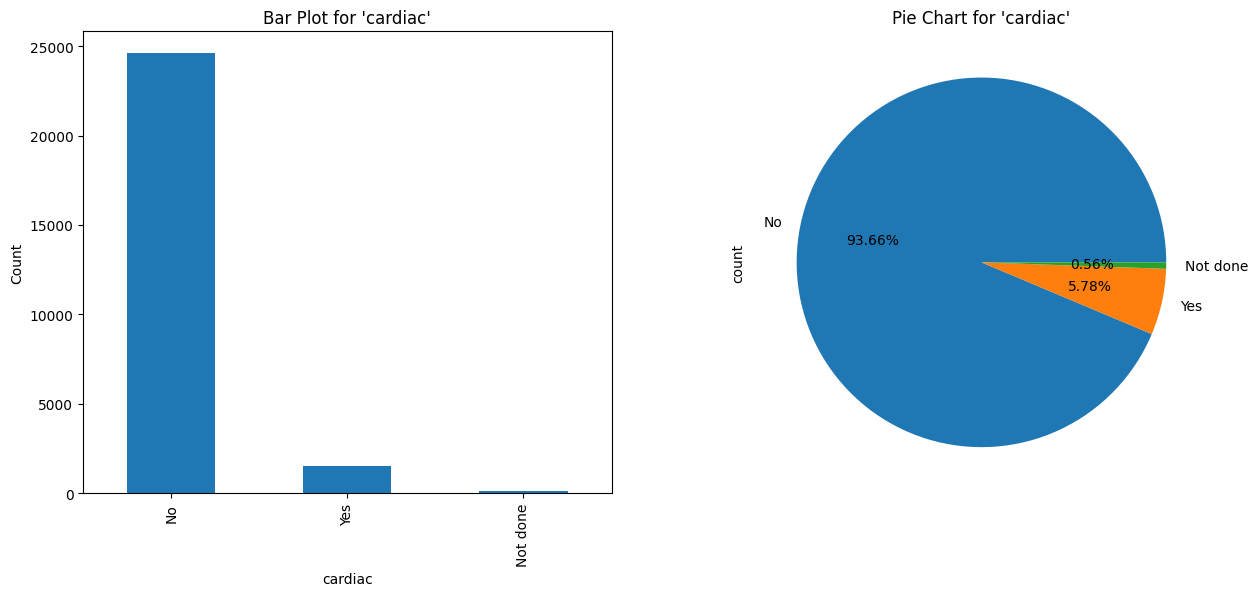

In [239]:
show_details_and_graphs('cardiac')

In [240]:
# category = ['Not done','No','Yes']
## Ordinal Encoding can be used

In [241]:
cat_ordinal_cols.append('cardiac')

In [242]:
##### pulm_moderate

Data type: object
Total null values: 2047



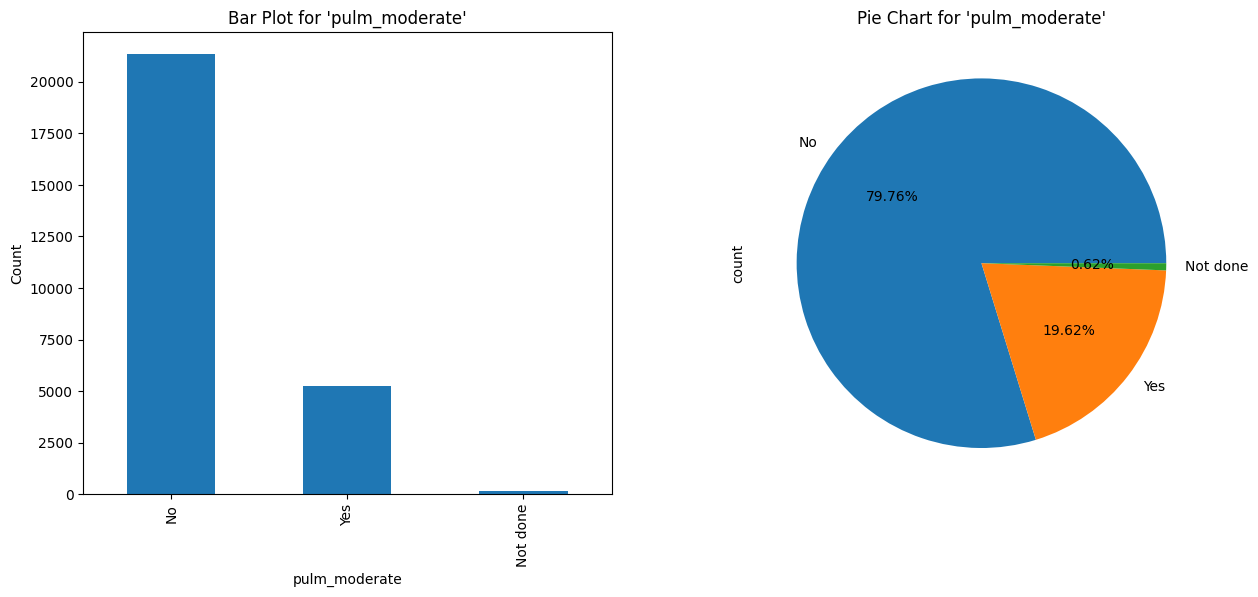

In [243]:
show_details_and_graphs('pulm_moderate')

In [244]:
# category = ['Not done','No','Yes']

In [245]:
cat_ordinal_cols.append('pulm_moderate')

In [246]:
###### efs

Data type: float64
Total null values: 0



<ipython-input-49-2b9663e6bea9>:39: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['{}'.format(df_col)])
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


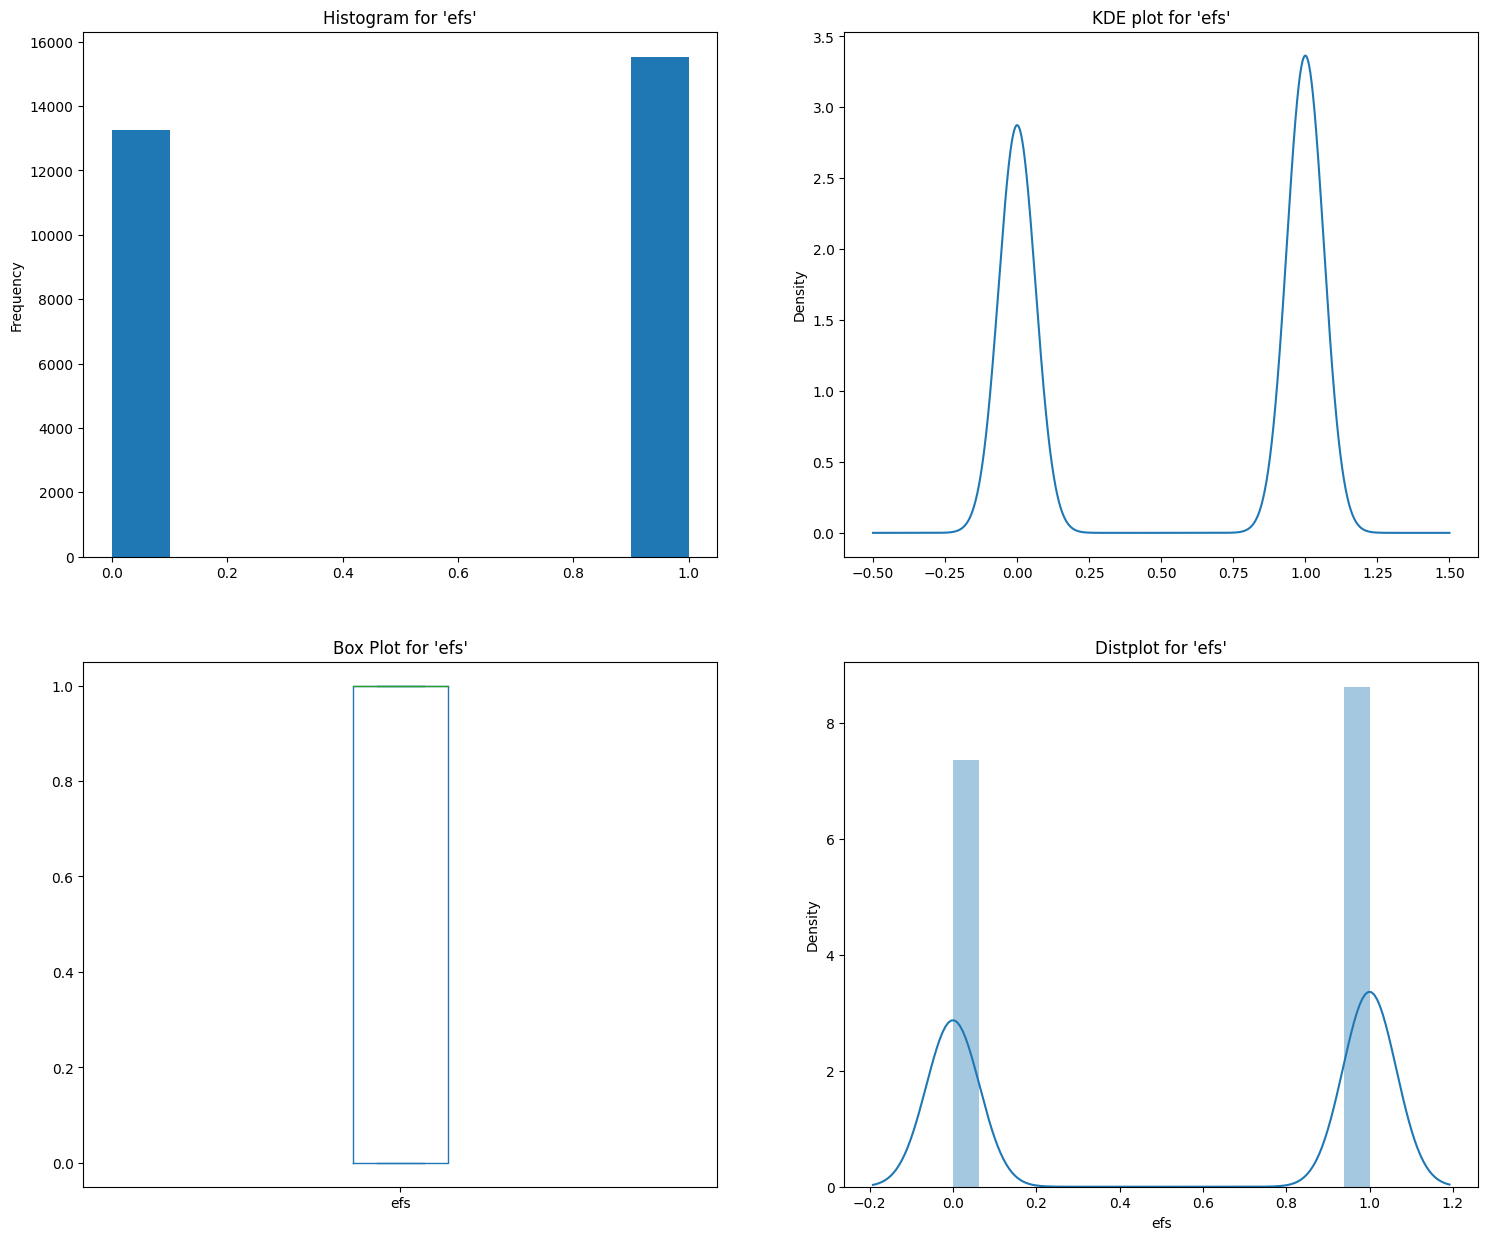

In [247]:
show_details_and_graphs('efs')

In [248]:
check_outlier('efs')

Feature Name : efs
Based on Z-Score test :



Empty DataFrame
Columns: [dri_score, psych_disturb, cyto_score, diabetes, hla_match_c_high, tbi_status, arrhythmia, graft_type, vent_hist, renal_issue, pulm_severe, prim_disease_hct, cmv_status, rituximab, hla_match_dqb1_low, prod_type, conditioning_intensity, ethnicity, year_hct, obesity, in_vivo_tcd, hepatic_severe, donor_age, prior_tumor, peptic_ulcer, age_at_hct, gvhd_proph, rheum_issue, sex_match, race_group, comorbidity_score, karnofsky_score, hepatic_mild, donor_related, melphalan_dose, cardiac, pulm_moderate, efs, efs_time]
Index: []

[0 rows x 39 columns]

#### Observation -->
- There is no any outlier
- But the distribution is not the exactly normal

In [249]:
###### efs_time

Data type: float64
Total null values: 0



<ipython-input-49-2b9663e6bea9>:39: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['{}'.format(df_col)])
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


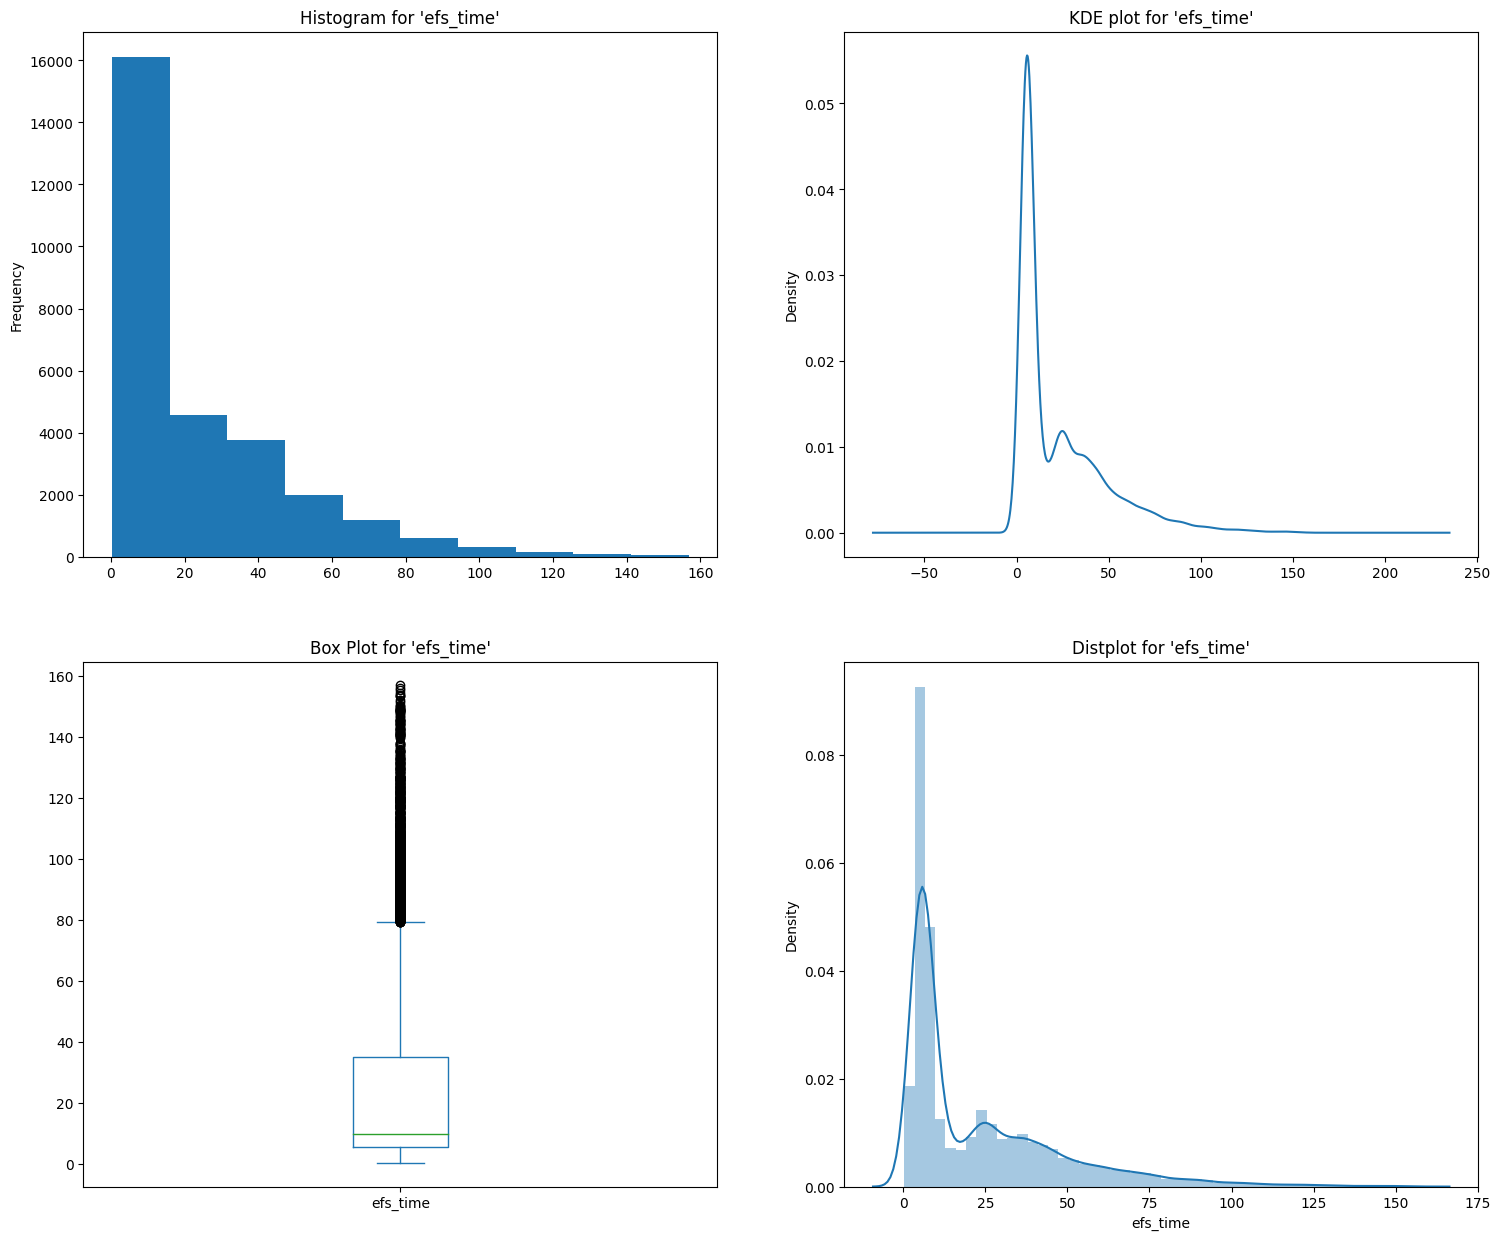

In [250]:
show_details_and_graphs('efs_time')

In [251]:
check_outlier('efs_time')

Feature Name : efs_time
Based on Z-Score test :



/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

dri_score psych_disturb    cyto_score diabetes  \
3                                High            No  Intermediate       No   
15                                Low            No           NaN       No   
27                   TBD cytogenetics            No          Poor       No   
65                   TBD cytogenetics            No           NaN      Yes   
67                          Very high           Yes          Poor       No   
...                               ...           ...           ...      ...   
28484                    Intermediate            No           NaN       No   
28487  N/A - non-malignant indication           NaN           NaN       No   
28577                    Intermediate            No           NaN       No   
28623                    Intermediate            No  Intermediate       No   
28683                 N/A - pediatric            No           NaN       No   

       hla_match_c_high          tbi_status arrhythmia        graft_type  \
3                   2.0              No TBI         No       Bone marrow   
15                  2.0              No TBI         No  Peripheral blood   
27                  1.0   TBI + Cy +- Other         No       Bone marrow   
65                  2.0   TBI + Cy +- Other         No       Bone marrow   
67                  NaN              No TBI         No       Bone marrow   
...                 ...                 ...        ...               ...   
28484               2.0   TBI + Cy +- Other         No  Peripheral blood   
28487               NaN              No TBI         No  Peripheral blood   
28577               2.0              No TBI         No       Bone marrow   
28623               2.0  TBI +- Other, >cGy         No  Peripheral blood   
28683               2.0              No TBI         No       Bone marrow   

      vent_hist renal_issue  ...                                 race_group  \
3            No          No  ...                                      White   
15           No          No  ...                                      White   
27           No          No  ...                         More than one race   
65           No          No  ...           American Indian or Alaska Native   
67           No          No  ...           American Indian or Alaska Native   
...         ...         ...  ...                                        ...   
28484        No          No  ...                                      White   
28487        No          No  ...                                      Asian   
28577        No          No  ...  Native Hawaiian or other Pacific Islander   
28623        No          No  ...           American Indian or Alaska Native   
28683        No          No  ...                  Black or African-American   

      comorbidity_score karnofsky_score hepatic_mild  donor_related  \
3                   0.0            90.0          Yes      Unrelated   
15                  0.0            80.0           No        Related   
27                  0.0            90.0           No        Related   
65                  2.0            60.0           No      Unrelated   
67                  1.0            90.0           No        Related   
...                 ...             ...          ...            ...   
28484               0.0            70.0           No      Unrelated   
28487               0.0            90.0          Yes        Related   
28577               0.0            60.0           No        Related   
28623               3.0            70.0           No      Unrelated   
28683               0.0            90.0           No        Related   

           melphalan_dose cardiac pulm_moderate  efs efs_time  
3      N/A, Mel not given      No            No  0.0  102.349  
15     N/A, Mel not given      No            No  0.0  125.465  
27     N/A, Mel not given     Yes            No  0.0  104.367  
65                    NaN      No           Yes  0.0   98.451  
67     N/A, Mel not given      No           Yes  0.0  10

#### Observation -->
- efs_time is our target feature and contains 514 rows with presence of outlier accoding to Z Score test.

In [252]:
## Not appending efs and efs_time to any list because these are not required....

## Independent and Target feature

In [253]:
X = train.drop(columns=['efs','efs_time']) ## independent features
y = train['efs_time'] ## target feature

## Training on whole Data not only using X_train using whole (X)

## Train Test Split

In [254]:
# from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=42)

In [255]:
from sklearn.compose import ColumnTransformer

In [256]:
X_num_cols = [feature for feature in X.columns if X[feature].dtype!='O']
X_cat_cols = [feature for feature in X.columns if X[feature].dtype=='O']

In [257]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [258]:
from sklearn.pipeline import Pipeline

In [259]:
# One-Hot Encoding Pipeline
cat_ohe_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))
])

# Label Encoding Pipeline
cat_label_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('label_encoder', OrdinalEncoder()) ## applying Ordinal Encodin on these cat_label_cols 
])


cat_ordinal_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal_encoder', OrdinalEncoder(categories=[
        # DRI Score
        ['N/A - disease not classifiable', 'N/A - non-malignant indication', 'N/A - pediatric',
         'Missing disease status', 'TBD cytogenetics', 'Low', 'Intermediate - TED AML case <missing cytogenetics',
         'Intermediate', 'High - TED AML case <missing cytogenetics', 'High', 'Very high'],
        
        # Features with ['No', 'Not done', 'Yes']
        ['No', 'Not done', 'Yes'],  # psych_disturb
        ['Not tested', 'TBD', 'Other', 'Normal', 'Favorable', 'Intermediate', 'Poor'],  # cyto_score
        ['No', 'Not done', 'Yes'],  # diabetes
        ['TBI +- Other, -cGy, fractionated', 'No TBI', 'TBI + Cy +- Other', 'TBI +- Other, -cGy, single',
         'TBI +- Other, >cGy', 'TBI +- Other, unknown dose', 'TBI +- Other, <=cGy', 'TBI +- Other, -cGy, unknown dose'],  # tbi_status
        ['No', 'Not done', 'Yes'],  # arrhythmia
        ['No', 'Not done', 'Yes'],  # renal_issue
        ['No', 'Not done', 'Yes'],  # pulm_severe
        ['-/-', '-/+', '+/+', '+/-'],  # cmv_status
        ['MAC', 'N/A, F(pre-TED) not submitted', 'NMA', 'TBD', 'No drugs reported', 'RIC'],  # conditioning_intensity
        ['No', 'Not done', 'Yes'],  # obesity
        ['No', 'Not done', 'Yes'],  # hepatic_severe
        ['No', 'Not done', 'Yes'],  # prior_tumor
        ['No', 'Not done', 'Yes'],  # peptic_ulcer
        ['No', 'Not done', 'Yes'],  # rheum_issue
        ['No', 'Not done', 'Yes'],  # hepatic_mild
        ['No', 'Not done', 'Yes'],  # cardiac
        ['No', 'Not done', 'Yes']   # pulm_moderate
    ]))
])


# Numerical Pipeline
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler',StandardScaler())
])

In [260]:
cat_ordinal_cols

['dri_score',
 'psych_disturb',
 'cyto_score',
 'diabetes',
 'tbi_status',
 'arrhythmia',
 'renal_issue',
 'pulm_severe',
 'cmv_status',
 'conditioning_intensity',
 'obesity',
 'hepatic_severe',
 'prior_tumor',
 'peptic_ulcer',
 'rheum_issue',
 'hepatic_mild',
 'cardiac',
 'pulm_moderate']

In [261]:
cat_ordinal_cols.clear()

In [262]:
cat_ordinal_cols = [
    'dri_score',
    'psych_disturb',
    'cyto_score',
    'diabetes',
    'tbi_status',
    'arrhythmia',
    'renal_issue',
    'pulm_severe',
    'cmv_status',
    'conditioning_intensity',
    'obesity',
    'hepatic_severe',
    'prior_tumor',
    'peptic_ulcer',
    'rheum_issue',
    'hepatic_mild',
    'cardiac',
    'pulm_moderate'
]

In [263]:
len(cat_ordinal_cols)

18

In [264]:
# Column Transformer
transformer = ColumnTransformer(transformers=[
    ('cat_ohe', cat_ohe_pipeline, cat_ohe_cols),
    ('cat_label', cat_label_pipeline, cat_label_cols),
    ('cat_ordinal', cat_ordinal_pipeline, cat_ordinal_cols),
    ('num_pipeline', num_pipeline, num_cols),
], remainder='passthrough')  # Keeps other columns as they are

In [265]:
cat_label_cols

['graft_type',
 'vent_hist',
 'rituximab',
 'prod_type',
 'ethnicity',
 'in_vivo_tcd',
 'gvhd_proph',
 'donor_related']

In [266]:
cat_ordinal_cols

['dri_score',
 'psych_disturb',
 'cyto_score',
 'diabetes',
 'tbi_status',
 'arrhythmia',
 'renal_issue',
 'pulm_severe',
 'cmv_status',
 'conditioning_intensity',
 'obesity',
 'hepatic_severe',
 'prior_tumor',
 'peptic_ulcer',
 'rheum_issue',
 'hepatic_mild',
 'cardiac',
 'pulm_moderate']

In [267]:
len(cat_ordinal_cols)

18

In [268]:
cat_ohe_cols

['prim_disease_hct', 'sex_match', 'race_group', 'melphalan_dose']

In [269]:
num_cols

['hla_match_c_high',
 'hla_match_dqb1_low',
 'year_hct',
 'donor_age',
 'age_at_hct',
 'comorbidity_score',
 'karnofsky_score']

In [270]:
len(train.columns)

39

In [271]:
# X_train_trf = transformer.fit_transform(X_train)
# X_test_trf = transformer.transform(X_test)

In [272]:
# X_train_trf

In [273]:
# pd.DataFrame(X_train_trf)

In [274]:
# type(X_train_trf)

In [275]:
X_trf = transformer.fit_transform(X) ## using complete data

In [276]:
X_trf

array([[ 0.        ,  0.        ,  0.        , ..., -1.35815348,
        -0.86070754,  0.56790729],
       [ 0.        ,  1.        ,  0.        , ...,  0.2384162 ,
         0.6561121 ,  0.56790729],
       [ 0.        ,  0.        ,  0.        , ..., -0.22065138,
        -0.86070754,  0.56790729],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.58361534,
         1.66732519,  0.56790729],
       [ 0.        ,  0.        ,  0.        , ..., -1.82620569,
        -0.35510099,  0.56790729],
       [ 0.        ,  0.        ,  0.        , ..., -1.77934372,
         0.15050555,  0.56790729]])

In [277]:
## Model Training and Model Selection
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

import xgboost 
from xgboost import XGBRegressor

from lightgbm import LGBMRegressor

In [278]:
## Creating a function to evaluat model
def evaluate_model(true, predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mse)
    r2=r2_score(true,predicted)
    print("R2 Score:{:.4f}".format(r2))
    print("MSE:{:.4f}".format(mse))
    print("RMSE:{:.4f}".format(rmse))
    print("MAE:{:.4f}".format(mae))
    # ---------
    return 0

### Doing all the preprocessing on the test data

In [279]:
test

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

ID                       dri_score psych_disturb    cyto_score diabetes  \
0  28800  N/A - non-malignant indication            No           NaN       No   
1  28801                    Intermediate            No  Intermediate       No   
2  28802  N/A - non-malignant indication            No           NaN       No   

   hla_match_c_high  hla_high_res_8          tbi_status arrhythmia  \
0               NaN             NaN              No TBI         No   
1               2.0             8.0  TBI +- Other, >cGy         No   
2               2.0             8.0              No TBI         No   

   hla_low_res_6  ... karnofsky_score hepatic_mild          tce_div_match  \
0            6.0  ...            90.0           No                    NaN   
1            6.0  ...            90.0           No  Permissive mismatched   
2            6.0  ...            90.0           No  Permissive mismatched   

  donor_related      melphalan_dose  hla_low_res_8 cardiac  \
0     Unrelated  N/A, Mel not given            8.0      No   
1       Related  N/A, Mel not given            8.0      No   
2       Related  N/A, Mel not given            8.0      No   

   hla_match_drb1_high  pulm_moderate hla_low_res_10  
0                  2.0             No           10.0  
1                  2.0            Yes           10.0  
2                  2.0             No           10.0  

[3 rows x 58 columns]

In [280]:
test.shape

(3, 58)

In [281]:
test.isnull().sum()

ID                        0
dri_score                 0
psych_disturb             0
cyto_score                2
diabetes                  0
hla_match_c_high          1
hla_high_res_8            1
tbi_status                0
arrhythmia                0
hla_low_res_6             0
graft_type                0
vent_hist                 0
renal_issue               0
pulm_severe               0
prim_disease_hct          0
hla_high_res_6            0
cmv_status                0
hla_high_res_10           1
hla_match_dqb1_high       0
tce_imm_match             1
hla_nmdp_6                0
hla_match_c_low           0
rituximab                 0
hla_match_drb1_low        0
hla_match_dqb1_low        0
prod_type                 0
cyto_score_detail         2
conditioning_intensity    2
ethnicity                 0
year_hct                  0
obesity                   0
mrd_hct                   2
in_vivo_tcd               0
tce_match                 2
hla_match_a_high          0
hepatic_severe      

In [282]:
col_to_drop

['ID',
 'hla_match_dqb1_high',
 'hla_match_b_high',
 'hla_match_a_low',
 'hla_nmdp_6',
 'hla_high_res_6',
 'hla_match_a_high',
 'hla_low_res_8',
 'hla_match_c_low',
 'hla_match_drb1_high',
 'hla_low_res_6',
 'hla_low_res_10',
 'hla_match_b_low',
 'hla_high_res_8',
 'hla_match_drb1_low',
 'hla_high_res_10',
 'tce_match',
 'mrd_hct',
 'cyto_score_detail',
 'tce_div_match',
 'tce_imm_match']

In [283]:
test.drop(columns=col_to_drop,inplace=True)

In [284]:
test

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

dri_score psych_disturb    cyto_score diabetes  \
0  N/A - non-malignant indication            No           NaN       No   
1                    Intermediate            No  Intermediate       No   
2  N/A - non-malignant indication            No           NaN       No   

   hla_match_c_high          tbi_status arrhythmia        graft_type  \
0               NaN              No TBI         No       Bone marrow   
1               2.0  TBI +- Other, >cGy         No  Peripheral blood   
2               2.0              No TBI         No       Bone marrow   

  vent_hist renal_issue  ... rheum_issue sex_match          race_group  \
0        No          No  ...          No       M-F  More than one race   
1        No          No  ...          No       F-F               Asian   
2        No          No  ...          No       F-M  More than one race   

  comorbidity_score  karnofsky_score hepatic_mild donor_related  \
0               0.0             90.0           No     Unrelated   
1               3.0             90.0           No       Related   
2               0.0             90.0           No       Related   

       melphalan_dose  cardiac pulm_moderate  
0  N/A, Mel not given       No            No  
1  N/A, Mel not given       No           Yes  
2  N/A, Mel not given       No            No  

[3 rows x 37 columns]

In [285]:
test.shape

(3, 37)

In [286]:
test.isnull().sum()

dri_score                 0
psych_disturb             0
cyto_score                2
diabetes                  0
hla_match_c_high          1
tbi_status                0
arrhythmia                0
graft_type                0
vent_hist                 0
renal_issue               0
pulm_severe               0
prim_disease_hct          0
cmv_status                0
rituximab                 0
hla_match_dqb1_low        0
prod_type                 0
conditioning_intensity    2
ethnicity                 0
year_hct                  0
obesity                   0
in_vivo_tcd               0
hepatic_severe            0
donor_age                 2
prior_tumor               0
peptic_ulcer              0
age_at_hct                0
gvhd_proph                0
rheum_issue               0
sex_match                 0
race_group                0
comorbidity_score         0
karnofsky_score           0
hepatic_mild              0
donor_related             0
melphalan_dose            0
cardiac             

In [287]:
### transforming the test 
test_trf = transformer.transform(test)

In [288]:
test_trf

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         2.00000000e+00,  1.00000000e+00,  1.10000000e+01,
         2.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         6.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         2.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+0

In [289]:
pd.DataFrame(test_trf)

0    1    2    3    4    5    6    7    8    9   ...   49   50   51  \
0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  2.0   
2  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

             52        53        54            55        56        57  \
0 -5.610384e-16  0.572963  0.260175 -4.812451e-16 -1.358153 -0.860708   
1  5.949953e-01  0.572963 -2.276400  2.016868e+00  0.238416  0.656112   
2  5.949953e-01  0.572963  1.211391 -4.812451e-16 -0.220651 -0.860708   

         58  
0  0.567907  
1  0.567907  
2  0.567907  

[3 rows x 59 columns]

In [290]:
### sample submission file 

In [291]:
sample_submission

ID  prediction
0  28800         0.5
1  28801         0.5
2  28802         0.5

In [292]:
id_column = sample_submission['ID']

In [293]:
id_column

0    28800
1    28801
2    28802
Name: ID, dtype: int64

## Model Training

In [294]:
# ## Model training
# models={
#     "Linear_Regression":LinearRegression(),
#     "Lasso":Lasso(),
#     "Ridge":Ridge(),
#     "K_Neighbors_Regressor":KNeighborsRegressor()
# }

# for i in range(len(list(models))):
#     model_name = list(models.keys())[i]
#     model=list(models.values())[i]
#     model.fit(X_train_trf,y_train) ## Train Model 

#     ## Make Predictions
#     y_train_pred=model.predict(X_train_trf)
#     y_test_pred=model.predict(X_test_trf)

#     print(model_name,"=============>")
#     print("Evaluating Train Dataset")
#     evaluate_model(y_train,y_train_pred)
#     print(f"\n{'-'*50}\n")
#     print("Evaluating Test Dataset")
#     evaluate_model(y_test,y_test_pred)
#     print("="*50)
#     print("\n")

#     # ## prediction
#     # prediction = model.predict(test_trf)

#     # result = pd.DataFrame(
#     # {
#     #     'ID':id_column,
#     #     'prediction':prediction
#     # }
#     # )

#     # # Create folder if it doesn't exist
#     # folder_path = f"./{model_name}"
#     # os.makedirs(folder_path, exist_ok=True)

#     # # Save the CSV file inside the folder
#     # result.to_csv(f"{folder_path}/submission.csv", index=False)
#     # print(f"File saved as '{folder_path}/submission.csv'....")
#     # print()

**Observation**
- Here the best performance is of ***Linear Regression*** and then performance of ***Ridge*** then ***Lasso***.

In [295]:
# ## Model training
# models={
#     "Decision_Tree_Regressor":DecisionTreeRegressor(),
#     "Random_Forest":RandomForestRegressor(),
#     "AdaBoost":AdaBoostRegressor(),
#     "GradientBoost":GradientBoostingRegressor(),
#     "XGBRegressor":XGBRegressor(),
#     "LGBMRegressor":LGBMRegressor()
# }

# for i in range(len(list(models))):

#     model_name = list(models.keys())[i]
#     model=list(models.values())[i]
#     model.fit(X_train_trf,y_train) ## model training

#     ## Make Predictions
#     y_train_pred=model.predict(X_train_trf)
#     y_test_pred=model.predict(X_test_trf)

#     print(model_name,"=============>")
#     print("Evaluating Train Dataset")
#     evaluate_model(y_train,y_train_pred)
#     print(f"\n{'-'*50}\n")
#     print("Evaluating Test Dataset")
#     evaluate_model(y_test,y_test_pred)
#     print("="*50)
#     print("\n")

#     # ## prediction
#     # prediction = model.predict(test_trf)

#     # result = pd.DataFrame(
#     # {
#     #     'ID':id_column,
#     #     'prediction':prediction
#     # }
#     # )

#     # # Create folder if it doesn't exist
#     # folder_path = f"./{model_name}"
#     # os.makedirs(folder_path, exist_ok=True)

#     # # Save the CSV file inside the folder
#     # result.to_csv(f"{folder_path}/submission.csv", index=False)
#     # print(f"File saved as '{folder_path}/submission.csv'....")
#     # print()

**Observation**
- Here the better performance is of ***Random Forest Regressor***, ***Gradient Boost***, ***XGBRegressor*** and ***LGBMRegressor***

In [296]:
## Prediction Using AdaBoost 
ada_boost = AdaBoostRegressor()

ada_boost.fit(X_trf,y) ## model training on complete data

# ## Make Predictions
# y_train_pred=ada_boost.predict(X_train_trf)
# y_test_pred=ada_boost.predict(X_test_trf)

# print("Evaluating Train Dataset")
# evaluate_model(y_train,y_train_pred)
# print(f"\n{'-'*50}\n")
# print("Evaluating Test Dataset")
# evaluate_model(y_test,y_test_pred)
# print("="*50)
# print("\n")

## prediction
prediction = ada_boost.predict(test_trf)

result = pd.DataFrame(
{
    'ID':id_column,
    'prediction':prediction
}
)

print("Model Used : AdaBoostRegressor")
result.to_csv("submission.csv", index=False)
print("File saved as submission.csv'....")

Model Used : AdaBoostRegressor
File saved as submission.csv'....


In [297]:
#### Used AdaBoost(better performance till now) trained on whole data 